# Portfolio Optimization of Some Indonesian-Based Banking Sector Stocks (Sample Project)
### By Muhammad Kevin Alrahmanto (muhammad.kevin@mail.ugm.ac.id)

In [1]:
getwd()

[1] "C:/Users/Kevin"

# 1. Load Libraries

In [2]:
library(pacman)
pacman::p_load(readxl, dplyr, tidyr, forcats, reactable, reactablefmtr, ggplot2, ggpubr, ggalluvial, ggsankey, plot3D, rgl,frenchdata,
               repr, psych, psy, polycor, Gifi, eRm, MPsychoR, mice, ShinyItemAnalysis, smacof, performance, MVN, gtheory,lubridate,stringr,
              lavaan,semPlot, corrplot, ggstance,rstatix, fPortfolio, fMultivar, car, quantmod, PerformanceAnalytics, magrittr , gbm, ISLR, metan,MASS,
              PortfolioAnalytics,reshape2,ROI, ROI.plugin.glpk, ROI.plugin.quadprog, ggridges, iClick, ggcorrplot, ggrepel)

Warning message:
"package 'pacman' was built under R version 4.2.3"


# 2. Data Cleaning

In [3]:
tickers <- c('BBCA.JK','BBRI.JK', 'BRIS.JK', 'MEGA.JK', 'BBTN.JK', 'BBHI.JK',
             'BABP.JK', 'BBNI.JK', 'NISP.JK', 'BDMN.JK', 'BNGA.JK', 'BNLI.JK')
portfolioPrices <- NULL
for(ticker in tickers){
    portfolioPrices <- cbind(portfolioPrices,getSymbols.yahoo(ticker, from='2021-01-01',
                                            periodicity='daily', auto.assign=FALSE)[, 6])
}

In [4]:
portfolioPrices<- na.approx(portfolioPrices)

In [5]:
head(portfolioPrices)

           BBCA.JK.Adjusted BBRI.JK.Adjusted BRIS.JK.Adjusted MEGA.JK.Adjusted
2021-01-04         6461.677         3817.472         2318.609         6182.008
2021-01-05         6702.750         3782.043         2308.785         6182.008
2021-01-06         6565.670         3720.042         2465.979         6182.008
2021-01-07         6584.577         3790.900         2662.471         6535.266
2021-01-08         6664.934         3888.330         2809.840         7837.902
2021-01-11         6943.822         4118.619         2986.683         9405.483
           BBTN.JK.Adjusted BBHI.JK.Adjusted BABP.JK.Adjusted BBNI.JK.Adjusted
2021-01-04         1736.953              396               50         5954.958
2021-01-05         1727.409              424               50         6071.722
2021-01-06         1722.637              428               50         5978.312
2021-01-07         1727.409              432               50         6001.664
2021-01-08         1770.355              422        

In [6]:
summary(portfolioPrices)

     Index            BBCA.JK.Adjusted BBRI.JK.Adjusted BRIS.JK.Adjusted
 Min.   :2021-01-04   Min.   :5713     Min.   :3160     Min.   :1094    
 1st Qu.:2021-09-02   1st Qu.:6551     1st Qu.:3810     1st Qu.:1498    
 Median :2022-04-27   Median :7454     Median :4136     Median :1680    
 Mean   :2022-04-30   Mean   :7523     Mean   :4234     Mean   :1805    
 3rd Qu.:2022-12-24   3rd Qu.:8431     3rd Qu.:4502     3rd Qu.:2053    
 Max.   :2023-09-04   Max.   :9400     Max.   :5700     Max.   :3704    
 MEGA.JK.Adjusted BBTN.JK.Adjusted BBHI.JK.Adjusted BABP.JK.Adjusted
 Min.   : 4603    Min.   :1135     Min.   : 396     Min.   : 50.0   
 1st Qu.: 5175    1st Qu.:1310     1st Qu.:1590     1st Qu.: 87.0   
 Median : 5729    Median :1468     Median :2210     Median :123.0   
 Mean   : 6390    Mean   :1476     Mean   :2978     Mean   :153.9   
 3rd Qu.: 7581    3rd Qu.:1632     3rd Qu.:3915     3rd Qu.:189.0   
 Max.   :11547    Max.   :2052     Max.   :8025     Max.   :610.0   
 BBNI.

In [7]:
names(portfolioPrices) <- tickers

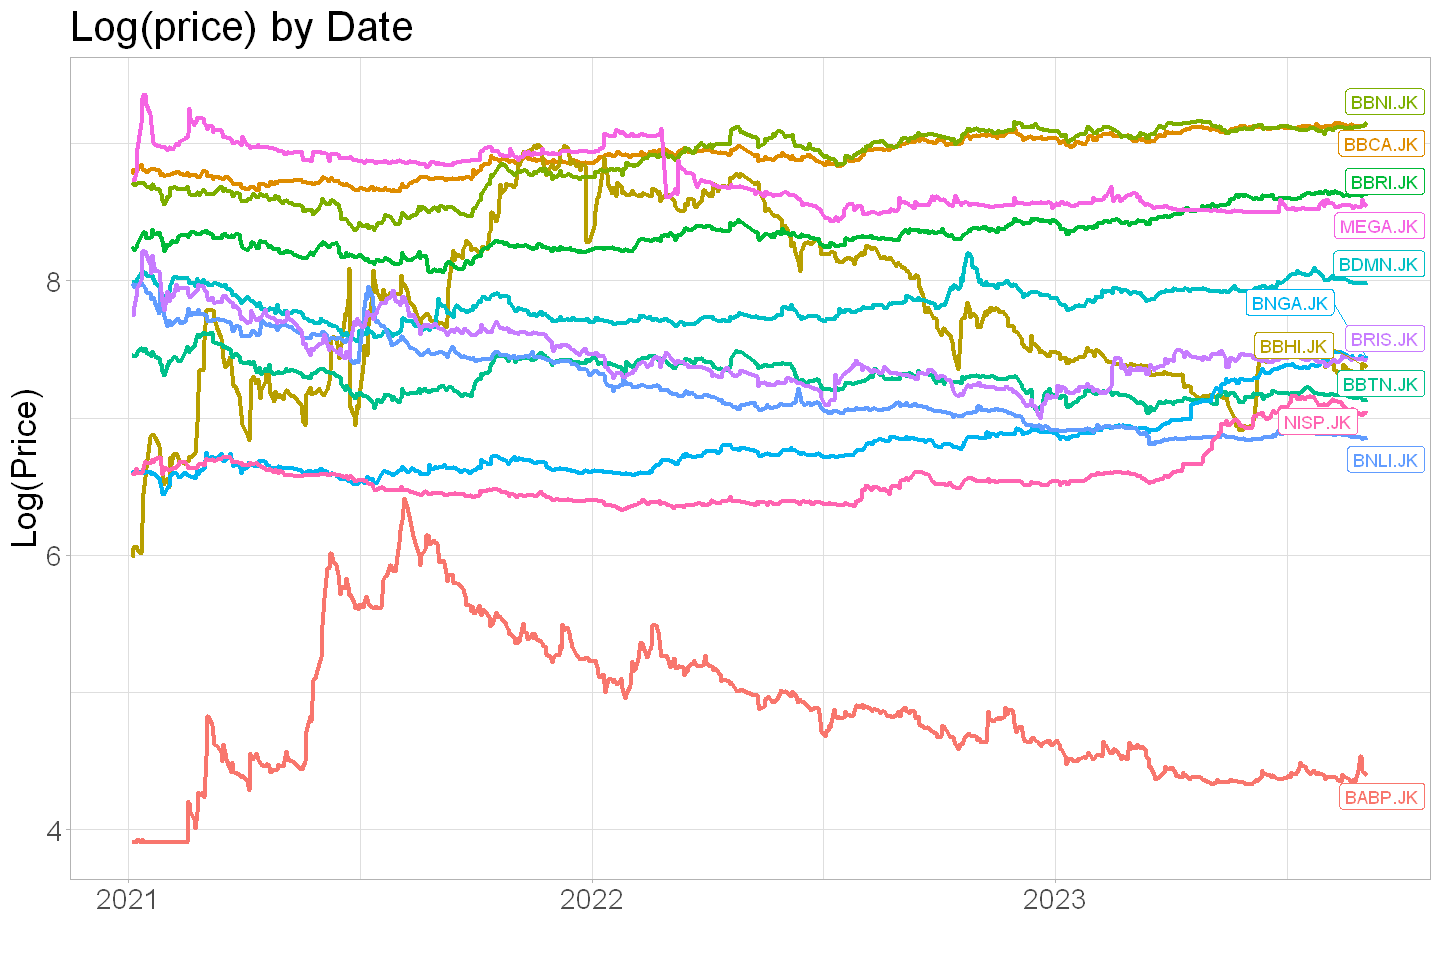

In [8]:
options(repr.plot.width=12, repr.plot.height=8)
dat_ends <- portfolioPrices %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)   %>%  mutate(Val=log(Val)) 
dat_ends  %>% mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='log(price)')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE) + labs(title='Log(price) by Date', y='Log(Price)', x='')

In [9]:
ts<- timeSeries(na.approx(portfolioPrices),
                units= tickers)
colSums(is.na(ts))

BBCA.JK BBRI.JK BRIS.JK MEGA.JK BBTN.JK BBHI.JK BABP.JK BBNI.JK NISP.JK BDMN.JK 
      0       0       0       0       0       0       0       0       0       0 
BNGA.JK BNLI.JK 
      0       0

In [10]:
ts_returns<- returns(ts, method='simple')*100
summary(data.frame(ts_returns))

    BBCA.JK            BBRI.JK            BRIS.JK             MEGA.JK         
 Min.   :-6.46154   Min.   :-9.09248   Min.   :-6.976749   Min.   :-39.67654  
 1st Qu.:-0.76075   1st Qu.:-0.90039   1st Qu.:-1.403102   1st Qu.: -0.64464  
 Median : 0.00000   Median : 0.00000   Median :-0.296736   Median :  0.00000  
 Mean   : 0.06417   Mean   : 0.07376   Mean   :-0.003215   Mean   :  0.02253  
 3rd Qu.: 0.82531   3rd Qu.: 0.94972   3rd Qu.: 0.969701   3rd Qu.:  0.49020  
 Max.   : 6.38298   Max.   : 6.12692   Max.   :23.684209   Max.   : 27.83209  
    BBTN.JK            BBHI.JK           BABP.JK           BBNI.JK        
 Min.   :-11.4770   Min.   :-63.267   Min.   :-9.6774   Min.   :-6.55271  
 1st Qu.: -0.9837   1st Qu.: -2.255   1st Qu.:-2.1739   1st Qu.:-0.85653  
 Median : -0.2578   Median : -0.367   Median : 0.0000   Median : 0.00000  
 Mean   : -0.0298   Mean   :  0.471   Mean   : 0.2087   Mean   : 0.08644  
 3rd Qu.:  0.8338   3rd Qu.:  1.444   3rd Qu.: 1.2424   3rd Qu.: 0.94351

In [11]:
data_arrange <- assetsArrange(ts_returns, method = "hclust")
ts_returns <- ts_returns[,data_arrange]

# 3. Basic Exploratory Data Analysis 

## 3.1 Calendar 

Warning message:
"tz(): Don't know how to compute timezone for object of class timeDate; returning "UTC"."


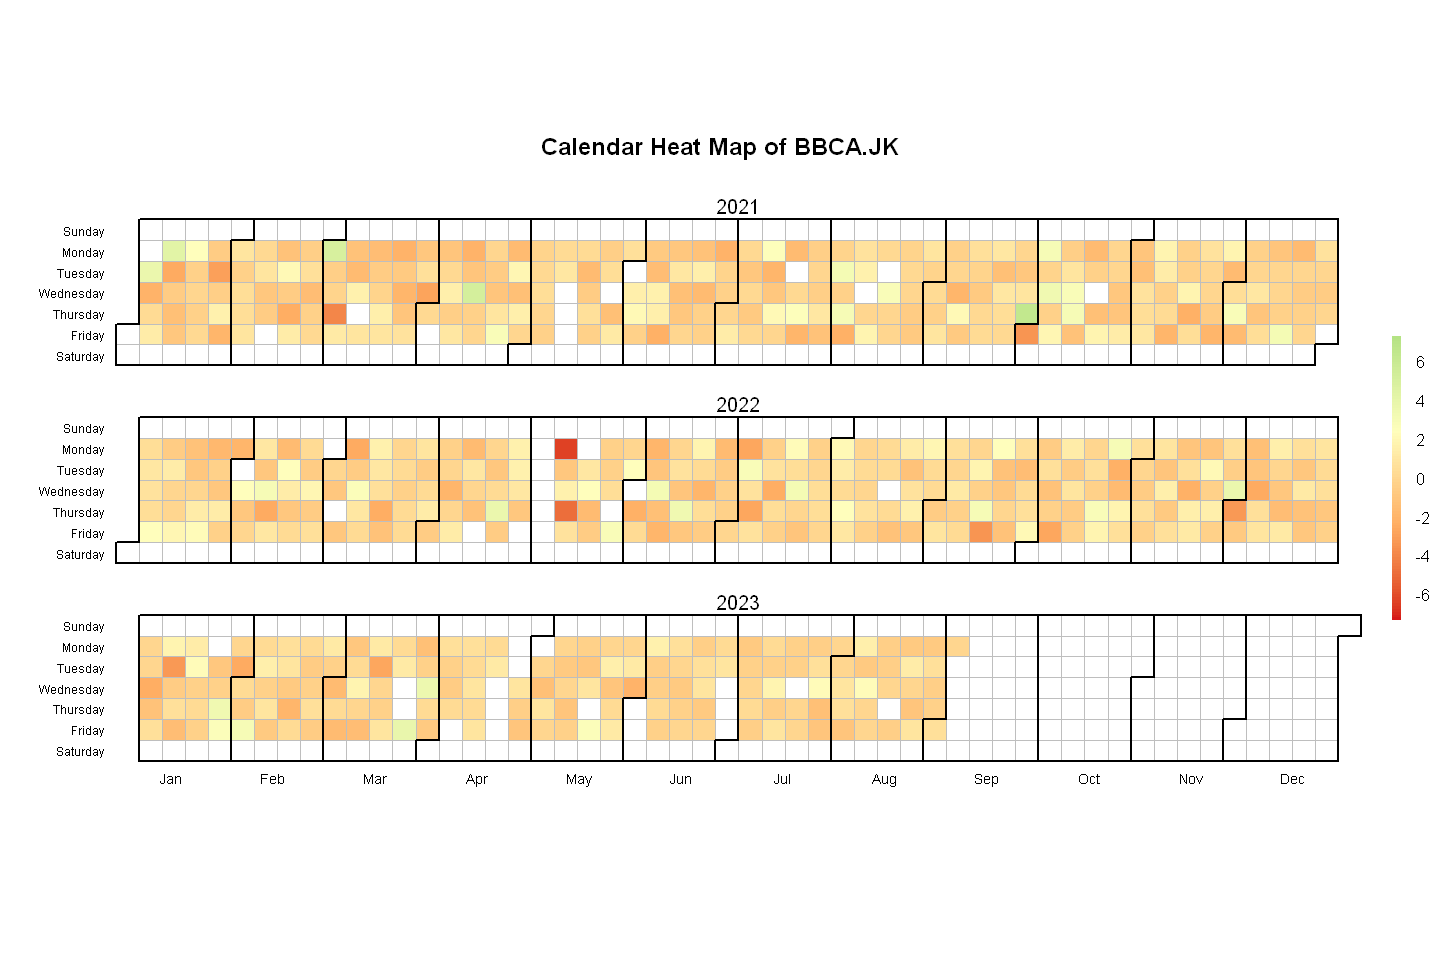

In [12]:
stock_ret_bbca <-ts_returns[, 'BBCA.JK']
calendarHeat(stock_ret_bbca, ncolors = 99, color='r2g', date.form='%Y-%m-%d')

## 3.2 Daily Returns Plot

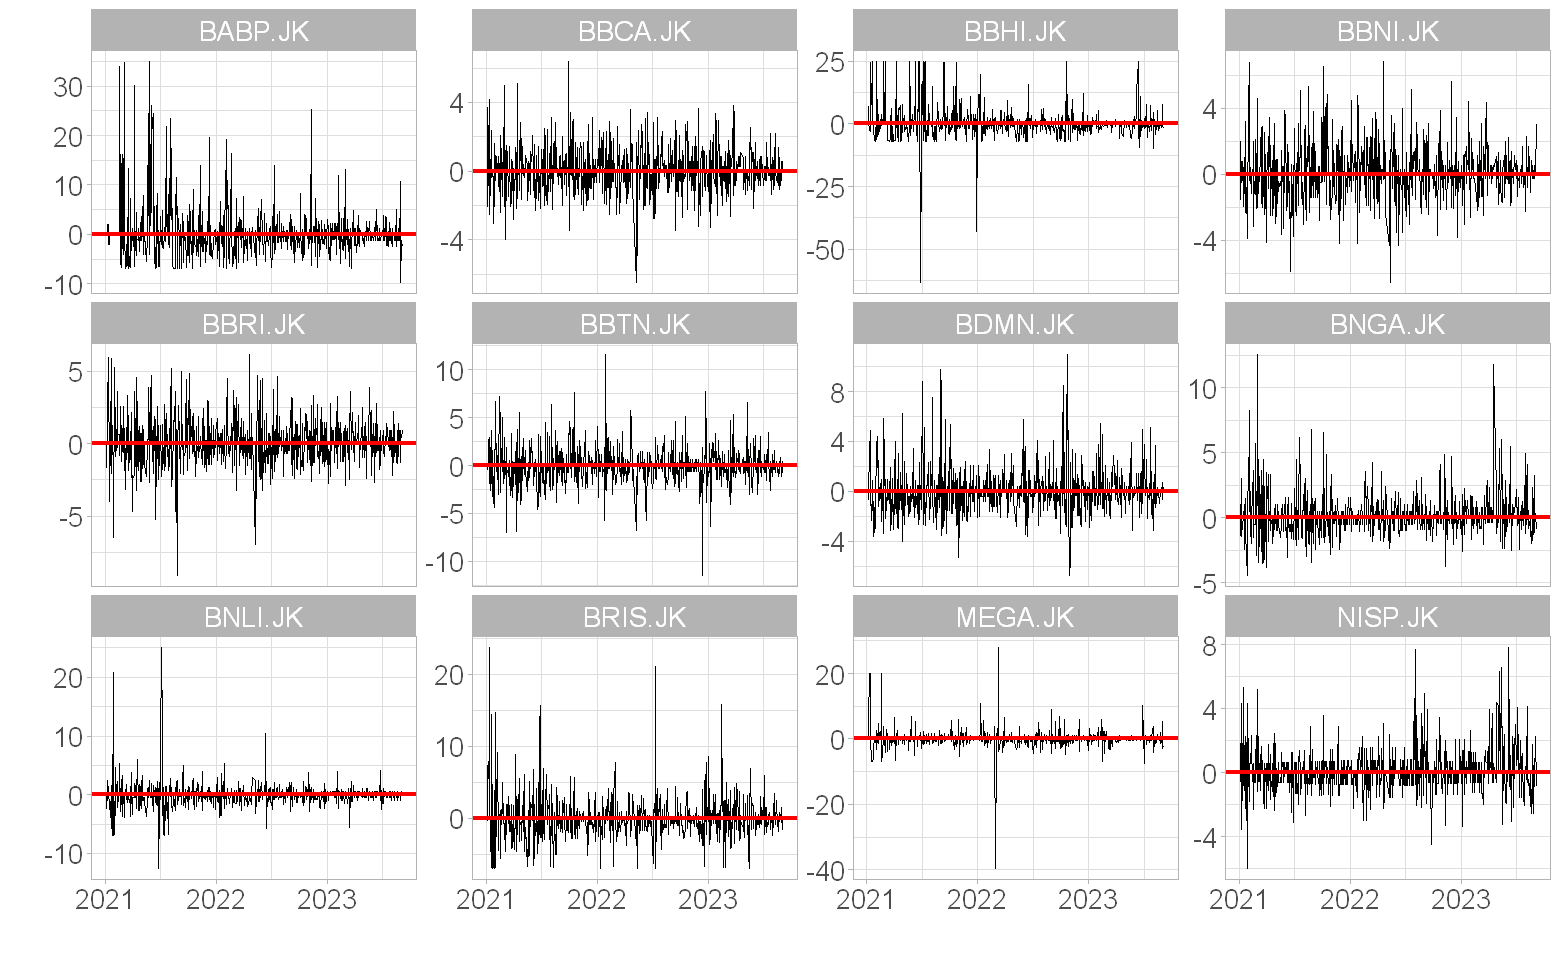

In [128]:
ts_returns  %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)  %>% 
ggplot(aes(date, Val)) + geom_line() + facet_wrap(~Vars, scales = 'free_y') + theme_light() + theme(text=element_text(size=20))+
geom_hline(yintercept = 0, col='red', lwd=1.2) + labs(y='', x='') 

## 3.3  Drawdown

### 3.3.1 Drawdown Plot

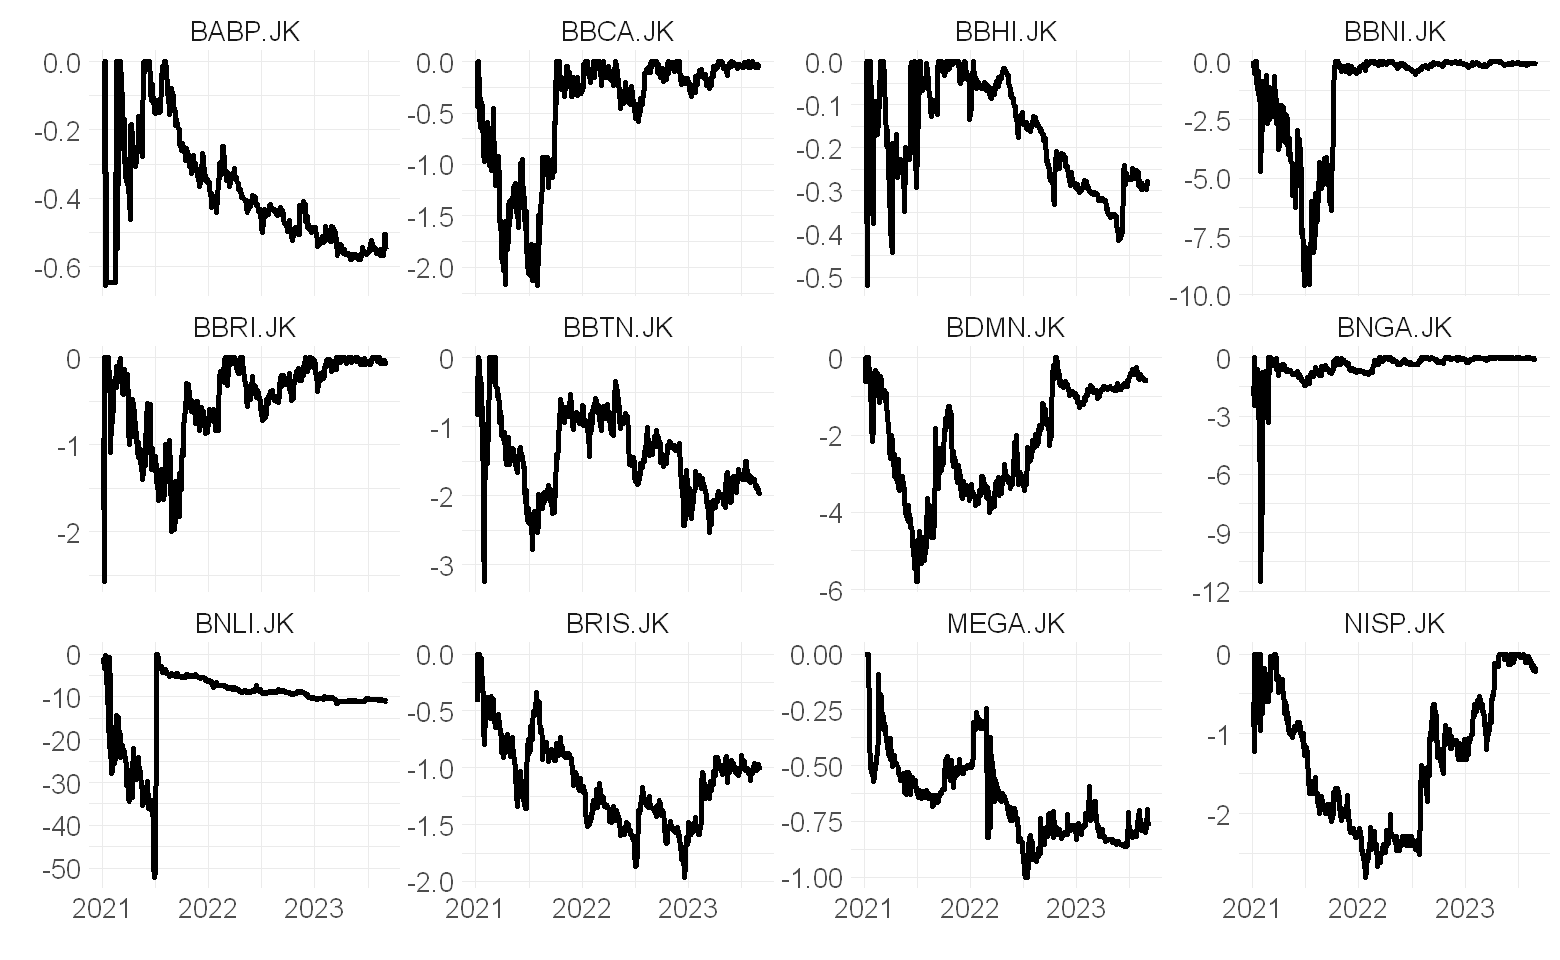

In [127]:
options(repr.plot.width=13, repr.plot.height=8)
Drawdowns(ts_returns, geometric = FALSE)  %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)  %>% 
ggplot(aes(date, Val)) + geom_line(lwd=1.5) + facet_wrap(~Vars,scales = 'free_y') + theme_minimal() + theme(text=element_text(size=20))+
labs(y='', x='')

### 3.3.2  Drawdown Window

In [15]:
stock<- 'BBCA.JK'
stock_dd <- table.Drawdowns(ts_returns[, stock], geometric = FALSE)
stock_dd

From       Trough     To         Depth   Length To Trough Recovery
1 2021-01-12 2021-08-02 2021-10-06 -2.1724 181    136       45      
2 2022-04-28 2022-07-13 2022-08-29 -0.5811  78     46       32      
3 2021-01-06 2021-01-06 2021-01-11 -0.4323   4      1        3      
4 2021-10-15 2021-11-02 2022-01-11 -0.3437  61     12       49      
5 2022-12-01 2023-01-13 2023-04-17 -0.3436  94     32       62

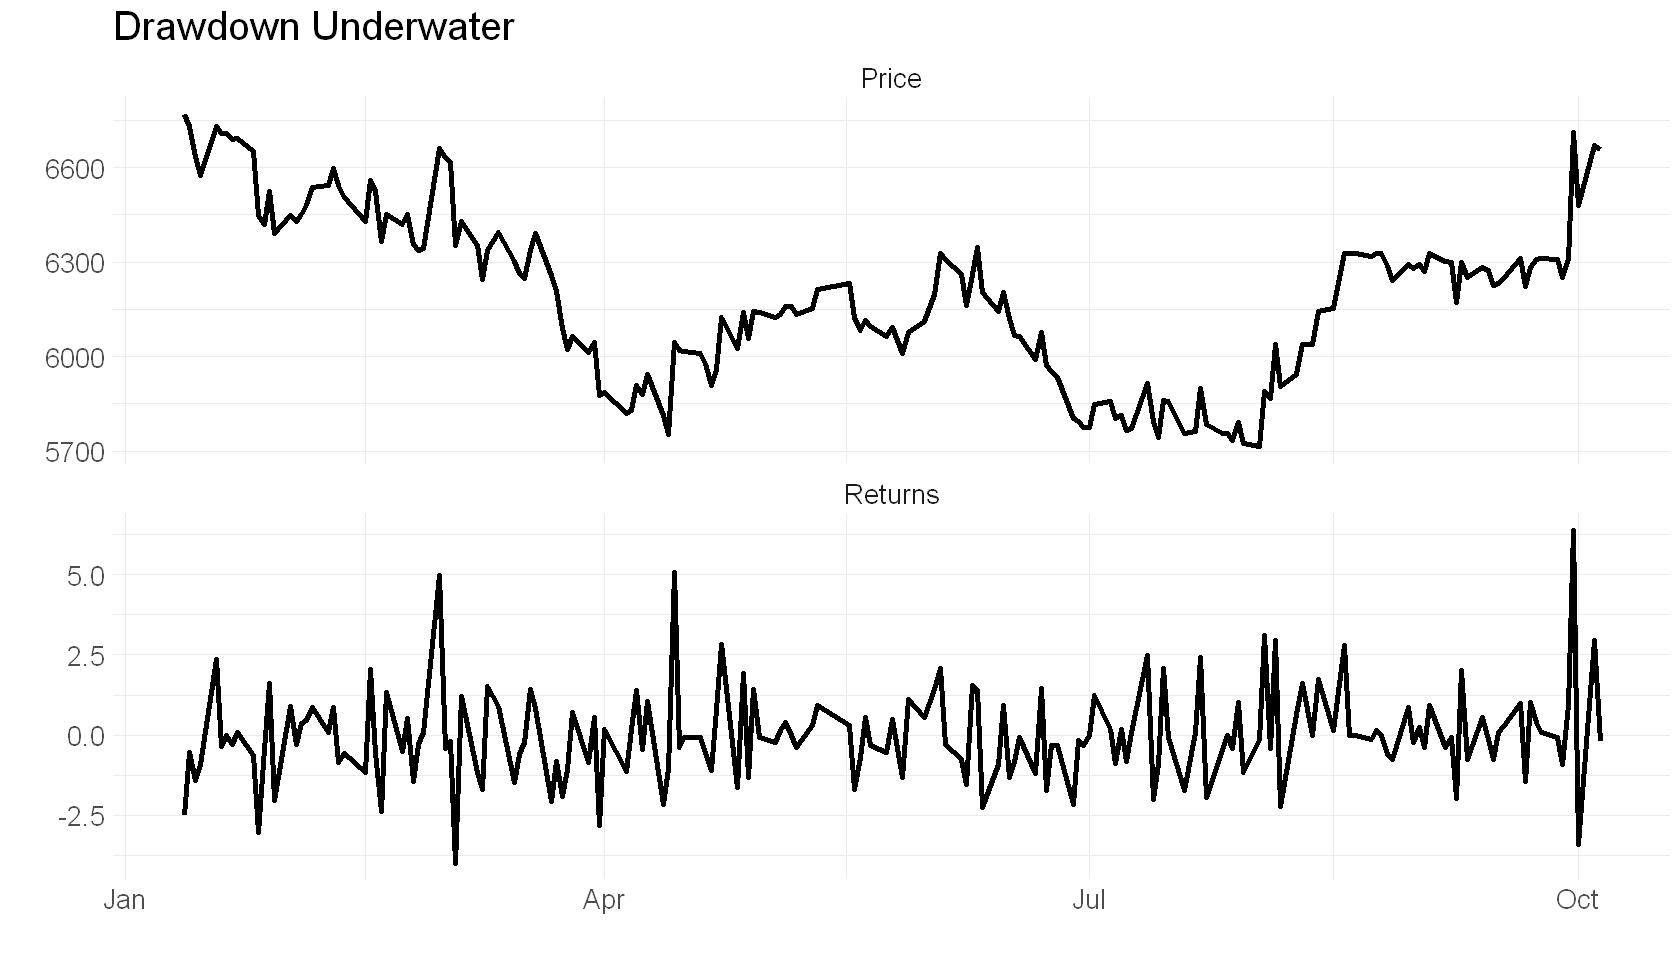

In [125]:
start<-stock_dd[1, 'From']
end<-stock_dd[1, 'To']
cbind(Returns=window(ts_returns[,stock], start = start, end = end),
      Price=window(ts[,stock], start = start, end = end))  %>% data.frame()  %>% 
mutate(date=as.Date(row.names(.)))  %>% gather('var', 'val', -date)  %>% ggplot(aes(date, val)) + geom_line(lwd=1.5) +
facet_wrap(~var, scale='free_y', nrow = 3) +  theme_minimal() + theme(text=element_text(size=20)) +
labs(y='', x='', title='Drawdown Underwater')

## 3.4 Descriptive Statistics

### 3.4.1 Table Statistics

In [13]:
df_stat <- data.frame(t(round(basicStats(ts_returns),2)))
reactable(df_stat, pagination = FALSE,static = getOption("reactable.static", TRUE),
          defaultColDef = colDef(cell = data_bars(df_stat, fill_color = c("lightblue","royalblue","navy"))))

HTML widgets cannot be represented in plain text (need html)

### 3.4.2 Assets Moments Plot

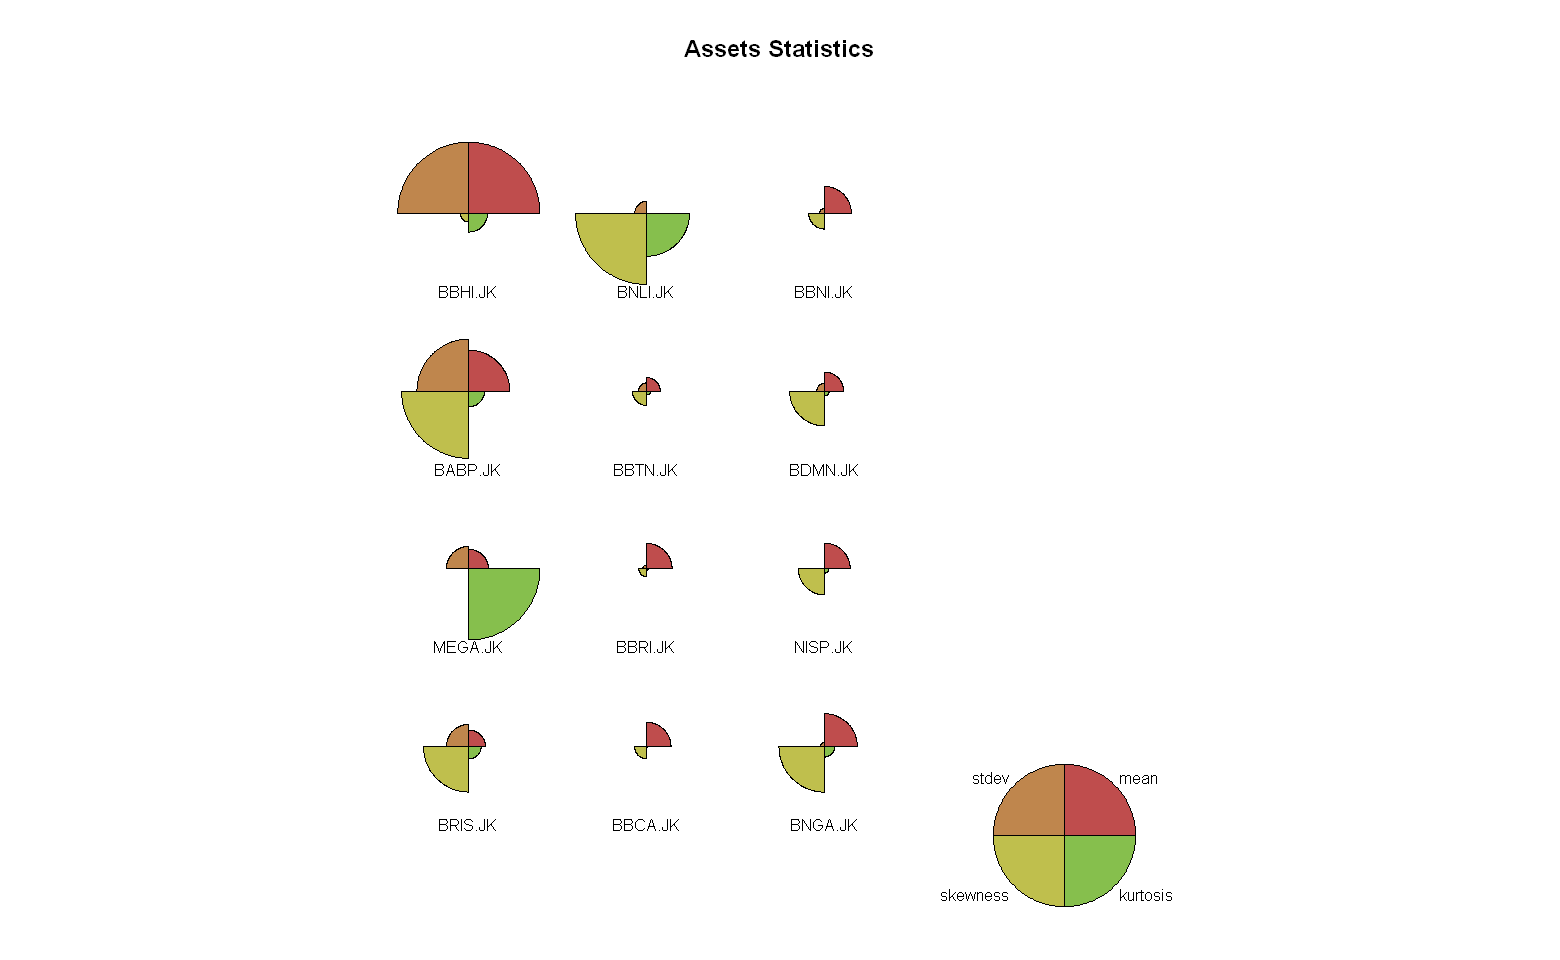

In [18]:
assetsMomentsPlot(ts_returns, title = "", description = "")

### 3.4.3  Asset Boxplot

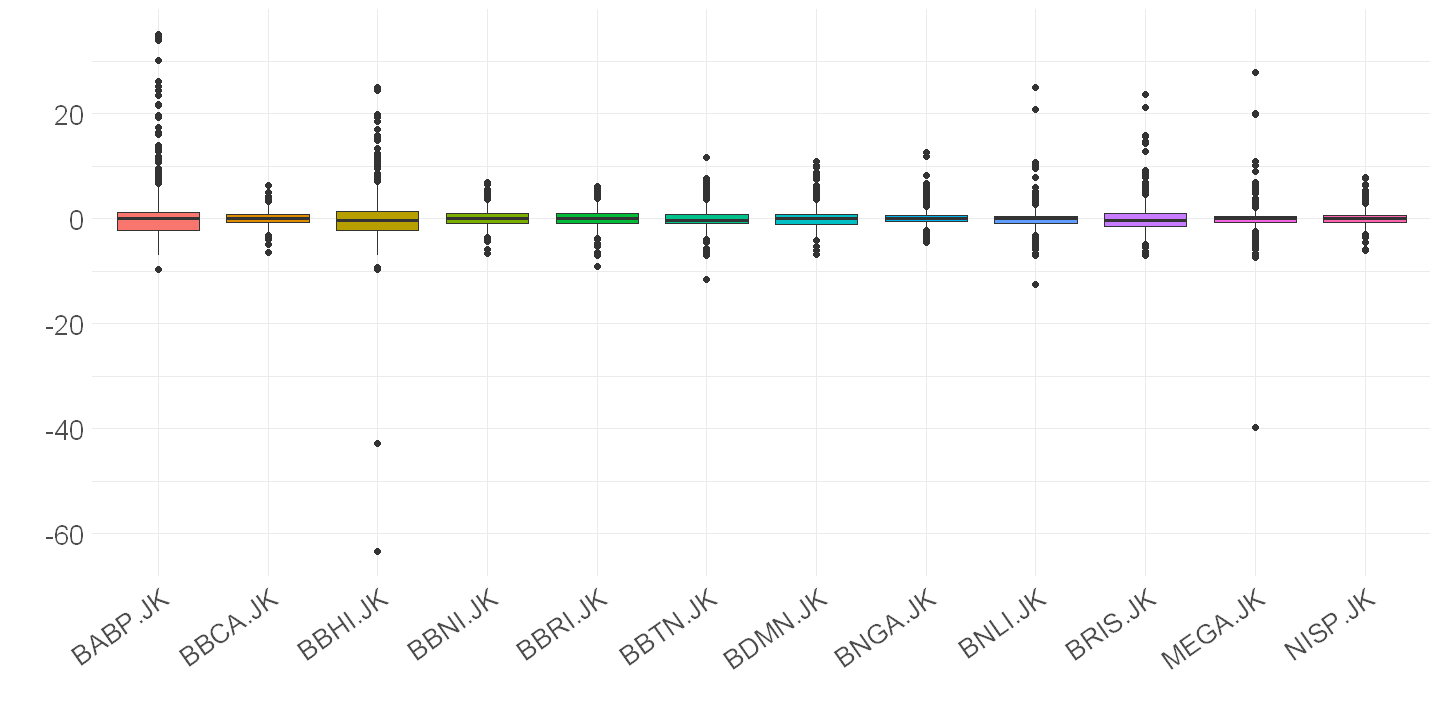

In [141]:
ts_returns  %>% data.frame()  %>% gather('Vars', 'Val')  %>% ggplot(aes(Vars, Val, fill=Vars)) + geom_boxplot() +
theme_minimal() + theme(text=element_text(size=20))  + theme(axis.text.x = element_text(angle = 35, vjust = 1, hjust=1))+
 theme(legend.position = "none") + labs(y='', x='')

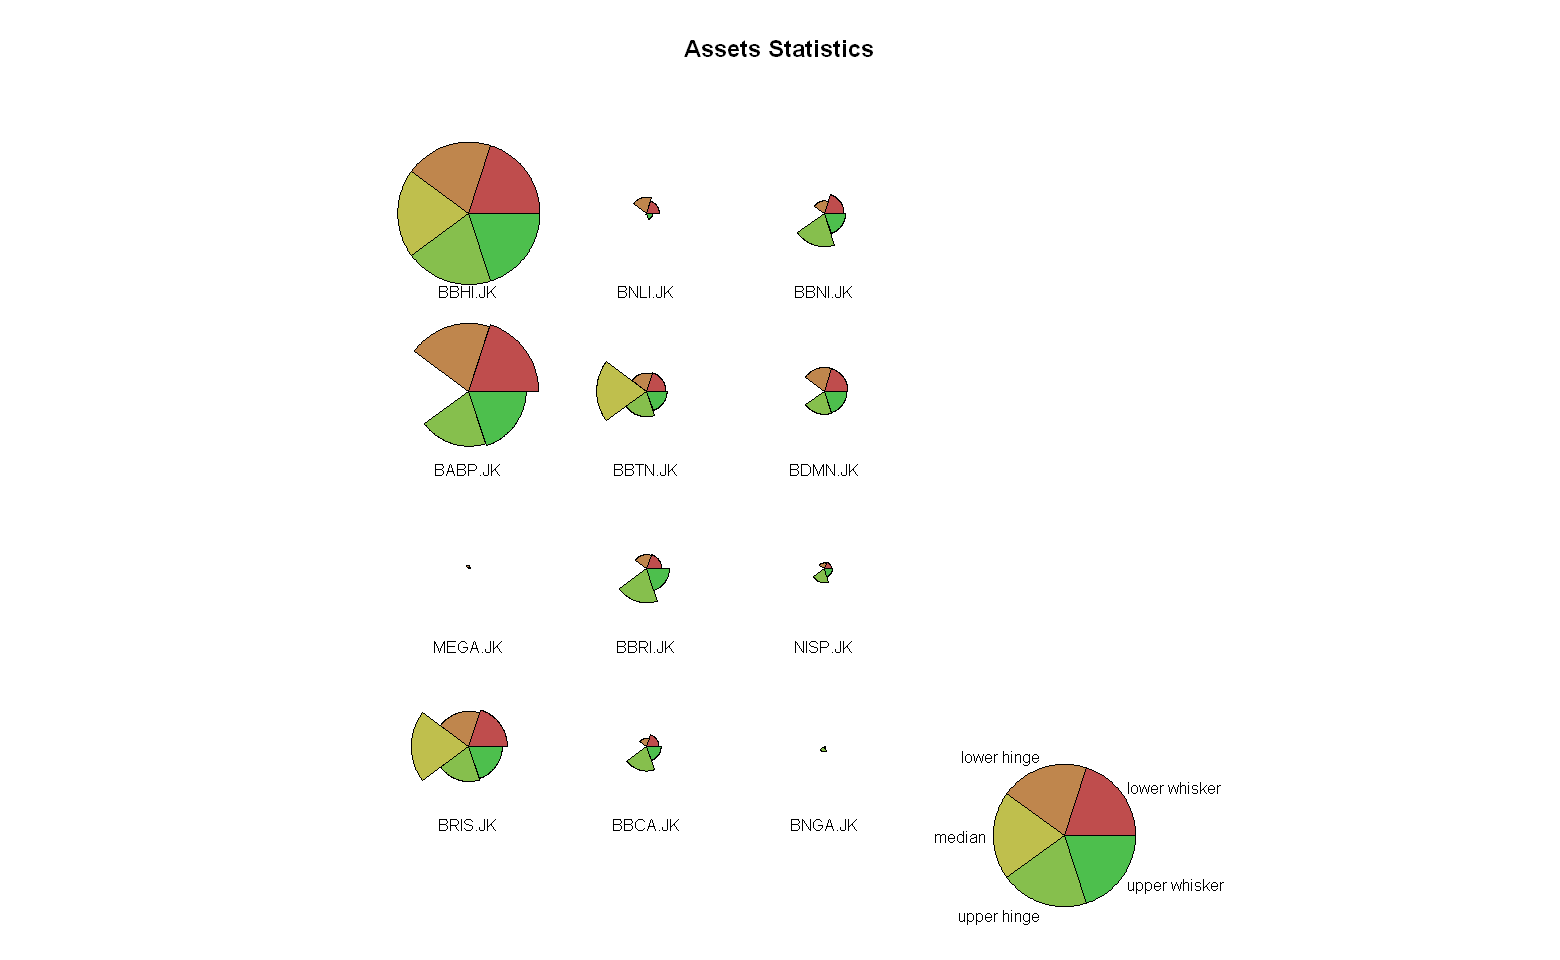

In [20]:
assetsBoxStatsPlot(ts_returns, title = "", description = "")

### 3.4.4  Assets Complete Statistics Plot

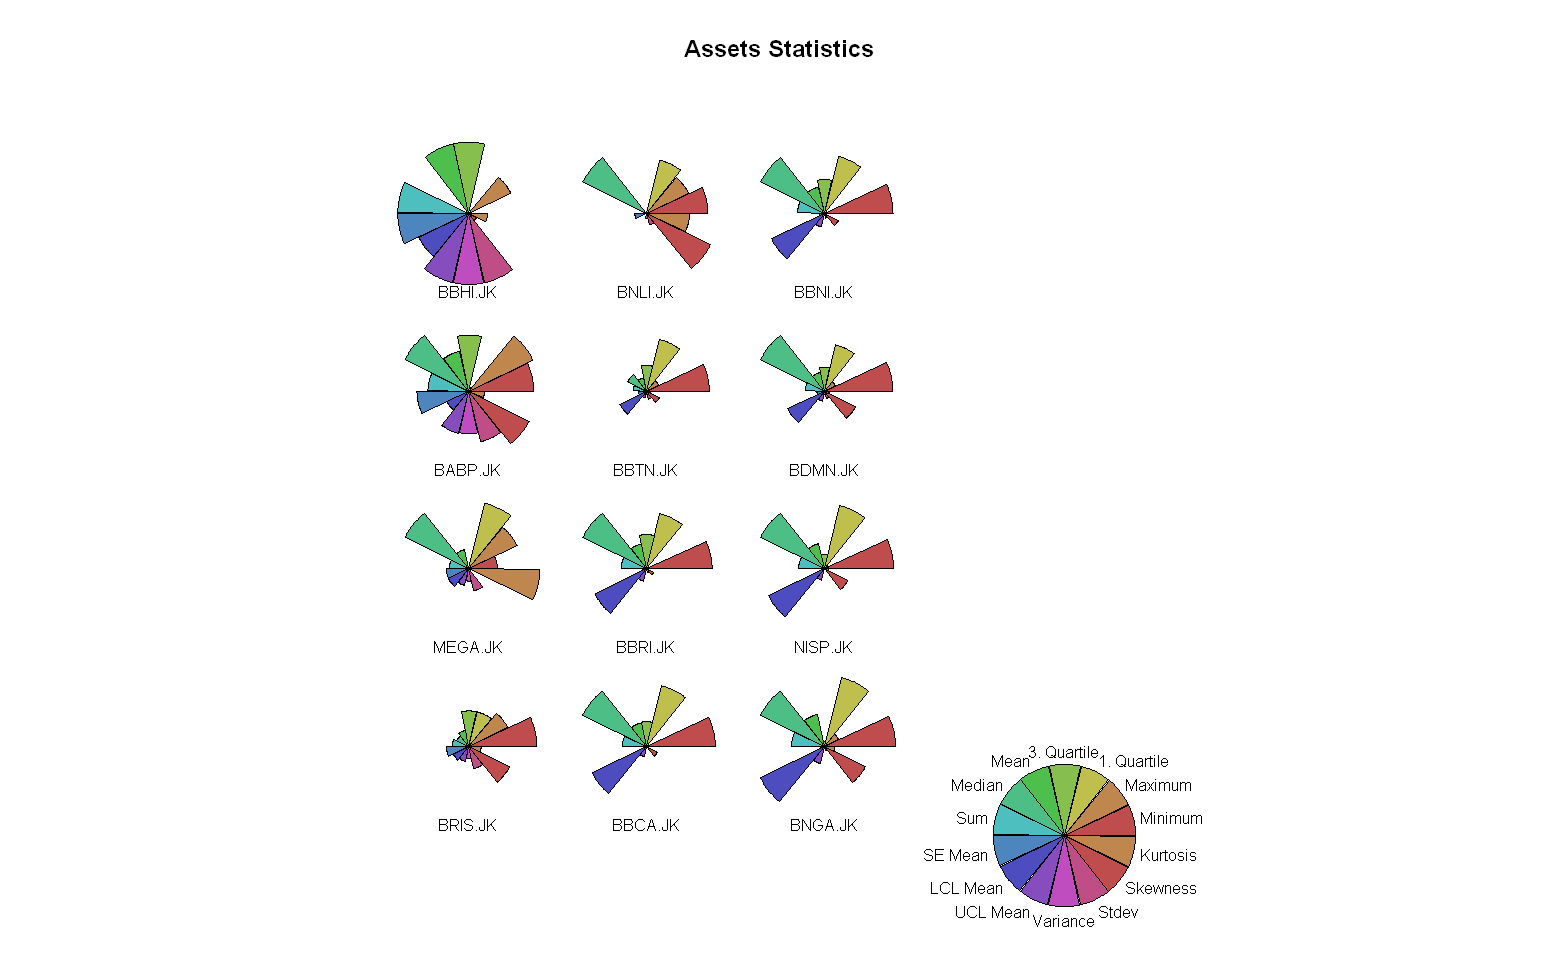

In [21]:
assetsBasicStatsPlot(ts_returns, title = "", description = "")

## 3.5 Rolling Mean and Standard Deviation

In [347]:
by <- periods(time(ts_returns), "4m","1m")
rollapply <- function(x, by, FUN, ...){
    ans <- applySeries(x, from = by$from, to = by$to, by = NULL,
                       FUN = FUN, format = x@format,
                       zone = finCenter(x), FinCenter = finCenter(x),
                       title = x@title, documentation = x@documentation, ...)
    attr(ans, "by") <- data.frame(from = format(by$from), to = format(by$to) )
    ans
}

### 3.5.1 Rolling Mean

Warning message:
"ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


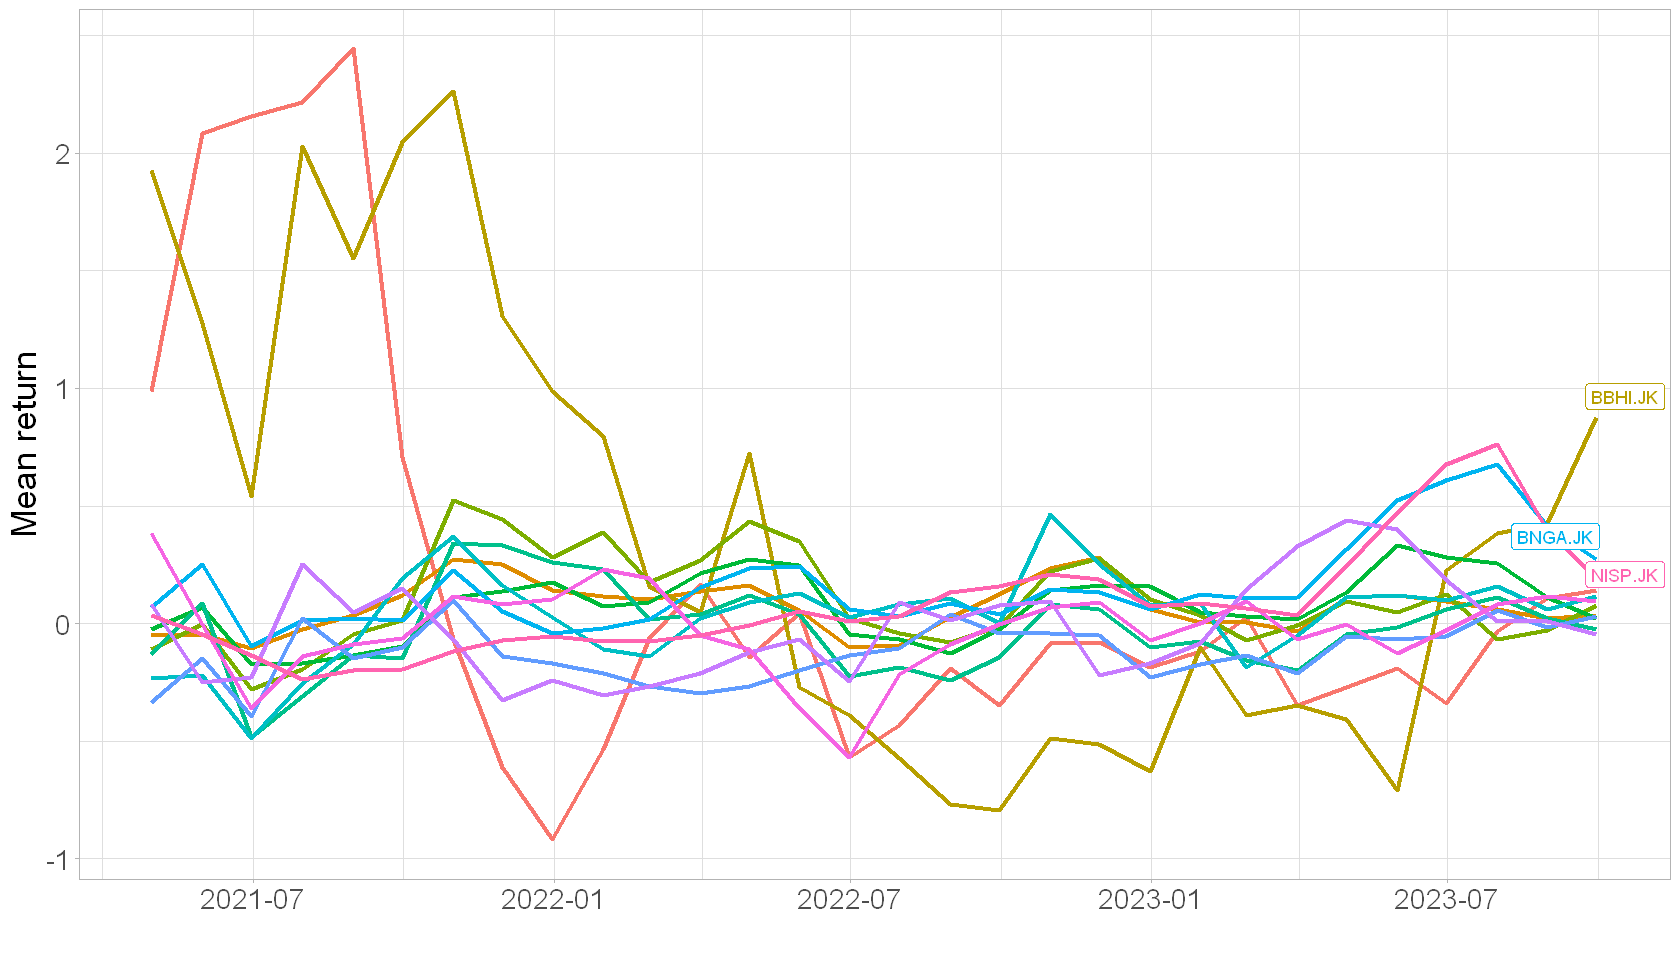

In [126]:
options(repr.plot.width=14, repr.plot.height=8)
ts.ROLL <- rollapply(ts_returns, by, FUN = "colMeans")
dat_ends <- ts.ROLL %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)
dat_ends %>% mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='Mean return', x='')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE)

### 3.5.1 Rolling Standard Deviation

Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


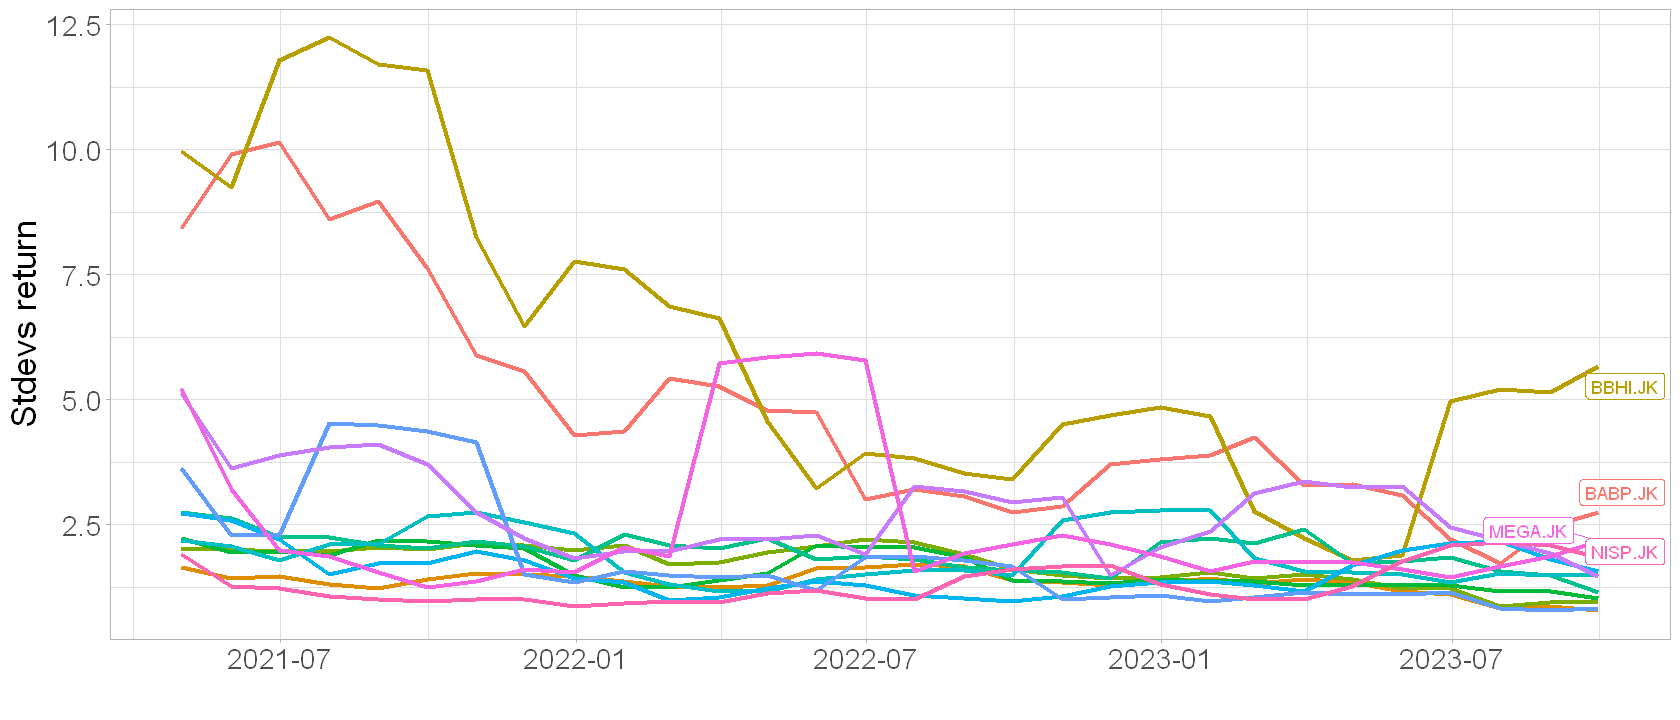

In [130]:
options(repr.plot.width=14, repr.plot.height=6)
ts.ROLL <- rollapply(ts_returns, by, FUN = "colStdevs")
dat_ends <- ts.ROLL %>% data.frame() %>% mutate(date=as.Date(row.names(.))) %>% gather('Vars','Val', -date)
dat_ends %>% mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='Stdevs return', x='')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE)

## 3.6 Risk Reward Ratio

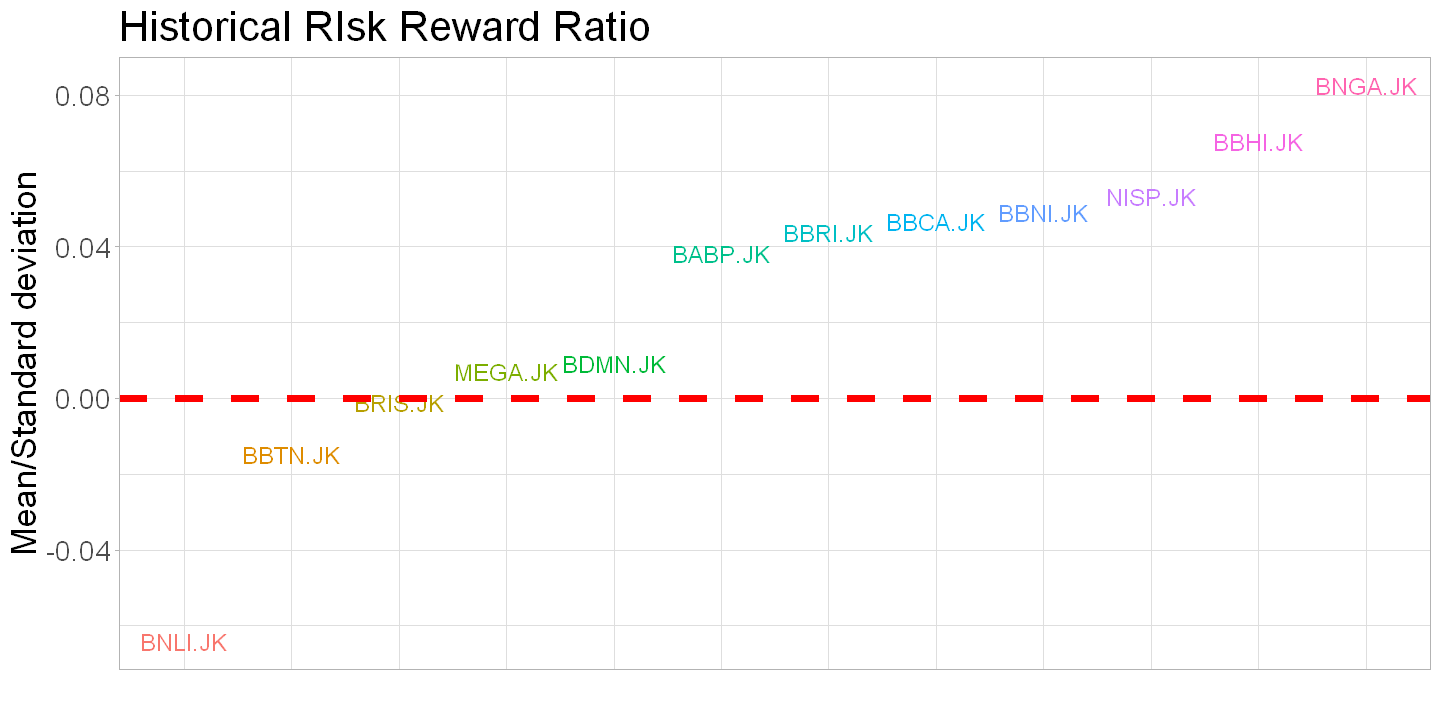

In [131]:
options(repr.plot.width=12, repr.plot.height=6)
mean_sd <- sort(colMeans(ts_returns)/colStdevs(ts_returns))  %>% data.frame() 
names(mean_sd) <-'MeanSdRatio'
mean_sd$asset <- factor(rownames(mean_sd), levels=rownames(mean_sd))
mean_sd  %>% ggplot(aes(asset, MeanSdRatio, label=asset, color=asset)) + geom_text(size=5)+ 
theme_light() + theme(text=element_text(size=21)) + geom_hline(yintercept=0, linetype="dashed", 
                color = "red", size=2) + theme(legend.position = "none") +theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())+
labs(y='Mean/Standard deviation',x='', title='Historical RIsk Reward Ratio')

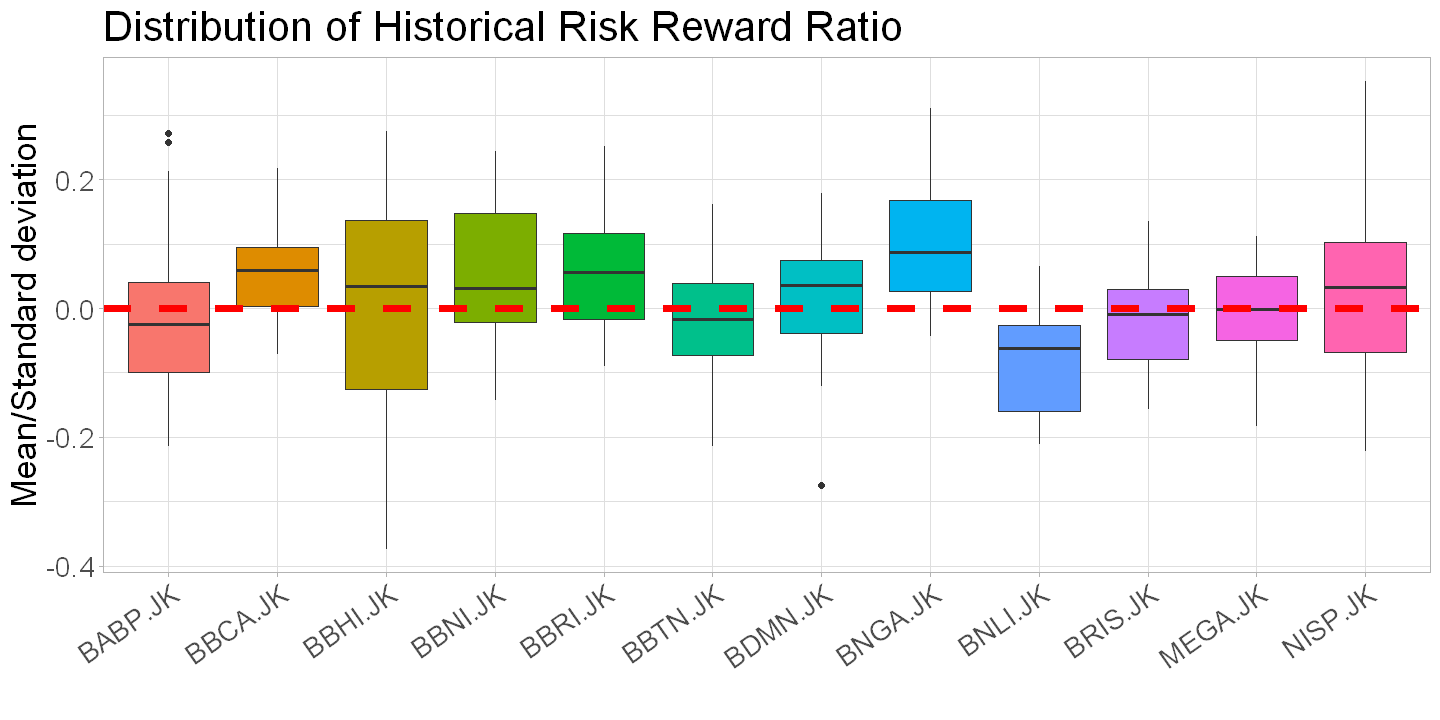

In [140]:
mean_sd_roll <- function(data) colMeans(data)/colStdevs(data)
results <- sapply(1:length(by$from), function(x) mean_sd_roll(window(ts_returns,by$from[x],by$to[x] )))
results  %>% t()  %>% data.frame()  %>% mutate(date=as.Date(data.frame(by$from)[,1]))  %>% 
gather('Vars','Val', -date)  %>% ggplot(aes(Vars, Val, fill=Vars)) + geom_boxplot()  + theme_light() + theme(text=element_text(size=21))+
labs(y='Rolling Mean/Sd Dist')  + theme(legend.position = "none") + geom_hline(yintercept=0, linetype="dashed", 
                color = "red", size=2) + theme(axis.text.x = element_text(angle = 35, vjust = 1, hjust=1)) +
                labs(y='Mean/Standard deviation', x='',title='Distribution of Historical Risk Reward Ratio')

## 3.7 Correlation Analysis

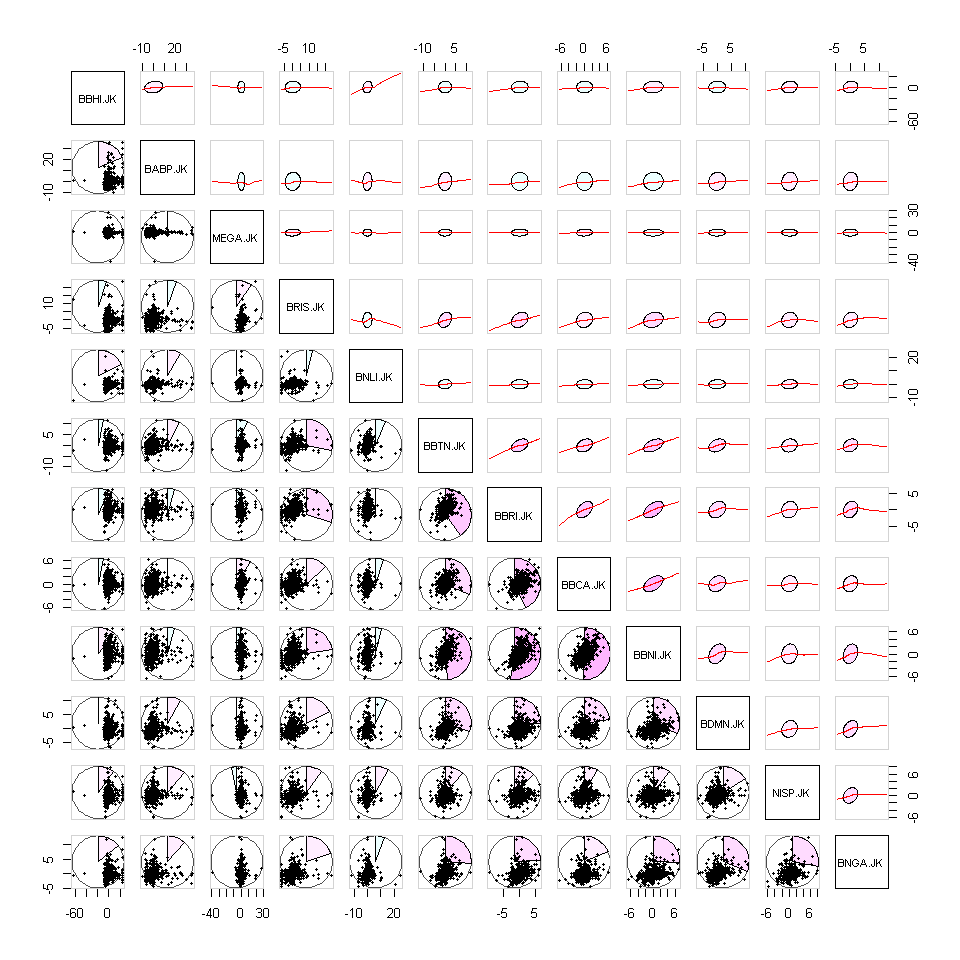

In [149]:
options(repr.plot.width=8, repr.plot.height=8)
assetsCorgramPlot(ts_returns, pch = 19, cex = 0.5)

#  4. Assets Clustering

## 4.1 Principal Component Analysis BiPlot

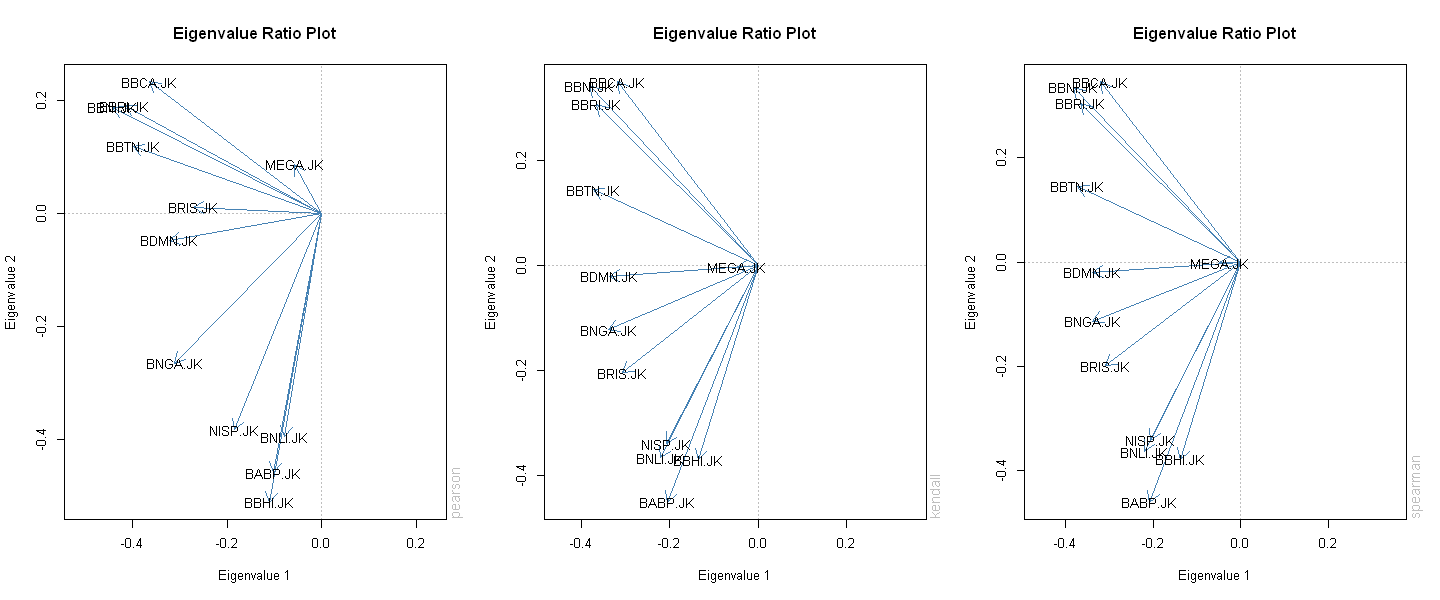

In [21]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1, 3))
assetsCorEigenPlot(ts_returns, method = "pearson")
assetsCorEigenPlot(ts_returns, method = "kendall")
assetsCorEigenPlot(ts_returns, method = "spearman")

##  4.2 KNN (K-Nearest Neighbors)

In [30]:
knn_ret<- assetsSelect(ts_returns, "kmeans", control = c(centers = 3, algorithm = "Hartigan-Wong"))
knn_ret

K-means clustering with 3 clusters of sizes 10, 1, 1

Cluster means:
  2021-01-05 2021-01-06 2021-01-07 2021-01-08 2021-01-11 2021-01-12 2021-01-13
1  0.0709999 -0.3281108  2.6292624   2.964322   4.588135   4.126775  0.3757854
2  7.0707071  0.9433962  0.9345794  -2.314815  -2.843602  24.390244 24.5098039
3  0.0000000  0.0000000  0.0000000   2.000000  -1.960784   2.000000 -1.9607843
  2021-01-14 2021-01-15 2021-01-18 2021-01-19 2021-01-20 2021-01-21 2021-01-22
1  0.3288039  -2.406672   -1.43861  -2.145495   2.525391  -1.820564  -2.265216
2 11.8110236   7.746479   24.83660   1.047120   0.000000   1.036269  -2.051282
3  0.0000000   0.000000    0.00000   0.000000   0.000000   0.000000   0.000000
  2021-01-25 2021-01-26 2021-01-27 2021-01-28 2021-01-29 2021-02-01 2021-02-02
1  -1.292678 -0.3292962  -2.915843  -3.634135  -2.518220   3.033189  0.4942507
2  -6.806283 -6.7415730  -6.626506  -6.451613  -6.896552   4.444444 -6.3829787
3   0.000000  0.0000000   0.000000   0.000000   0.000000   0.000000  0.0000000
  2021-02-03 2021-02-04 2021-02-05 2021-02-08 2021-02-09 2021-02-10  2021-02-11
1   2.152478  0.2870863   1.211470   1.636007 -0.6278185  0.3661118 -0.07091809
2  25.000000 -4.8484848   7.006369   1.190476 -4.1176471 -2.4539877  0.62893082
3   0.000000  0.0000000   0.000000   0.000000  0.0000000  0.0000000  0.00000000
  2021-02-15 2021-02-16 2021-02-17 2021-02-18 2021-02-19  2021-02-22 2021-02-23
1   1.308138   1.179266 -0.9582598  0.9352309 -0.5772469  0.02539095  0.1590234
2  -1.875000   1.910828  0.0000000  3.7500000 -0.6024096  1.81818182  1.1904762
3   0.000000   0.000000 34.0000000 -1.4925373 -6.0606061 -4.83870968 -6.7796610
  2021-02-24 2021-02-25 2021-02-26 2021-03-01 2021-03-02 2021-03-03 2021-03-04
1   2.174792  0.7273126  -1.044212   2.045066  -1.102748   1.058204  -1.929144
2  24.705882 25.0000000  16.981132   0.000000  24.838710  24.547804   0.000000
3  12.727273 16.1290323  -2.777778   2.857143  -4.166667  34.782609  34.408602
  2021-03-05 2021-03-08 2021-03-09 2021-03-10 2021-03-12  2021-03-15
1 -0.4332699  0.5450905  -1.881305  0.1771441  0.5473364  0.07417086
2  0.0000000  0.0000000   0.000000 -6.6390041 -6.6666667 -6.90476190
3  0.0000000 -6.4000000  -6.837607 -6.4220183 -1.9607843 -4.00000000
   2021-03-16 2021-03-17 2021-03-18 2021-03-19 2021-03-22 2021-03-23 2021-03-24
1  0.09414469  -1.108383   1.114633 -0.9510330 -0.6117142  -1.236387  -1.969229
2 -6.90537084  -6.868132  -6.194690  0.6289308  6.2500000  -5.294118  -6.832298
3 -6.25000000  13.333333  -6.862745 -4.2105263 -6.5934066  -2.352941   7.228916
  2021-03-25 2021-03-26 2021-03-29 2021-03-30 2021-03-31 2021-04-01 2021-04-05
1  -1.273164   1.911026  -1.177185  -2.454205  -1.980759  0.7123502 -0.8108203
2  -7.000000  -1.075269  -6.884058  -6.614786  -6.666667 -6.6964286 -6.6985646
3  -6.741573   0.000000  -1.204819  -1.219512  -1.234568  1.2500000 -3.7037037
  2021-04-06 2021-04-07 2021-04-08 2021-04-09 2021-04-12 2021-04-13 2021-04-14
1  0.8909873 -0.5041303   1.501353  0.4756228  -2.474912 -0.3991323   2.335872
2 -4.6153846 24.7311828  25.000000  2.7586207  -5.369128  3.1914894  -6.872852
3 -6.4102564 30.1369863  -1.052632 -3.1914894   4.395604 -4.2105263  -1.098901
   2021-04-15  2021-04-16 2021-04-19 2021-04-20 2021-04-21 2021-04-22
1 -0.05075233 -0.09649862  0.5518279  -1.058722 -1.0275988  0.8839244
2 -6.64206642  6.32411067  5.9479554   7.368421 -0.6535948 -6.9078947
3 -1.11111111 -1.12359551 -1.1363636   1.149425  0.0000000 -2.2727273
  2021-04-23 2021-04-26 2021-04-27 2021-04-28 2021-04-29 2021-04-30 2021-05-03
1 -0.4616601  -1.145430  0.3165346 -0.4203054  0.3335377 -0.4982223 -0.5892173
2 -6.7137809  -6.439394  7.6923077 -3.3834586 -1.1673152  2.3622047 -3.0769231
3 -3.4883721   2.409639 -1.1764706  1.1904762  3.5294118 -1.1363636  0.0000000
  2021-05-04 2021-05-05 2021-05-06 2021-05-07 2021-05-10 2021-05-11 2021-05-17
1 0.09295908  0.4680739  0.6678653  -1.208460  0.1377788 -0.4154794  -1.905916
2 3.57142857  2.6819923  0.0000000  -2.238806

## 4.3 Distance based dendogram

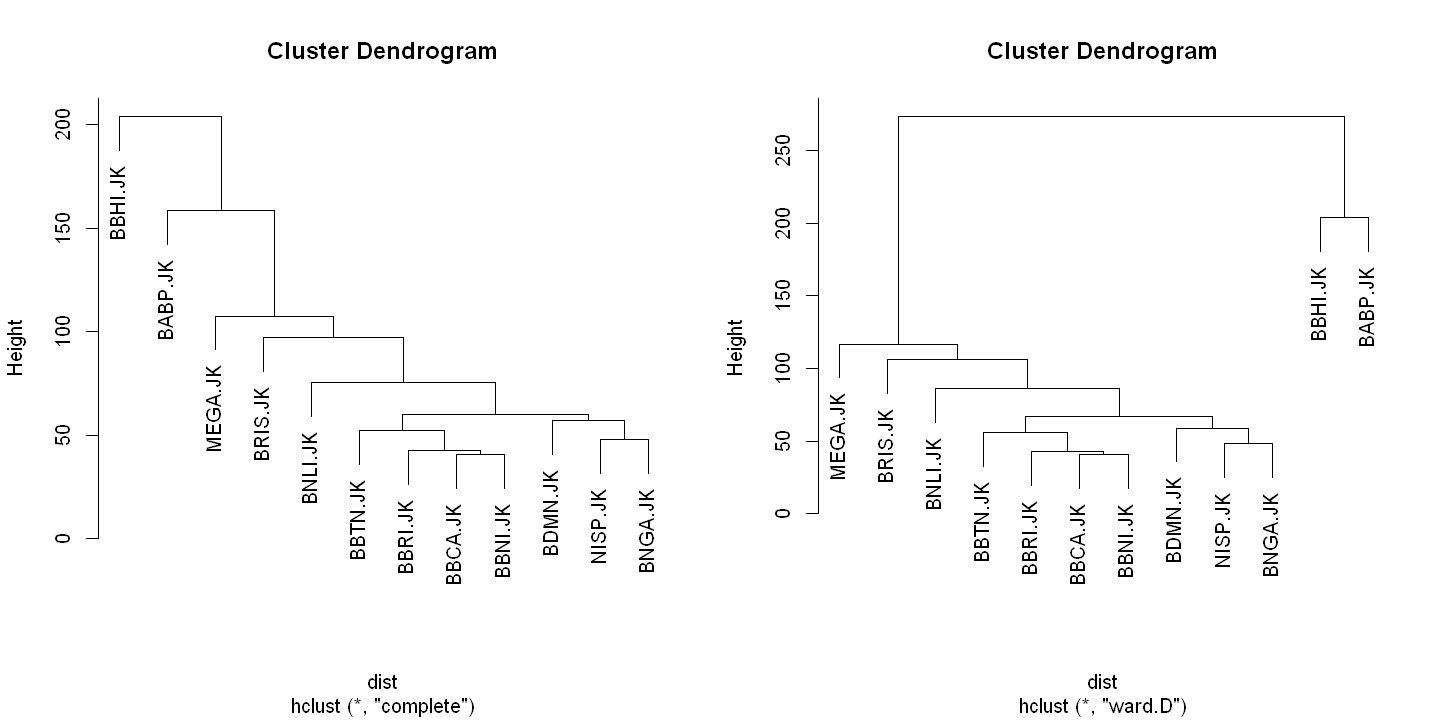

In [31]:
options(repr.plot.width=12, repr.plot.height=6)
clusteredAssets <- function(x, dist = "euclidean", method = "complete") {
    x = as.matrix(x)
    dist = dist(t(x), method = dist)
    clustering = hclust(dist, method = method)
    clustering
}
par(mfrow=c(1,2))
clusters1 <- clusteredAssets(ts_returns)
clusters2 <- clusteredAssets(ts_returns,method = 'ward.D')
plot(clusters1)
plot(clusters2)

## 4.4 Factor Analysis

### 4.4.1 Rolling Alpha Score

In [32]:
factor_alpha_risk<- function(df){
    k <- ncol(df)
    covDF <- cov(df)
    tot_variance <- sum(covDF)
    variance_DFi <- tr(covDF)
    k/(k-1)*(1-variance_DFi/tot_variance)
}

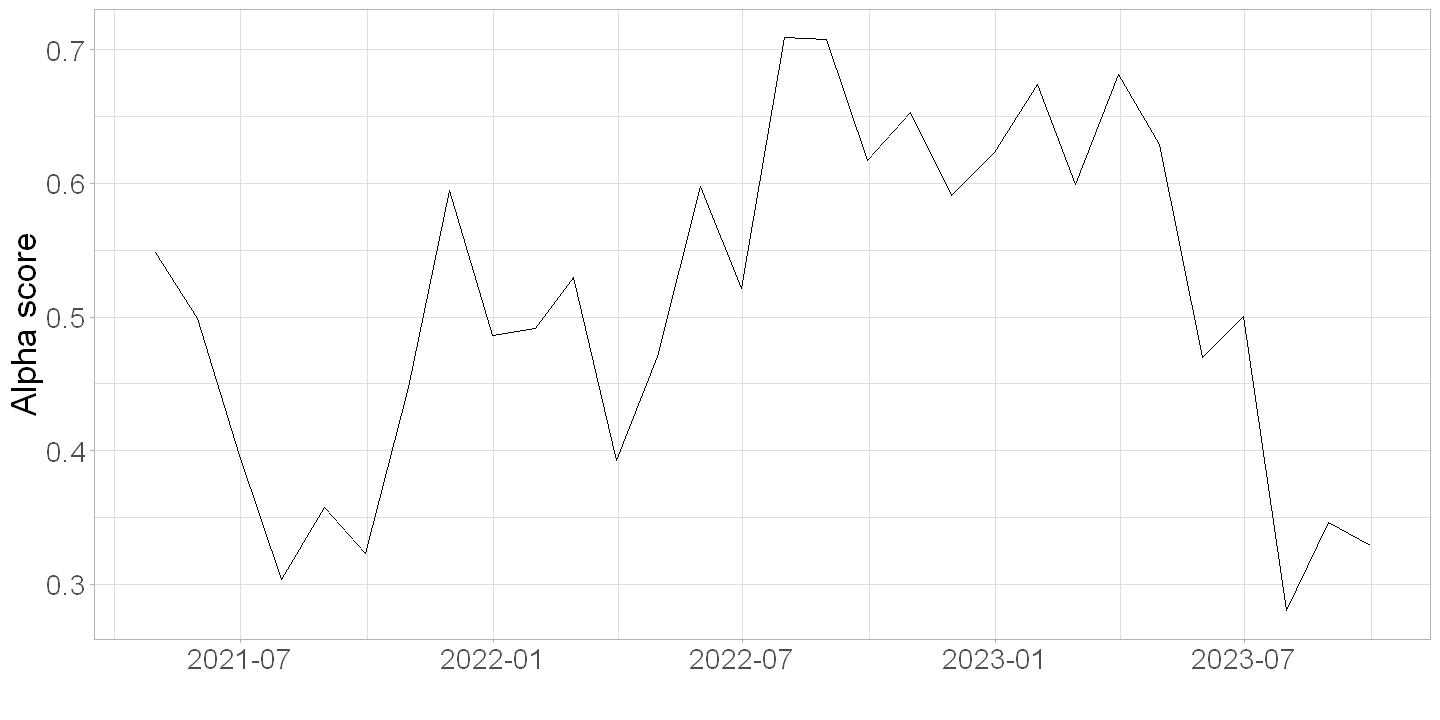

In [148]:
options(repr.plot.width=12, repr.plot.height=6)
results <- sapply(1:length(by$from), function(x) factor_alpha_risk(window(ts_returns,by$from[x],by$to[x] ))) %>% data.frame()
names(results) <- 'factor_a_score'
results %>% mutate(date=as.Date(data.frame(by$to)[,1]))  %>%  ggplot(aes(date, factor_a_score)) + geom_line() +
theme_light() + theme(text=element_text(size=21)) + labs(y='Alpha score', x='')

### 4.4.2 Omega Score

[1] 0.7325997

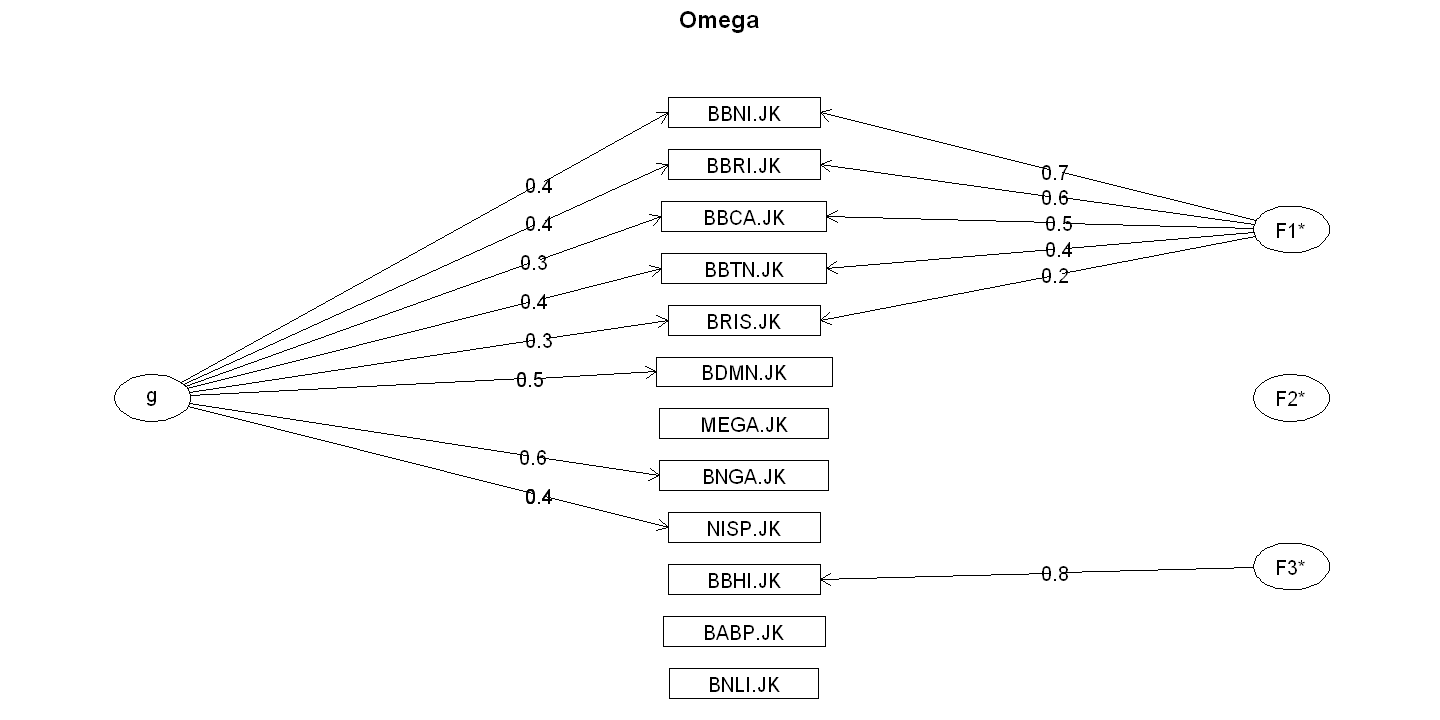

In [34]:
omega(ts_returns)$omega.tot

## 4.5 Multidimensional Scaling

### 4.5.1 Data point perspective

initial  value 2.581709 
iter   5 value 1.027910
iter  10 value 0.522324
iter  15 value 0.333187
iter  20 value 0.205700
iter  25 value 0.144484
iter  30 value 0.132913
iter  35 value 0.121073
iter  40 value 0.045906
final  value 0.008830 
converged


Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`."


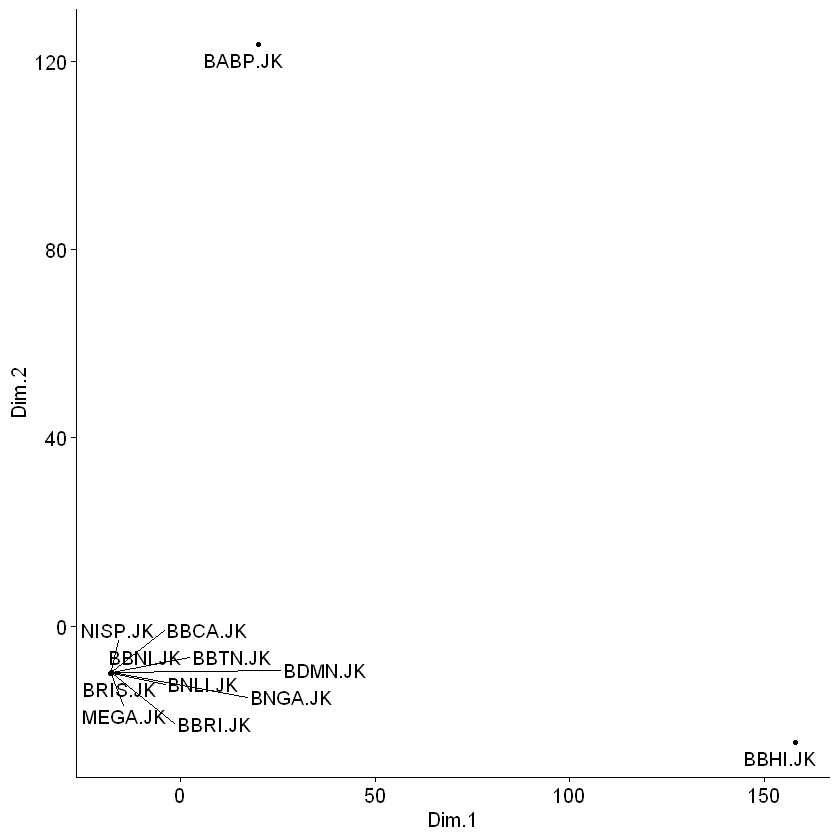

In [35]:
options(repr.plot.width=7, repr.plot.height=7)
mds <- t(ts_returns) %>% dist() %>% isoMDS() %>% .$points %>% as_tibble()
colnames(mds) <- c("Dim.1", "Dim.2")
ggscatter(mds, x = "Dim.1", y = "Dim.2", label = rownames(t(ts_returns)),
          size = 1,repel = TRUE)

### 4.5.2 Correlation perspective

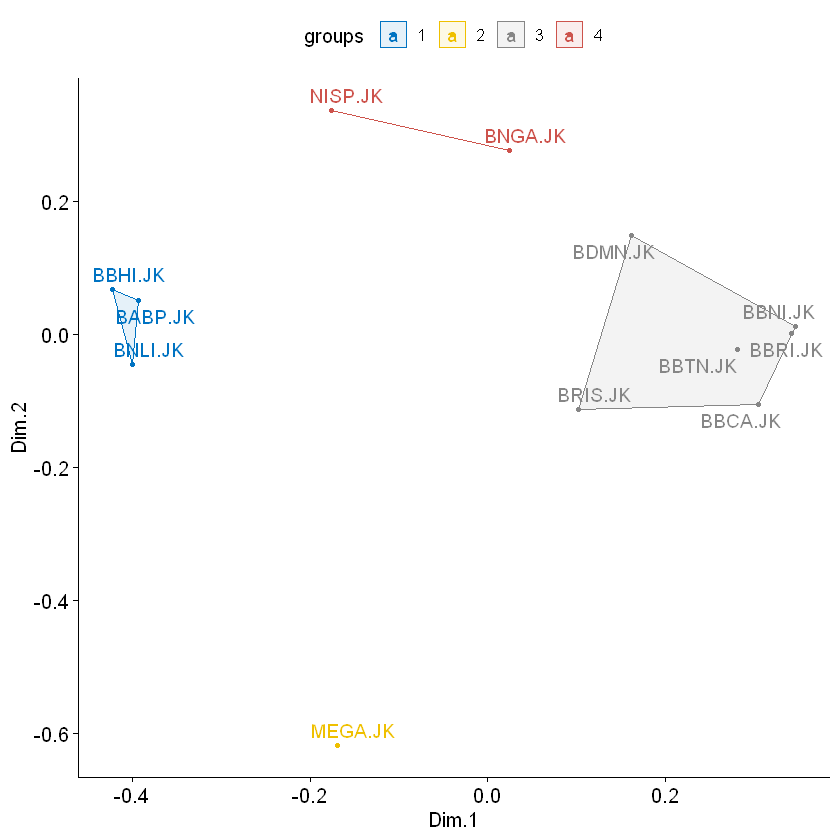

In [36]:
# K-means clustering
cordata<-cor(ts_returns)
mds.cor <- (1 - cordata) %>% cmdscale() %>% as_tibble();colnames(mds.cor) <- c("Dim.1", "Dim.2")
clust <- kmeans(mds.cor, 4)$cluster %>%
  as.factor()
mds.cor <- mds.cor %>%
  mutate(groups = clust)
# Plot and color by groups
ggscatter(mds.cor, x = "Dim.1", y = "Dim.2", 
          label = rownames(cordata), color = "groups",
          palette = "jco", size = 1, ellipse = TRUE, ellipse.type = "convex",
          repel = TRUE)

# 5. Asset Characteristics by Distribution

###  5.1 Investigating Monthly Density 

In [37]:
ts_retDens<- ts_returns
ts_retDens$years <- factor(format(time(ts_returns), "%Y"), levels=c('2021', '2022', '2023'))
ts_retDens$months <- factor(format(time(ts_returns), "%B"), levels=month.name[rev(1:12)])
ts_retDens$days <- factor(format(time(ts_returns), "%A"),levels=c('Monday','Tuesday',
                                                                 'Wednesday','Thursday',
                                                                 'Friday'))

Picking joint bandwidth of 0.759

Picking joint bandwidth of 0.703

Picking joint bandwidth of 0.472



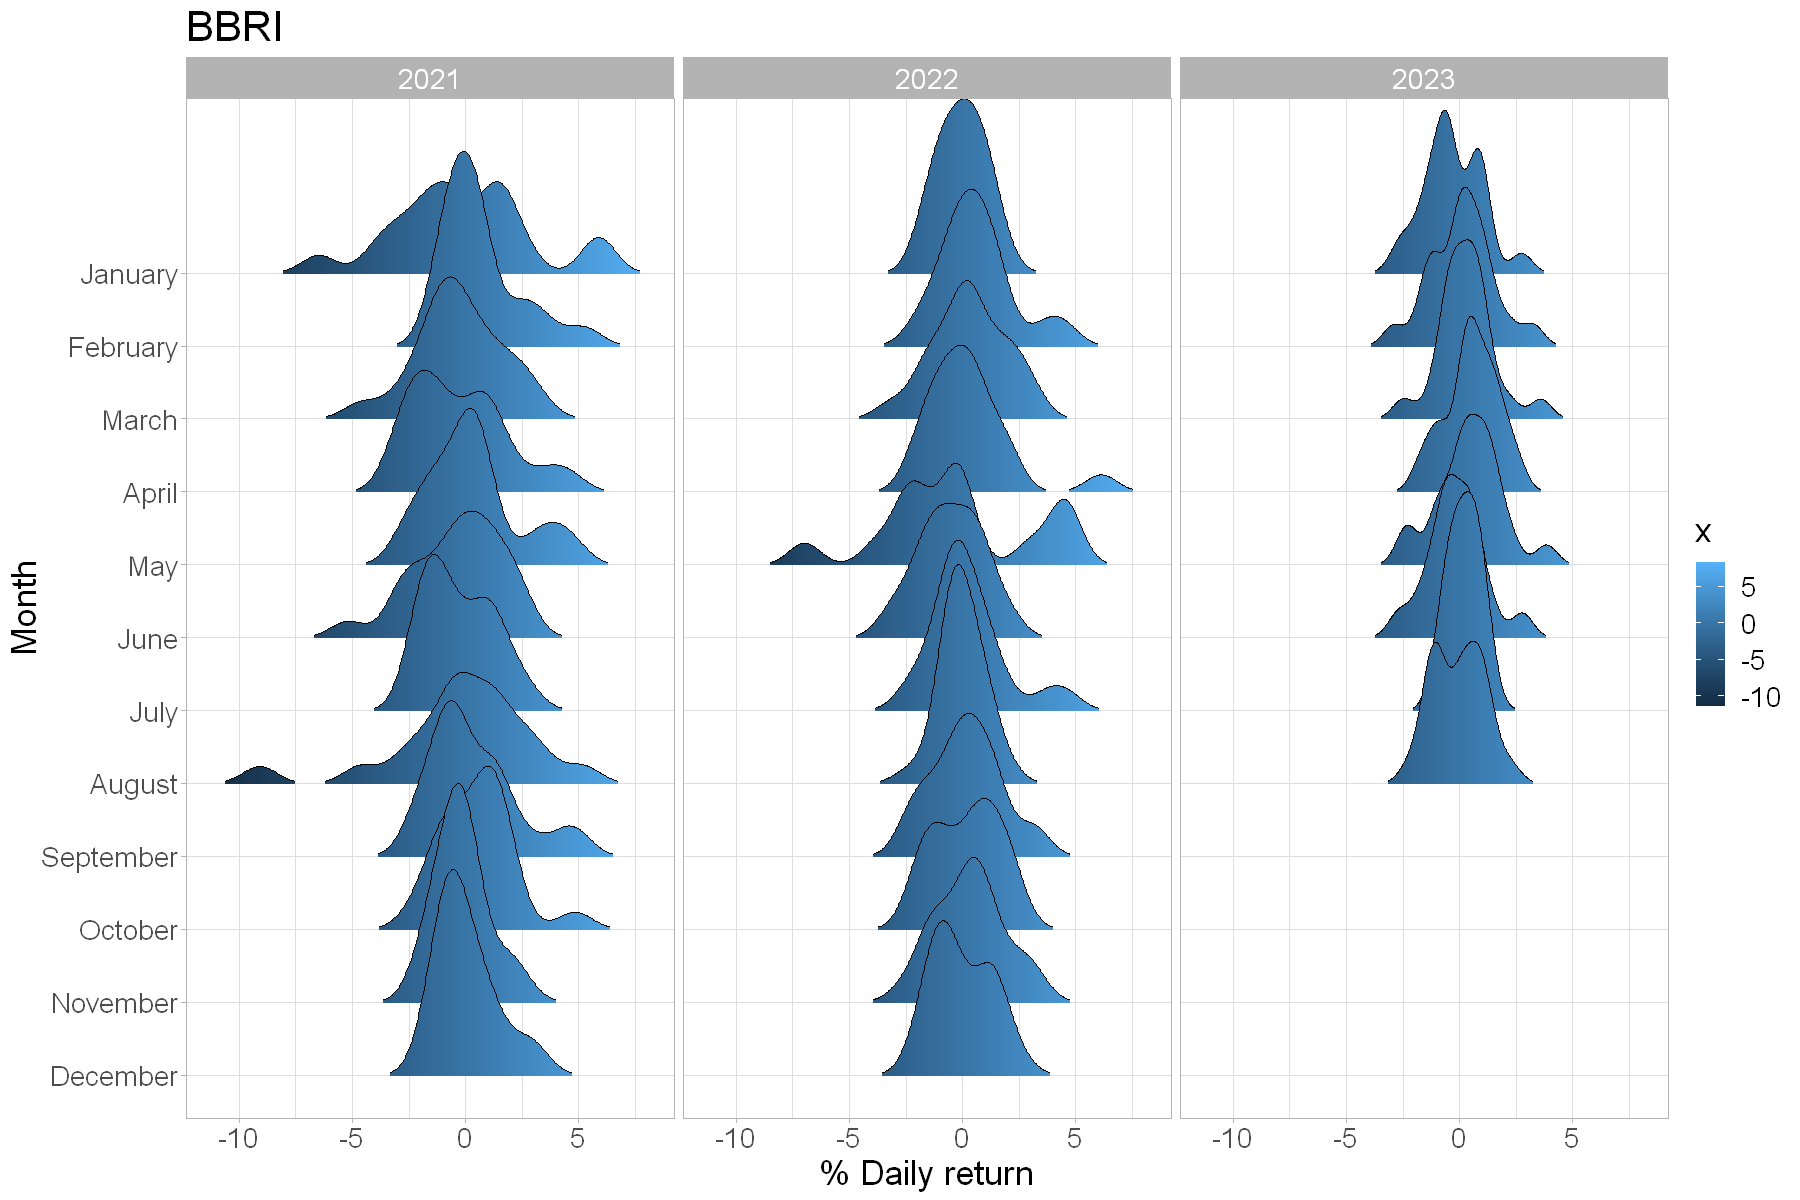

In [38]:
options(repr.plot.width=15, repr.plot.height=10)
df <- data.frame(ts_retDens)
df%>% 
ggplot( aes(x = BBRI.JK, y = months, fill = after_stat(x))) +
geom_density_ridges_gradient(scale = 3, size = 0.3, rel_min_height = 0.01) +
theme_minimal() + facet_grid(. ~ years) + theme(legend.position = "none") +
labs( x='% Daily return', y='Month', title='BBRI') + theme_light() + theme(text=element_text(size=21))


### 5.2 GED (Generalized Error Distribution)

In [39]:
dged <- function(x, mean = 0, sd = 1, nu = 1) {
    z = (x - mean)/sd
    lambda = sqrt(2^(-2/nu) * gamma(1/nu)/gamma(3/nu))
    g = nu/(lambda * (2^(1 + 1/nu)) * gamma(1/nu))
    density = g * exp(-0.5 * (abs(z/lambda))^nu)/sd
    density
}

gedFit <- function(x, ...) {
    start = c(mean = mean(x), sd = sqrt(var(x)), nu = 0.8)
    loglik = function(x, y = x) {
        f = -sum(log(dged(y, x[1], x[2], x[3])))
        f}
    fit = nlminb(start = start, objective = loglik, 
                 lower = c(-Inf,0, 0), 
                 upper = c(Inf, Inf, Inf), 
                 y = x, ...)
    names(fit$par) = c("mean", "sd", "nu")
    fit
}

- For ν = 2, it reduces to the normal distribution
- As ν decreases, the distribution becomes more leptokurtic (heavy-tailed)
- As ν increases, the distribution becomes more platykurtic (light-tailed)

In [40]:
param = NULL
for (i in 1:12) param = rbind(param, gedFit(ts_returns[, i])$par)
rownames(param) = colnames(ts_returns)
param

Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"
Warning message in nlminb(start = start, objective = loglik, lower = c(-Inf, 0, :
"NA/NaN function evaluation"


mean          sd       nu       
BBHI.JK  1.284377e-13 6.910034 0.5535969
BABP.JK -3.996689e-13 5.404778 0.4780150
MEGA.JK -1.309834e-14 3.070285 0.4293188
BRIS.JK -5.041754e-09 3.221054 0.6615490
BNLI.JK  1.177579e-14 2.188623 0.5318095
BBTN.JK  3.307856e-06 2.035973 0.8876962
BBRI.JK  1.419943e-03 1.669976 1.2365761
BBCA.JK  4.752782e-12 1.383207 1.1256942
BBNI.JK -2.566067e-09 1.787401 1.0376166
BDMN.JK -1.975104e-16 4.110325 0.2689086
NISP.JK -1.953767e-14 1.441056 0.4501909
BNGA.JK  1.445739e-14 1.791462 0.6227221

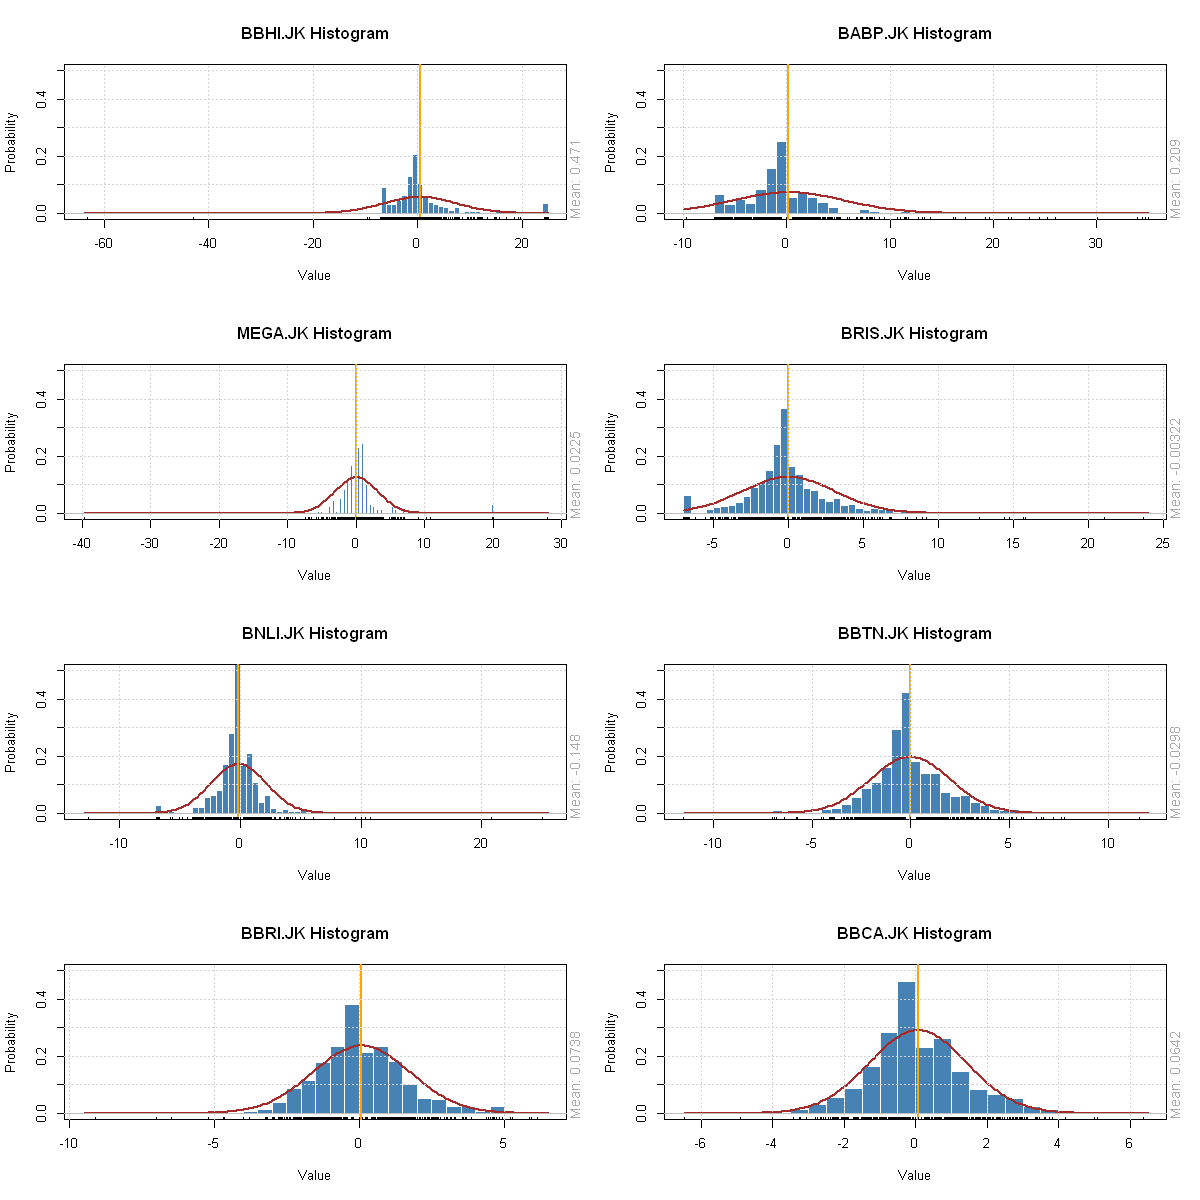

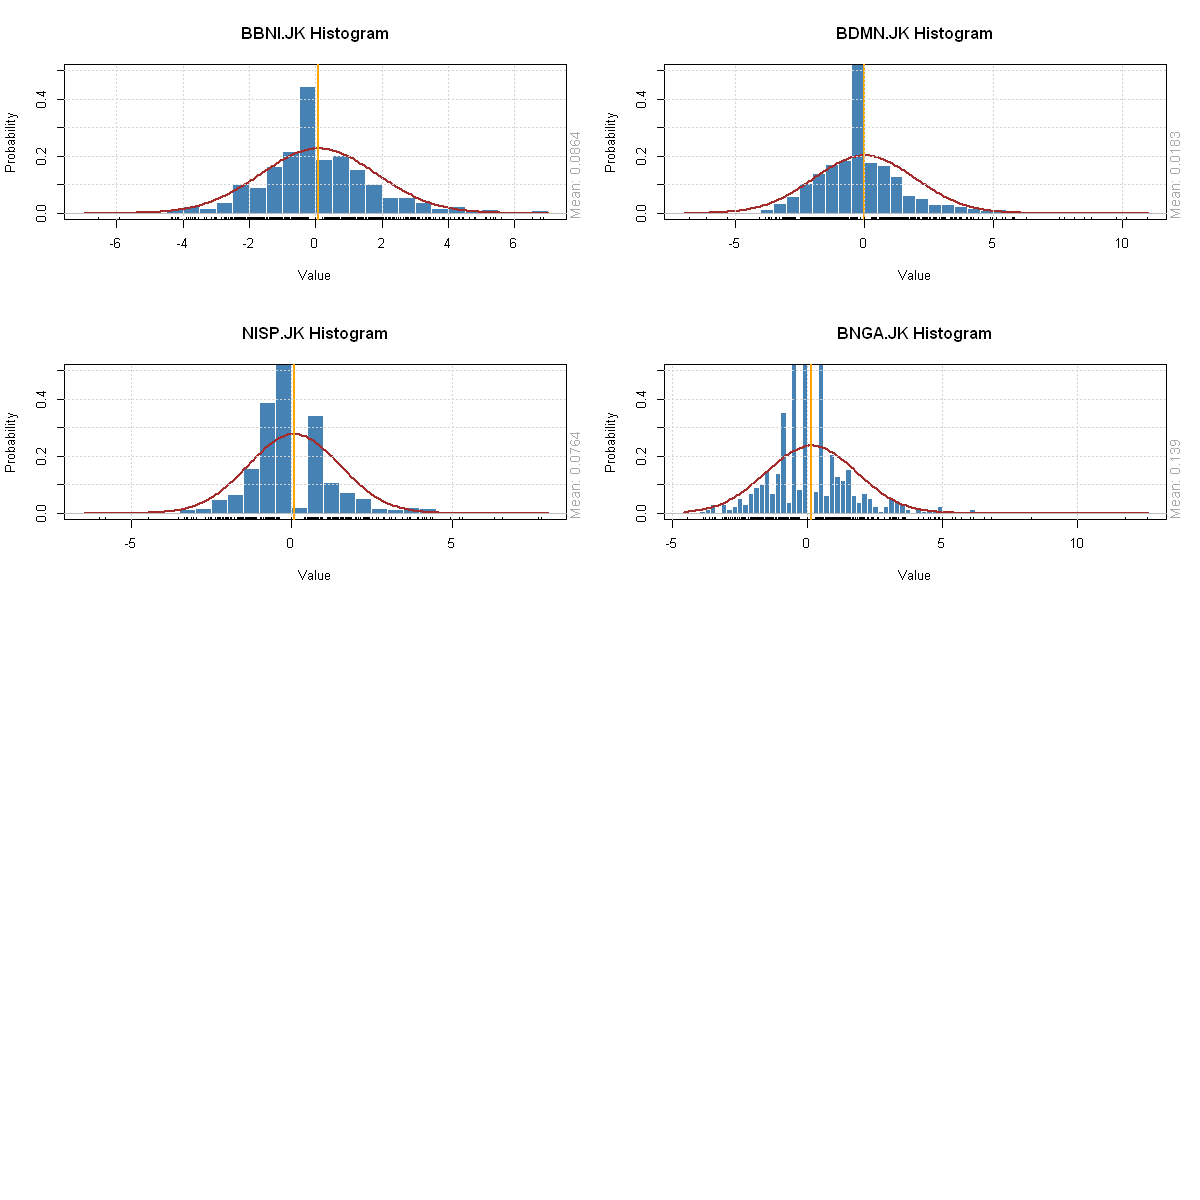

In [41]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(4, 2))
main = colnames(ts_returns)
for (i in 1:12) {
    u = histPlot(ts_returns[, i], main = main[i], col = "steelblue",
                 border = "white", xlab = "Returns", ylim = c(0, 0.5))
    v = dged(u, mean = param[i, 1], sd = param[i, 2], nu = param[i,3])
    lines(u, v, col = "darkgreen", lwd = 2)
}

### 5.3  Five Percent Quantile

In [42]:
quantile_05 <- function (x) {quantile(x, probs = 0.05)}

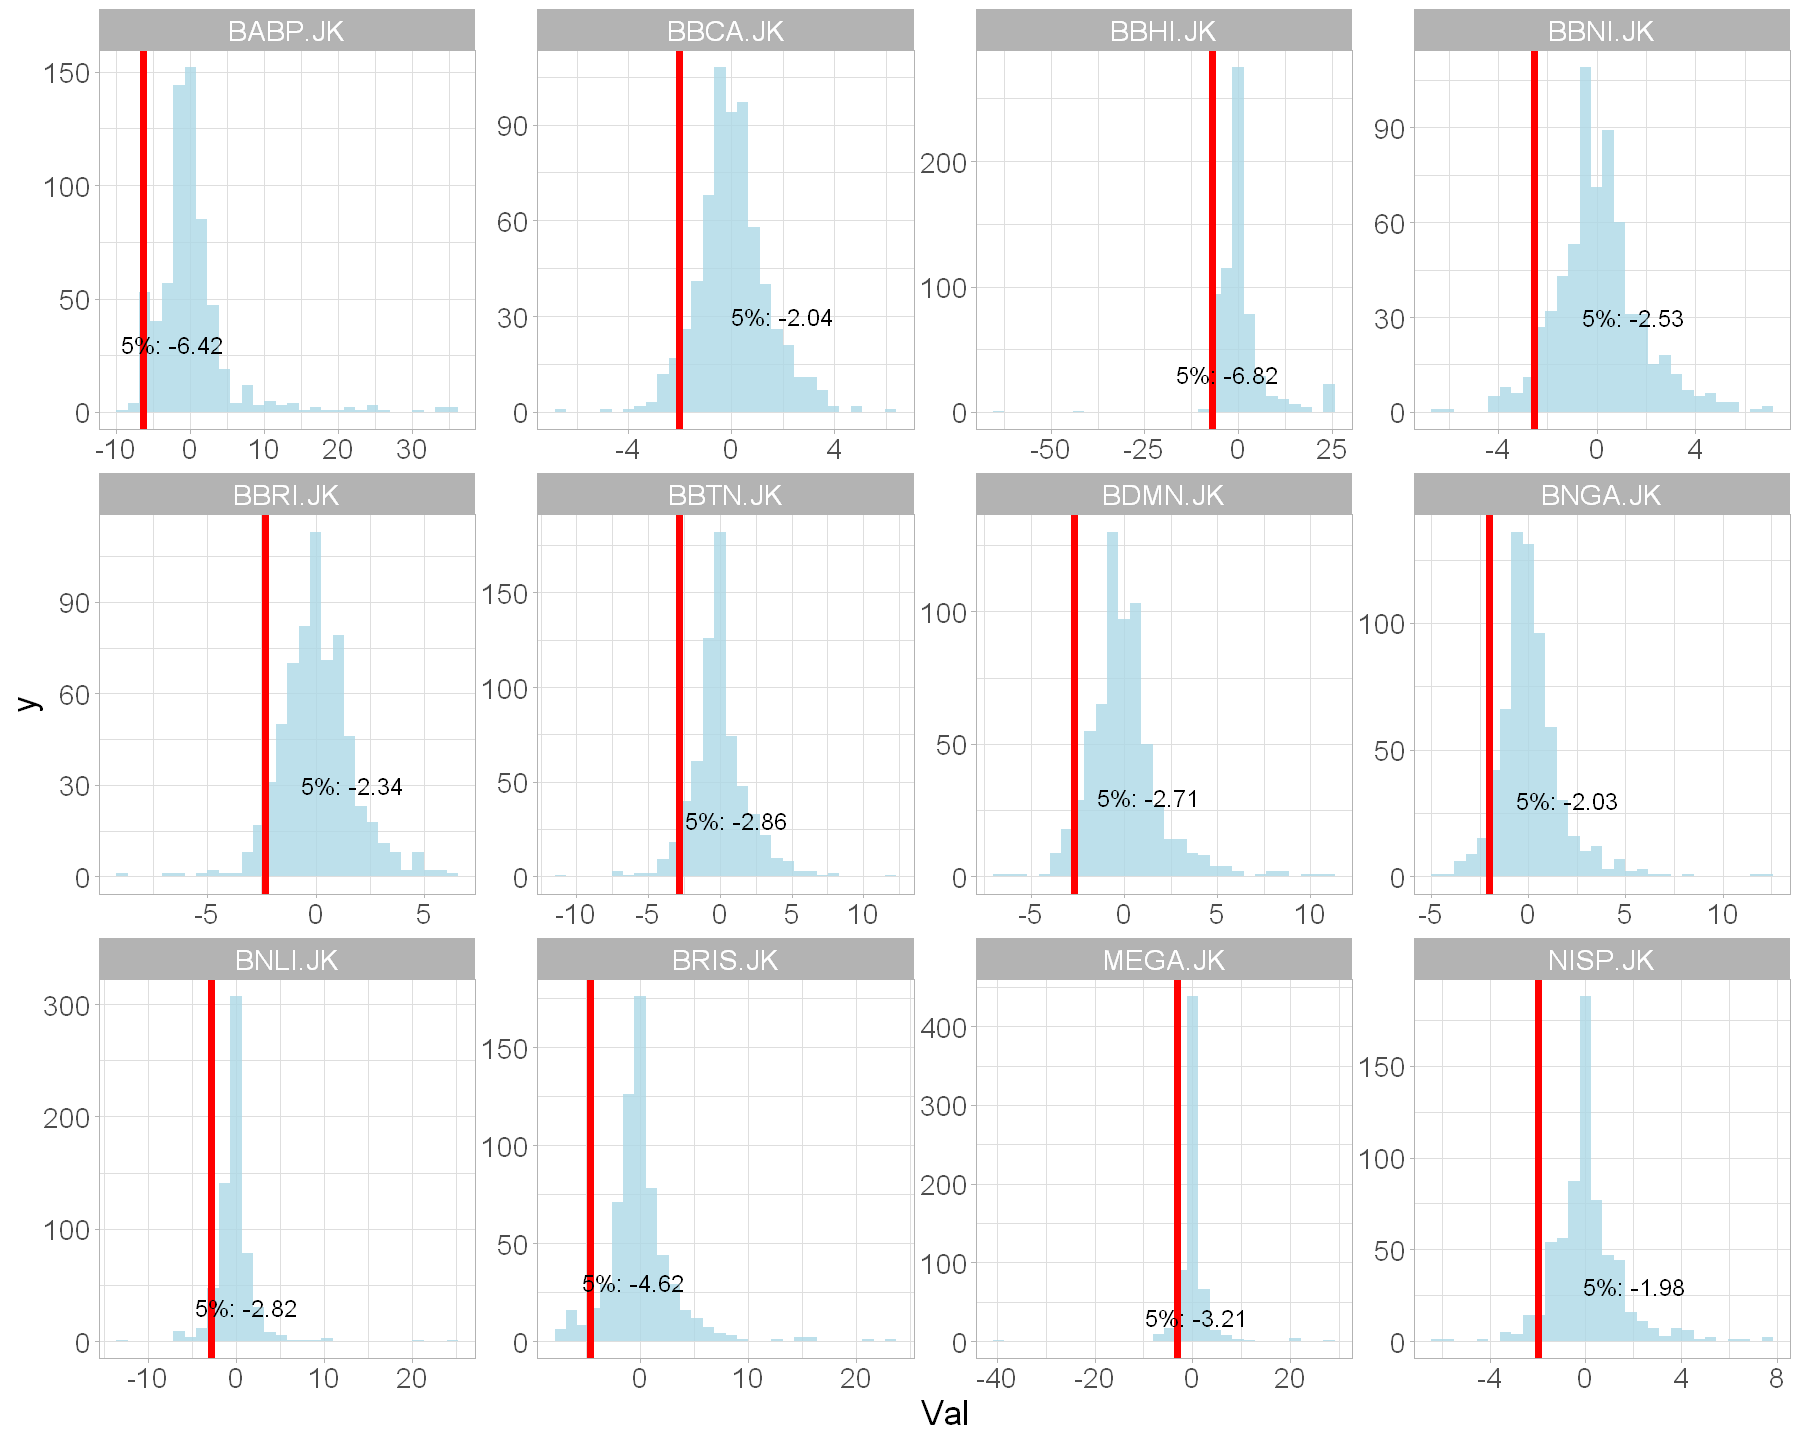

In [43]:
options(repr.plot.width=15, repr.plot.height=12)
ts_returns %>% data.frame() %>% gather('Vars', 'Val') %>% ggplot(aes(x=Val)) + theme_light()+theme(text=element_text(size=21))+
geom_histogram(bins=30, fill='lightblue', alpha=0.8) + stat_summaryh(fun.x=quantile_05, geom="vline", aes(xintercept=after_stat(x), y=10), col='red', lwd=2) +
    stat_summaryh(fun.x=quantile_05, geom="text", aes( label=paste0("5%: ",round(after_stat(x),2)), y=30), size=5, angle=0, position=position_nudge(x=4))+
facet_wrap(~Vars, scale='free')

# 6. Volume 

## 6.1 Log Volume Visualized

In [337]:
tickers <- c('BBCA.JK','BBRI.JK', 'BRIS.JK', 'MEGA.JK', 'BBTN.JK', 'BBHI.JK',
             'BABP.JK', 'BBNI.JK', 'NISP.JK', 'BDMN.JK', 'BNGA.JK', 'BNLI.JK')
portfolioVolume <- NULL
for(ticker in tickers){
    portfolioVolume <- cbind(portfolioVolume,getSymbols.yahoo(ticker, from='2021-01-01',
                                            periodicity='daily', auto.assign=FALSE)[,5])
}

In [338]:
summary(portfolioVolume)

     Index            BBCA.JK.Volume      BBRI.JK.Volume     
 Min.   :2021-01-04   Min.   : 10653900   Min.   : 27676500  
 1st Qu.:2021-09-02   1st Qu.: 57859350   1st Qu.: 96377650  
 Median :2022-04-27   Median : 74775000   Median :133511700  
 Mean   :2022-04-30   Mean   : 86101659   Mean   :153825887  
 3rd Qu.:2022-12-24   3rd Qu.:102173550   3rd Qu.:183062150  
 Max.   :2023-09-04   Max.   :722827900   Max.   :898453700  
 BRIS.JK.Volume      MEGA.JK.Volume    BBTN.JK.Volume      BBHI.JK.Volume    
 Min.   :  2243800   Min.   :      0   Min.   :  3908300   Min.   :       0  
 1st Qu.: 11169950   1st Qu.:   6400   1st Qu.: 14978350   1st Qu.: 1352900  
 Median : 22280500   Median :  15400   Median : 24053900   Median : 3219400  
 Mean   : 44945098   Mean   :  41861   Mean   : 32260869   Mean   : 7442122  
 3rd Qu.: 43886600   3rd Qu.:  37400   3rd Qu.: 39832900   3rd Qu.: 8272550  
 Max.   :788319700   Max.   :1148936   Max.   :211664700   Max.   :95732200  
 BABP.JK.Volume     

In [413]:
# Sorted by mean average
round(sort(sapply(data.frame(portfolioVolume), function(x) mean(x))),2)

MEGA.JK.Volume BNLI.JK.Volume BDMN.JK.Volume NISP.JK.Volume BBHI.JK.Volume 
      41860.62      444960.14     3849532.26     5416543.32     7442122.05 
BNGA.JK.Volume BBNI.JK.Volume BBTN.JK.Volume BRIS.JK.Volume BBCA.JK.Volume 
    8371018.59    31277818.89    32260868.87    44945098.16    86101658.68 
BBRI.JK.Volume BABP.JK.Volume 
  153825887.14   198465537.02

In [339]:
df_stat <- data.frame(t(round(basicStats(portfolioVolume),2)))
reactable(df_stat, pagination = FALSE,static = getOption("reactable.static", TRUE),
          defaultColDef = colDef(cell = data_bars(df_stat, fill_color = c("lightblue","royalblue","navy"))))

HTML widgets cannot be represented in plain text (need html)

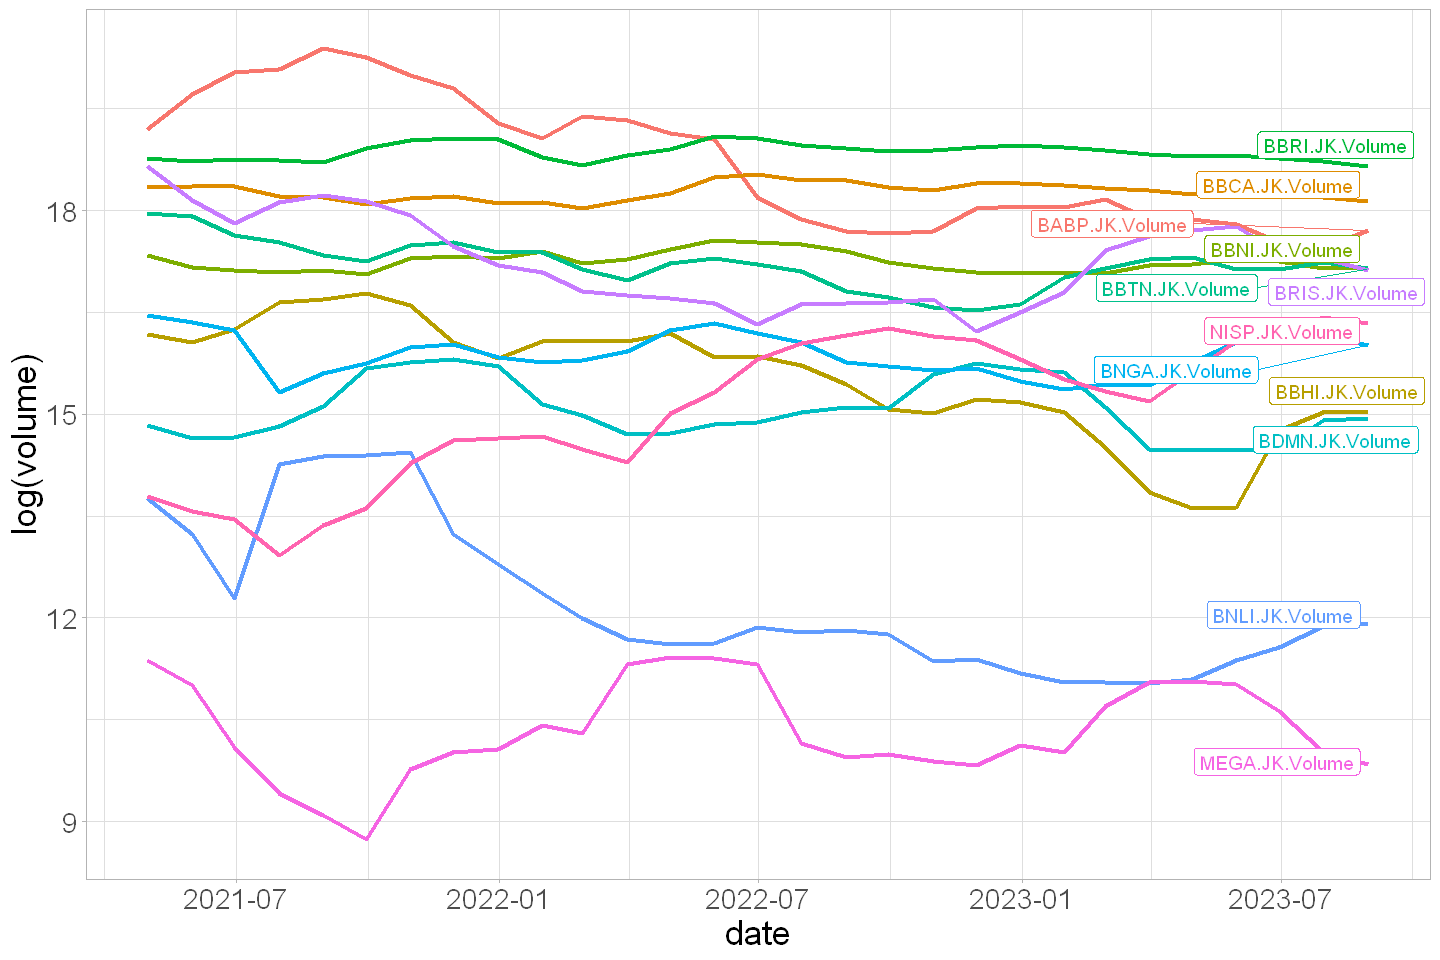

In [348]:
rollapply(as.timeSeries(portfolioVolume), by, FUN = "colMeans") %>% log()  %>% data.frame()  %>% mutate(date=as.Date(rownames(.))) %>% gather('Vars', 'Val', -date) %>% 
mutate(label = if_else(date == max(date), as.character(Vars), NA_character_)) %>%
ggplot(aes(date, Val, colour=Vars)) + geom_line(aes(group=Vars, color=Vars), lwd=1.4) + theme_light() + theme(text=element_text(size=21))+
labs(y='log(volume)')  + theme(legend.position = "none") +
geom_label_repel(aes(label = label),nudge_x = 1,na.rm = TRUE, size=4)

## 6.2 Volume Clustering

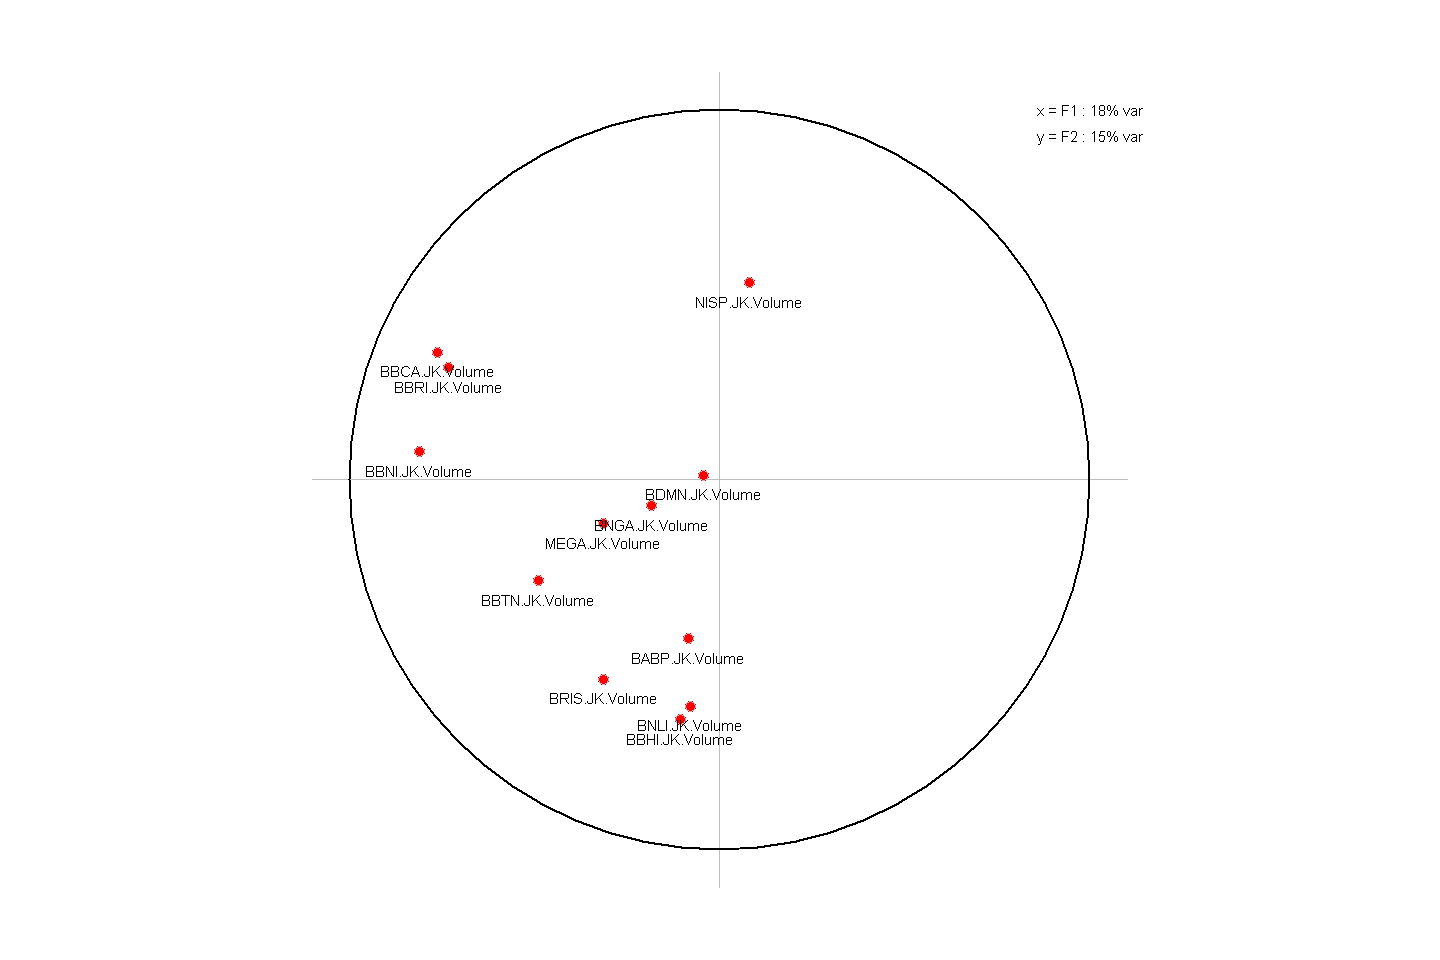

In [354]:
mdspca(data.frame(portfolioVolume))

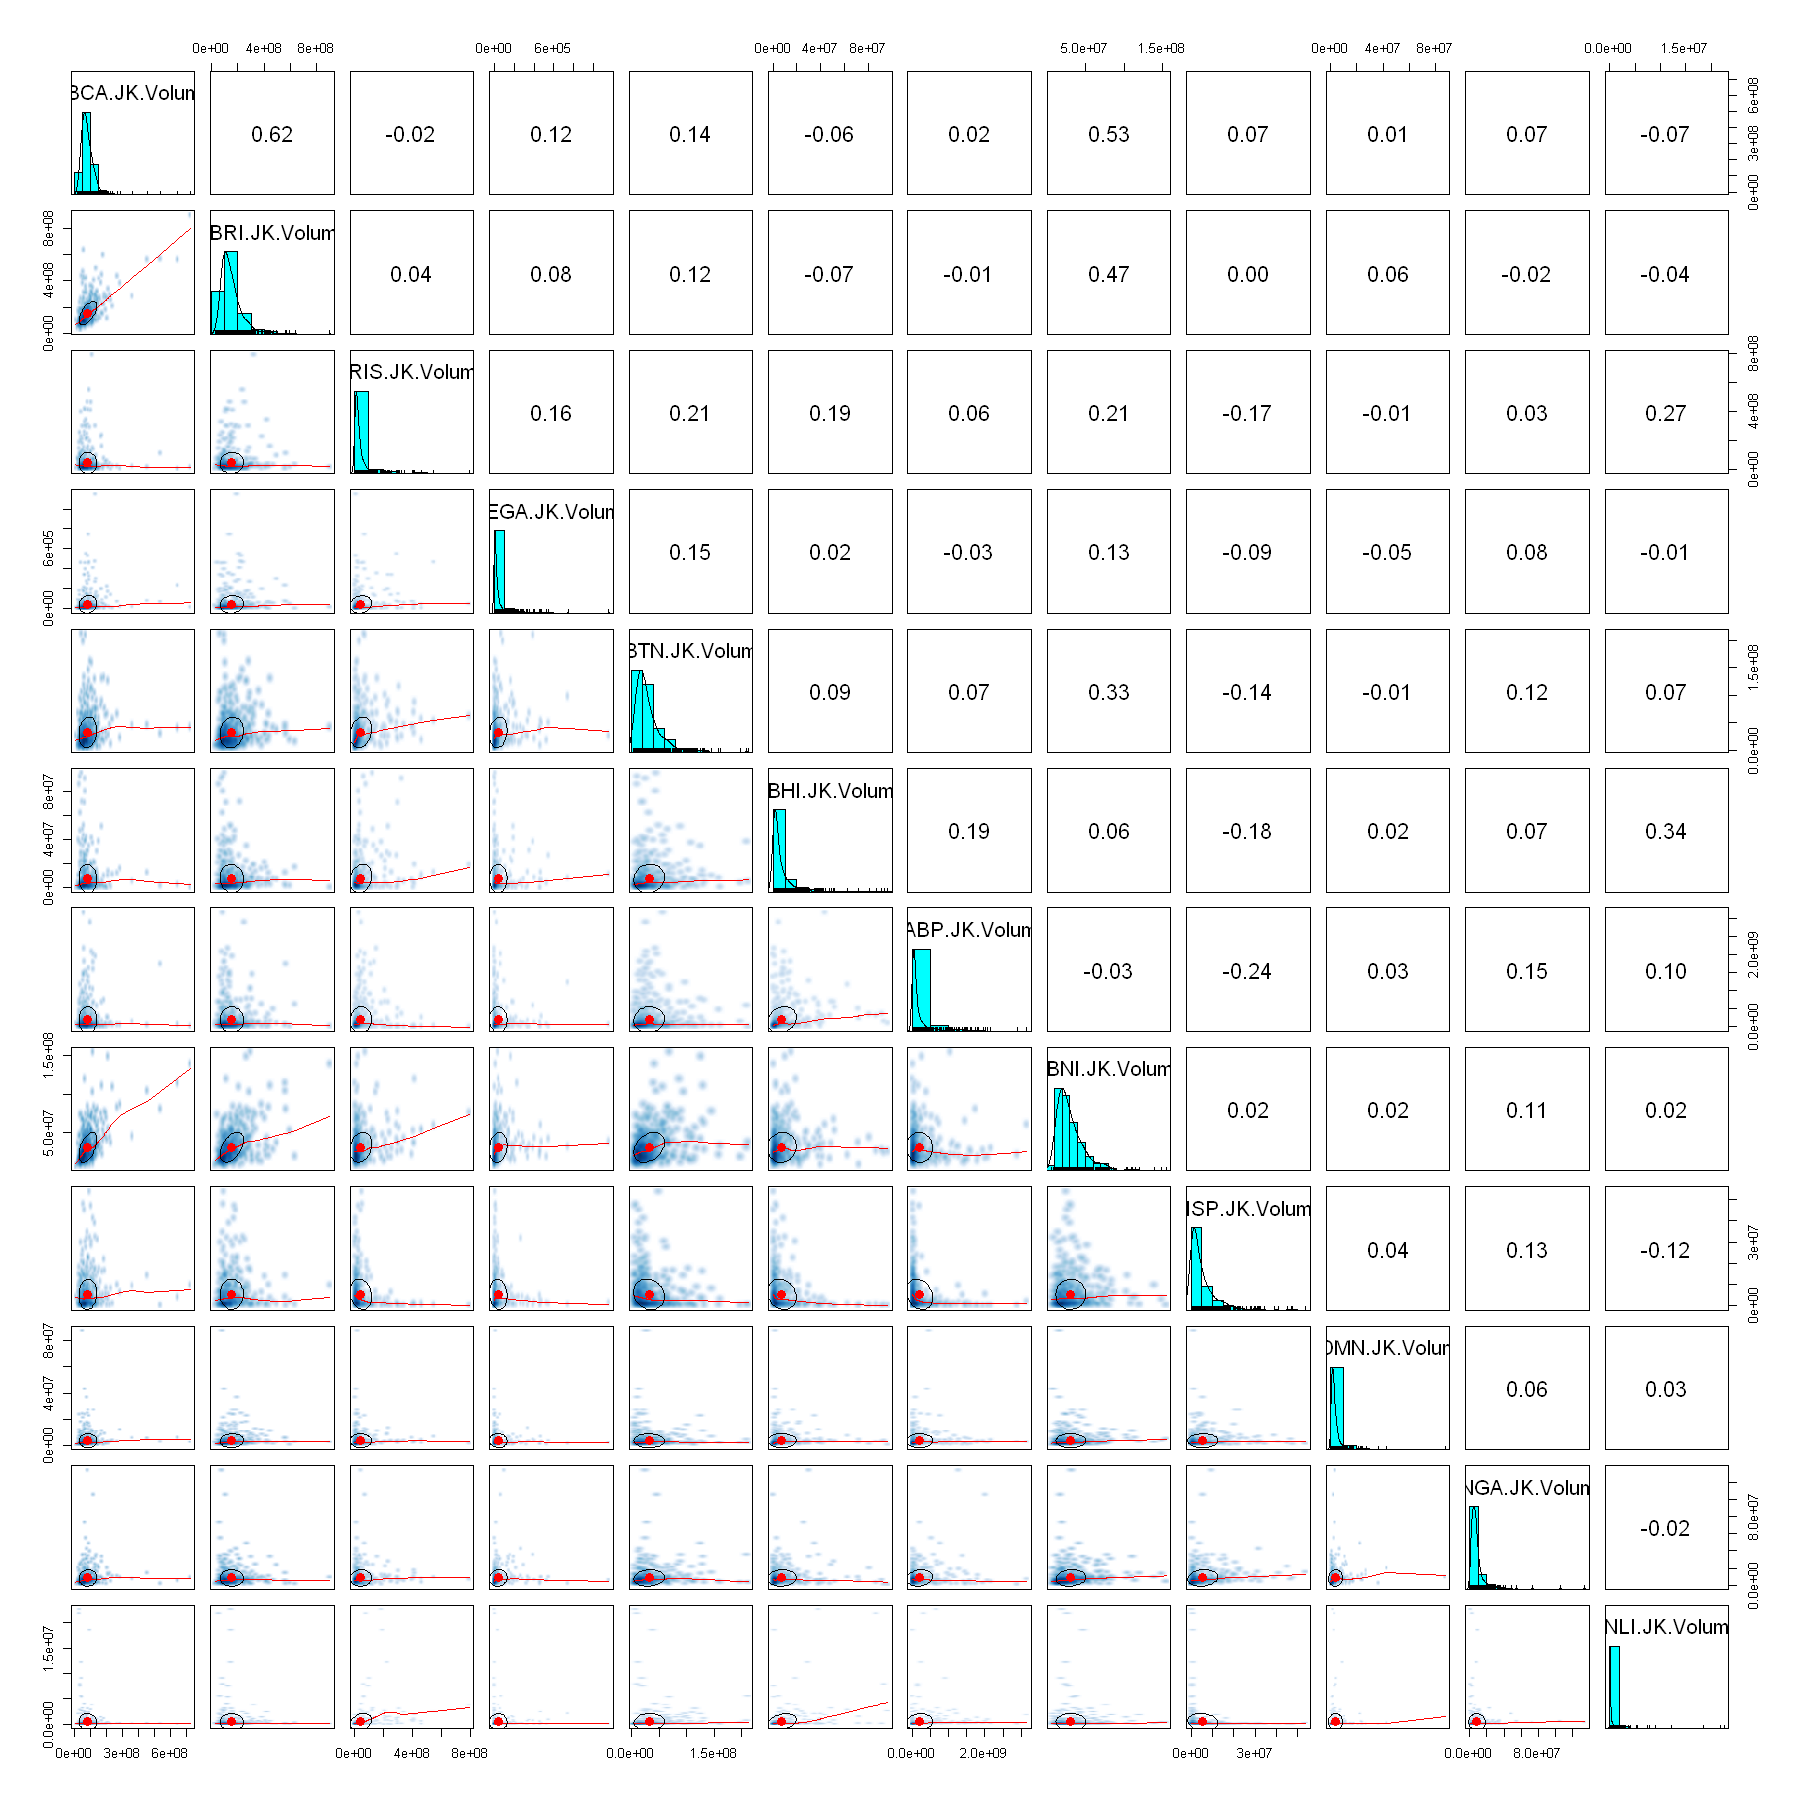

In [356]:
options(repr.plot.width=15, repr.plot.height=15)
pairs.panels(data.frame(portfolioVolume),cex.labels=1.6, cex.cor=2, smoother = T )

## 6.3 Volume Persistence

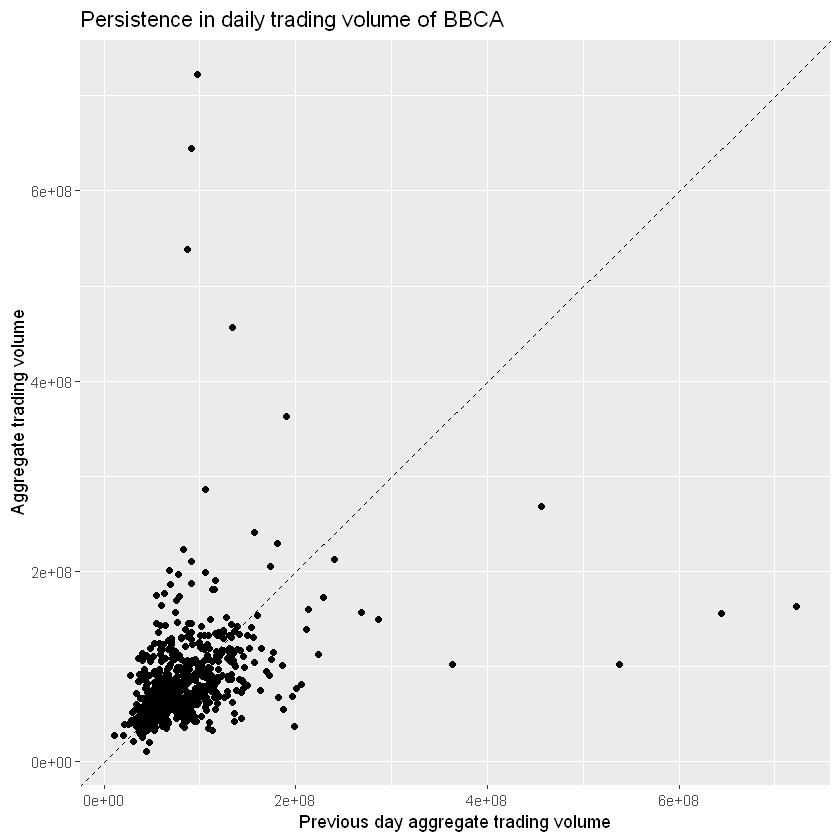

In [394]:
options(repr.plot.width=7, repr.plot.height=7)
na.omit(cbind(portfolioVolume[,1], lag(portfolioVolume[,1])))  %>% 
ggplot(aes(x = lag(BBCA.JK.Volume.1), y = BBCA.JK.Volume)) + geom_point() +
geom_abline(aes(intercept = 0, slope = 1),linetype = "dashed") +labs(
    x = "Previous day aggregate trading volume",
    y = "Aggregate trading volume",
    title = "Persistence in daily trading volume of BBCA")

# 7. Multivariate Outliers Detection

In [17]:
ans.cov <- assetsMeanCov(ts_returns, method = "cov")
ans.cov

$center
     BBHI.JK      BABP.JK      MEGA.JK      BRIS.JK      BNLI.JK      BBTN.JK 
 0.471043788  0.208660313  0.022526787 -0.003215269 -0.147757396 -0.029801197 
     BBRI.JK      BBCA.JK      BBNI.JK      BDMN.JK      NISP.JK      BNGA.JK 
 0.073761264  0.064174066  0.086436665  0.018264413  0.076432210  0.139024645 

$cov
           BBHI.JK    BABP.JK     MEGA.JK   BRIS.JK    BNLI.JK   BBTN.JK
BBHI.JK 48.2832932  7.0473547  0.11092450 1.1859674 2.81850781 0.4579016
BABP.JK  7.0473547 29.6566044  0.40190596 0.9279357 1.01882671 0.8650972
MEGA.JK  0.1109245  0.4019060  9.85102289 0.9273153 0.07846761 0.4329406
BRIS.JK  1.1859674  0.9279357  0.92731528 9.8023643 0.28588058 1.7699593
BNLI.JK  2.8185078  1.0188267  0.07846761 0.2858806 5.32453973 0.2961729
BBTN.JK  0.4579016  0.8650972  0.43294065 1.7699593 0.29617294 4.0559021
BBRI.JK  0.7437143  0.3999496  0.15094471 1.5838697 0.05455549 1.3514323
BBCA.JK  0.3154730  0.1684252  0.37251747 0.5563025 0.14641088 0.8628708
BBNI.JK  1.3179808  0.4429187  0.14835997 1.2284481 0.14743737 1.7174958
BDMN.JK  0.3025391  0.8644059  0.11322307 1.0779016 0.29960372 1.2036966
NISP.JK  1.0307097  0.8697624 -0.14503472 0.4535622 0.25848292 0.3407050
BNGA.JK  1.6705865  1.0196629  0.02889961 1.0351202 0.21716956 0.8709509
           BBRI.JK   BBCA.JK   BBNI.JK   BDMN.JK    NISP.JK    BNGA.JK
BBHI.JK 0.74371431 0.3154730 1.3179808 0.3025391  1.0307097 1.67058648
BABP.JK 0.39994956 0.1684252 0.4429187 0.8644059  0.8697624 1.01966286
MEGA.JK 0.15094471 0.3725175 0.1483600 0.1132231 -0.1450347 0.02889961
BRIS.JK 1.58386974 0.5563025 1.2284481 1.0779016  0.4535622 1.03512023
BNLI.JK 0.05455549 0.1464109 0.1474374 0.2996037  0.2584829 0.21716956
BBTN.JK 1.35143232 0.8628708 1.7174958 1.2036966  0.3407050 0.87095087
BBRI.JK 2.82672882 0.9956857 1.5546836 0.8417400  0.3056486 0.68214685
BBCA.JK 0.99568571 1.8846362 1.2138587 0.6208545  0.1637082 0.42861468
BBNI.JK 1.55468357 1.2138587 3.0943491 1.0896177  0.2555189 0.74669463
BDMN.JK 0.84173998 0.6208545 1.0896177 3.8934082  0.4549546 1.03403834
NISP.JK 0.30564864 0.1637082 0.2555189 0.4549546  2.0649555 0.67307874
BNGA.JK 0.68214685 0.4286147 0.7466946 1.0340383  0.6730787 2.83420592

$mu
     BBHI.JK      BABP.JK      MEGA.JK      BRIS.JK      BNLI.JK      BBTN.JK 
 0.471043788  0.208660313  0.022526787 -0.003215269 -0.147757396 -0.029801197 
     BBRI.JK      BBCA.JK      BBNI.JK      BDMN.JK      NISP.JK      BNGA.JK 
 0.073761264  0.064174066  0.086436665  0.018264413  0.076432210  0.139024645 

$Sigma
           BBHI.JK    BABP.JK     MEGA.JK   BRIS.JK    BNLI.JK   BBTN.JK
BBHI.JK 48.2832932  7.0473547  0.11092450 1.1859674 2.81850781 0.4579016
BABP.JK  7.0473547 29.6566044  0.40190596 0.9279357 1.01882671 0.8650972
MEGA.JK  0.1109245  0.4019060  9.85102289 0.9273153 0.07846761 0.4329406
BRIS.JK  1.1859674  0.9279357  0.92731528 9.8023643 0.28588058 1.7699593
BNLI.JK  2.8185078  1.0188267  0.07846761 0.2858806 5.32453973 0.2961729
BBTN.JK  0.4579016  0.8650972  0.43294065 1.7699593 0.29617294 4.0559021
BBRI.JK  0.7437143  0.3999496  0.15094471 1.5838697 0.05455549 1.3514323
BBCA.JK  0.3154730  0.1684252  0.37251747 0.5563025 0.14641088 0.8628708
BBNI.JK  1.3179808  0.4429187  0.14835997 1.2284481 0.14743737 1.7174958
BDMN.JK  0.3025391  0.8644059  0.11322307 1.0779016 0.29960372 1.2036966
NISP.JK  1.0307097  0.8697624 -0.14503472 0.4535622 0.25848292 0.3407050
BNGA.JK  1.6705865  1.0196629  0.02889961 1.0351202 0.21716956 0.8709509
           BBRI.JK   BBCA.JK   BBNI.JK   BDMN.JK    NISP.JK    BNGA.JK
BBHI.JK 0.74371431 0.3154730 1.3179808 0.3025391  1.0307097 1.67058648
BABP.JK 0.39994956 0.1684252 0.4429187 0.8644059  0.8697624 1.01966286
MEGA.JK 0.15094471 0.3725175 0.1483600 0.1132231 -0.1450347 0.02889961
BRIS.JK 1.58386974 0.5563025 1.2284481 1.0779016  0.4535622 1.03512023
BNLI.JK 0.05455549 0.1464109 0.1474374 0.2996037  0.2584829 0.21716956
BBTN.JK 1.35143232 0.8628708 1.7174958 1.2036966  0.3407050 0.87095087
BBRI.JK 2.82672882 0.99

In [18]:
outliers <- assetsOutliers(ts_returns, ans.cov$center, ans.cov$cov)
outliers$outliers

2021-01-08 2021-01-11 2021-01-12 2021-01-18 2021-01-20 2021-01-26 2021-01-27 
         4          5          6         10         12         16         17 
2021-01-28 2021-01-29 2021-02-01 2021-02-03 2021-02-17 2021-02-18 2021-02-24 
        18         19         20         22         31         32         36 
2021-02-25 2021-03-03 2021-03-04 2021-04-07 2021-04-08 2021-05-21 2021-05-27 
        37         41         42         64         65         93         96 
2021-06-03 2021-06-07 2021-06-25 2021-06-28 2021-07-02 2021-07-05 2021-07-06 
       100        102        116        117        121        122        123 
2021-07-07 2021-07-09 2021-07-12 2021-07-19 2021-08-02 2021-08-05 2021-08-25 
       124        126        127        132        141        144        156 
2021-09-01 2021-09-08 2021-10-18 2021-12-28 2022-01-28 2022-03-01 2022-03-10 
       161        166        194        244        266        286        292 
2022-04-20 2022-04-21 2022-05-09 2022-06-13 2022-07-12 2022-08-02 2022-10-10 
       320        321        327        349        370        385        433 
2022-10-19 2022-10-21 2022-10-24 2022-11-09 2022-12-14 2022-12-23 2023-02-15 
       440        442        443        455        480        487        524 
2023-04-18 2023-05-12 2023-06-06 
       565        577        591

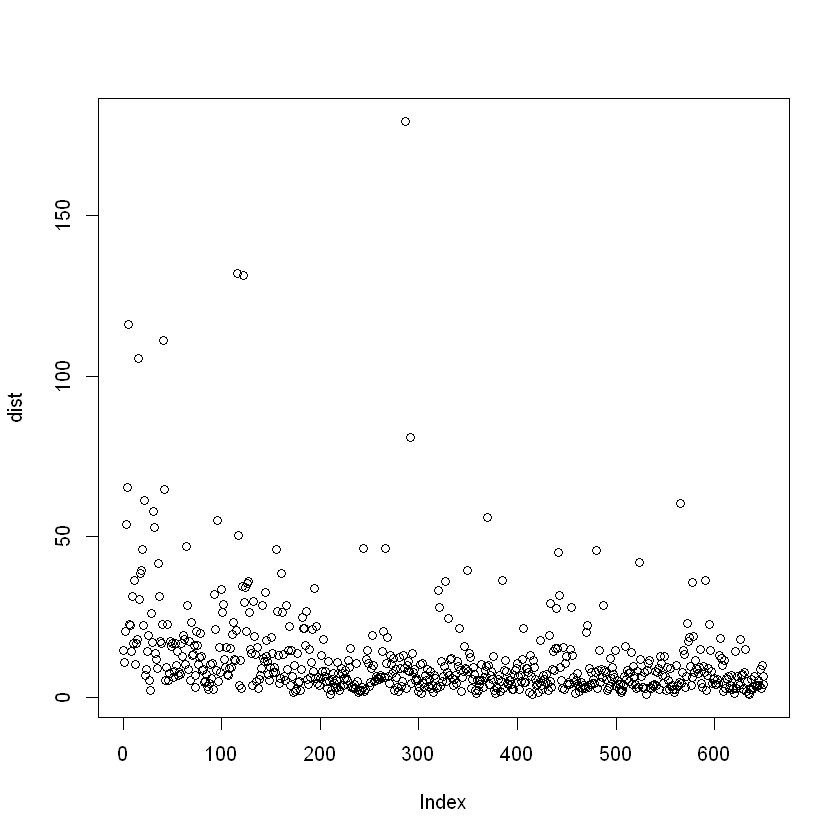

In [19]:
options(repr.plot.width=7, repr.plot.height=7)
dist <- mahalanobis(ts_returns, center = ans.cov$center, cov=ans.cov$cov)
plot(dist)

# 8. Portfolio Optimization

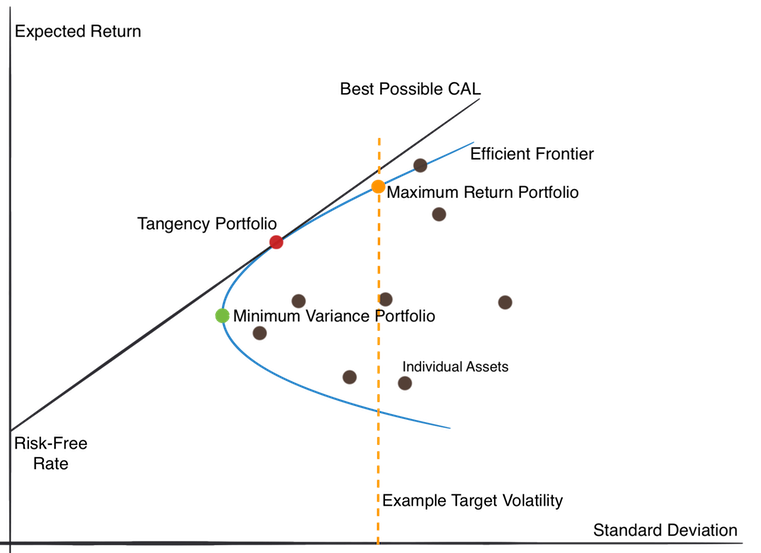
Picture: https://quantpedia.com/markowitz-model/

# 8.1 Minimum Risk Mean-Variance Portfolios

### 8.1.1  Feasible Portfolio (Equally Weighted Portfolio)

A feasible portfolio  exist given its defined characteristics. Its risk and return results would fall in the allowable zone.

In [99]:
FeasSpec <- portfolioSpec()
nAssets <- ncol(ts_returns)
setWeights(FeasSpec) <- rep(1/(nAssets), times = nAssets)

In [100]:
FeasPortfolio <- feasiblePortfolio(data = ts_returns,spec = FeasSpec,constraints = "LongOnly")
print(FeasPortfolio)


Title:
 MV Feasible Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833  0.0833 
NISP.JK BNGA.JK 
 0.0833  0.0833 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.2846  0.1904  0.0544  0.0908  0.0477  0.0620  0.0501  0.0337  0.0565  0.0514 
NISP.JK BNGA.JK 
 0.0293  0.0490 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0816 1.2621 2.5261 1.7434 

Description:
 Tue Sep  5 20:10:17 2023 by user: Kevin 


In [117]:
# Target returns
mean(colMeans(ts_returns))*100

[1] 8.162919

In [156]:
# Covariance risk
sqrt(getWeights(FeasPortfolio) %*% cov(ts_returns) %*% getWeights(FeasPortfolio))

[,1]    
[1,] 1.262125

In [158]:
# CvaR
cvarRisk(ts_returns, getWeights(FeasPortfolio), alpha = 0.05)

CVaR.5% 
-2.526061

In [172]:
#VaR
varRisk(ts_returns, getWeights(FeasPortfolio), alpha = 0.05)

VaR.5% 
-1.743397

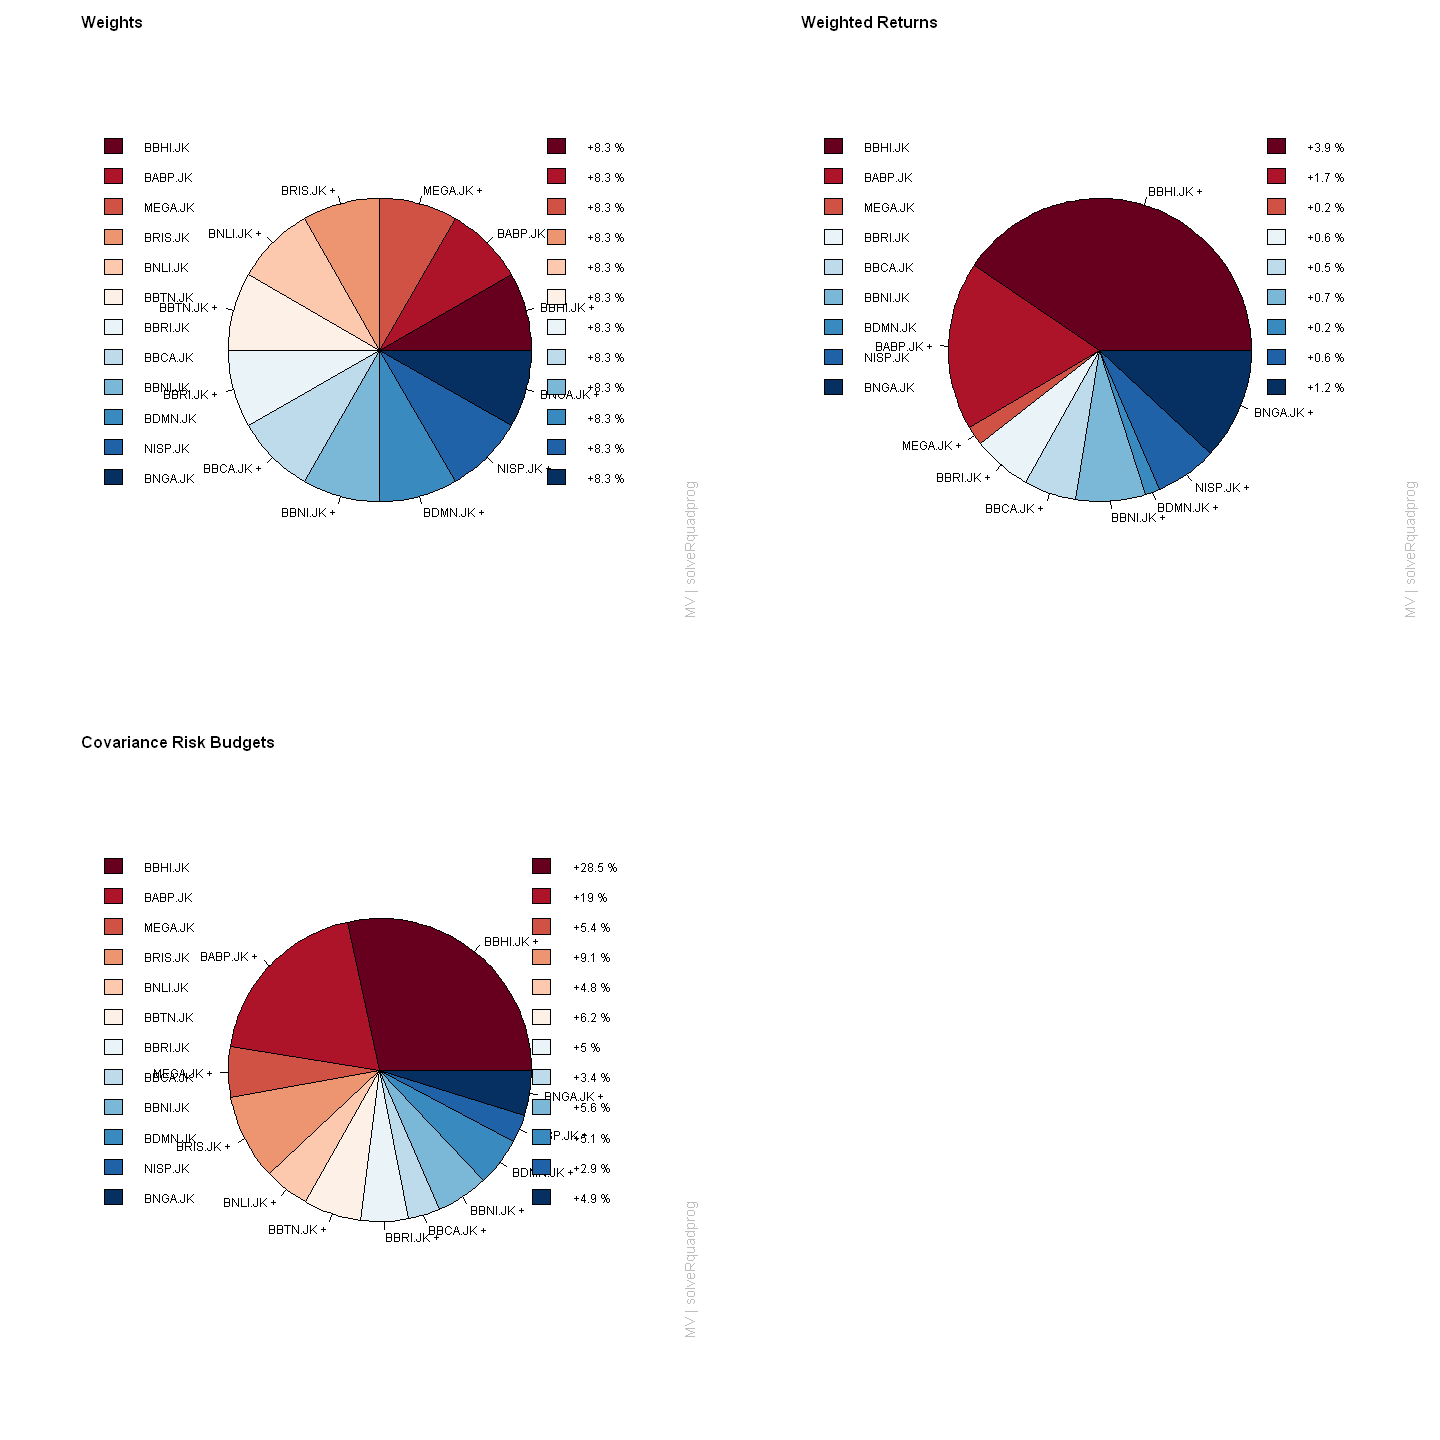

In [106]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(2,2))
col <- divPalette(ncol(ts_returns), "RdBu")
weightsPie(FeasPortfolio, radius = 0.7, col = col, box=F, legend=T)
weightedReturnsPie(FeasPortfolio, radius = 0.7, col = col, box=F, legend=T)
covRiskBudgetsPie(FeasPortfolio, radius = 0.7, col = col, box=F, legend=T)

**Cov risk (Total risk)**
$$ \sigma = \sqrt{w^T\hat{\Sigma}w}=\sum_i w_i \frac{d \sigma}{d w_i} $$
**Covariance Risk Budget (Standardized individual risk)**
$$1=\sum_i \mathscr{B}_i=\sum_i \frac{w_i}{\sigma} \frac{d \sigma}{d w_i}$$

In [149]:
getCovRiskBudgets(FeasPortfolio)

BBHI.JK    BABP.JK    MEGA.JK    BRIS.JK    BNLI.JK    BBTN.JK    BBRI.JK 
0.28460725 0.19043371 0.05436897 0.09082776 0.04771891 0.06201389 0.05009501 
   BBCA.JK    BBNI.JK    BDMN.JK    NISP.JK    BNGA.JK 
0.03369584 0.05648713 0.05142414 0.02932197 0.04900544

### 8.1.2 Minimum Risk Efficient Portfolio (Targeted Return)

In [160]:
getTargetReturn(FeasPortfolio@portfolio)["mean"]

mean 
0.08162919

In [161]:
minriskSpec <- portfolioSpec()
targetReturn <- getTargetReturn(FeasPortfolio@portfolio)["mean"]
setTargetReturn(minriskSpec) <- targetReturn

In [162]:
minriskPortfolio <- efficientPortfolio(data = ts_returns, spec = minriskSpec,constraints = "LongOnly")
print(minriskPortfolio)


Title:
 MV Efficient Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0142  0.0139  0.0638  0.0000  0.0248  0.0000  0.0864  0.2655  0.0427  0.0211 
NISP.JK BNGA.JK 
 0.2915  0.1761 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0281  0.0184  0.0544  0.0000  0.0106  0.0000  0.0847  0.2540  0.0433  0.0177 
NISP.JK BNGA.JK 
 0.2877  0.2013 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0816 0.9196 1.8771 1.3662 

Description:
 Tue Sep  5 21:03:45 2023 by user: Kevin 


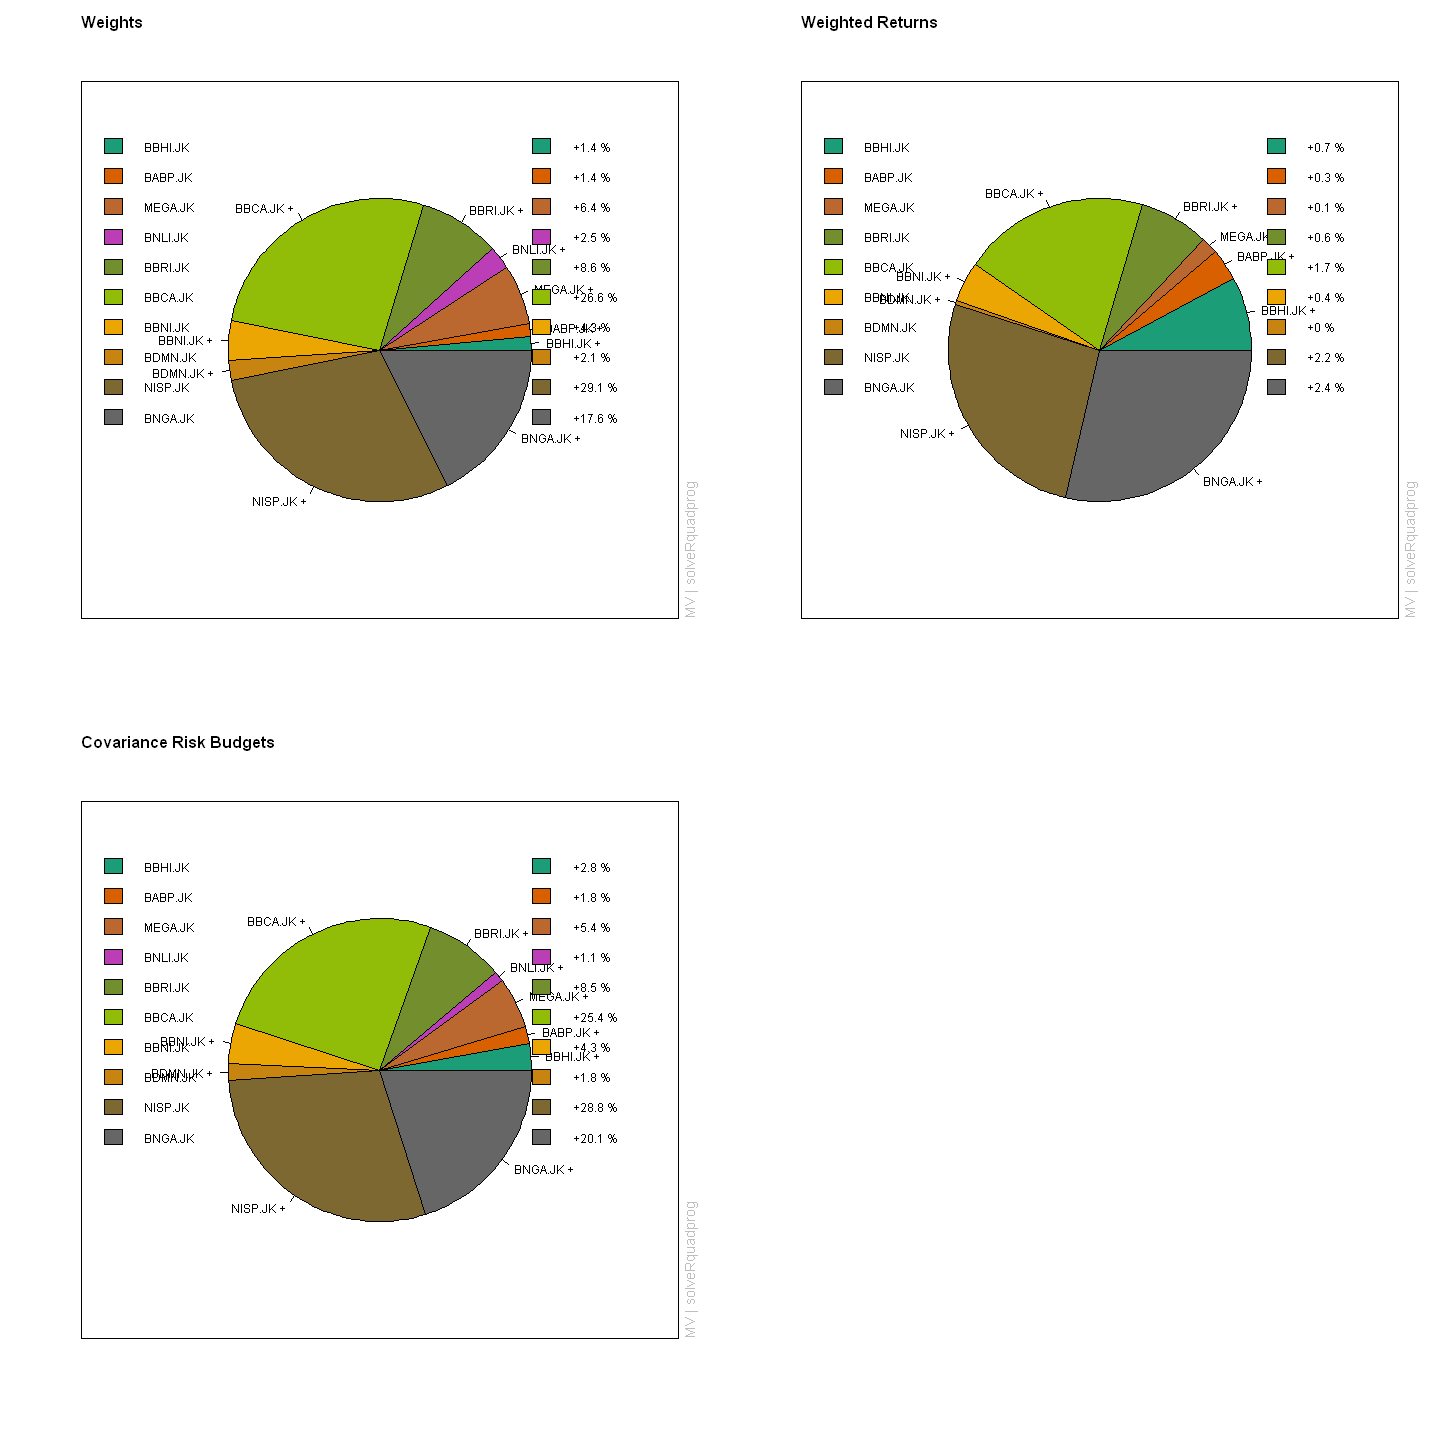

In [164]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(2,2))
col <- qualiPalette(ncol(ts_returns), "Dark2")
weightsPie(minriskPortfolio, radius = 0.7, col = col)
weightedReturnsPie(minriskPortfolio, radius = 0.7, col = col)
covRiskBudgetsPie(minriskPortfolio, radius = 0.7, col = col)

### 8.1.3 The Global MInimum Variance (GMV)

In [165]:
globminSpec <- portfolioSpec()
globminPortfolio <- minvariancePortfolio(data = ts_returns, spec = globminSpec,constraints = "LongOnly")
print(globminPortfolio)


Title:
 MV Minimum Variance Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0000  0.0043  0.0677  0.0049  0.1123  0.0202  0.0828  0.2543  0.0177  0.0552 
NISP.JK BNGA.JK 
 0.2767  0.1039 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0000  0.0043  0.0677  0.0049  0.1123  0.0202  0.0828  0.2543  0.0177  0.0552 
NISP.JK BNGA.JK 
 0.2767  0.1039 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0458 0.8774 1.8936 1.2910 

Description:
 Tue Sep  5 21:05:53 2023 by user: Kevin 


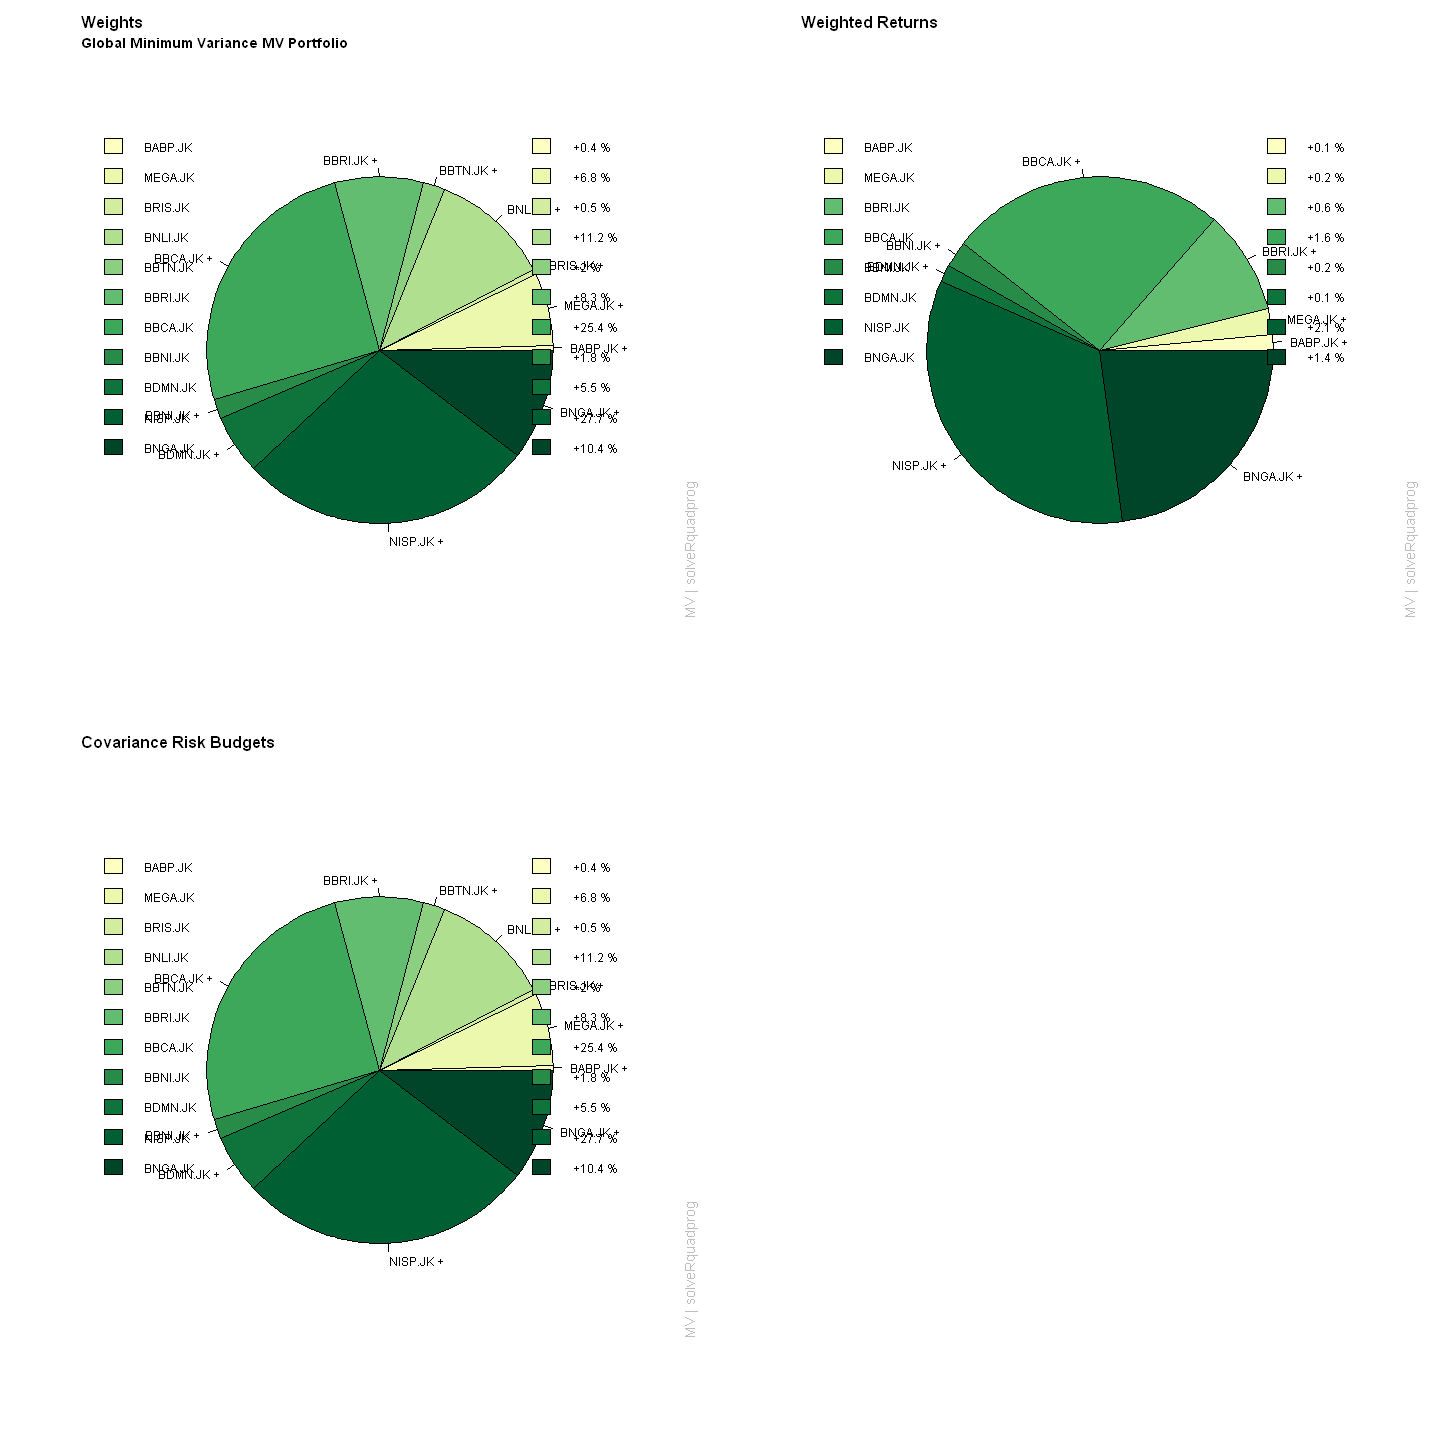

In [167]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(2,2))
col <- seqPalette(ncol(ts_returns), "YlGn")
weightsPie(globminPortfolio, box = FALSE, col = col)
mtext(text = "Global Minimum Variance MV Portfolio", side = 3,
      line = 1.5, font = 2, cex = 0.7, adj = 0)
weightedReturnsPie(globminPortfolio, box = FALSE, col = col)
covRiskBudgetsPie(globminPortfolio, box = FALSE, col = col)

### 8.1.4 Tangency Portfolio

In [168]:
tgSpec <- portfolioSpec()
setRiskFreeRate(tgSpec) <- 0

In [195]:
tgPortfolio <- tangencyPortfolio(data = ts_returns, spec = tgSpec,constraints = "LongOnly")
print(tgPortfolio)


Title:
 MV Tangency Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0806  0.0363  0.0158  0.0000  0.0000  0.0000  0.0471  0.1854  0.0625  0.0000 
NISP.JK BNGA.JK 
 0.1996  0.3726 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.2839  0.0567  0.0027  0.0000  0.0000  0.0000  0.0260  0.0890  0.0404  0.0000 
NISP.JK BNGA.JK 
 0.1141  0.3874 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.1337 1.2096 2.3241 1.6273 

Description:
 Tue Sep  5 21:34:22 2023 by user: Kevin 


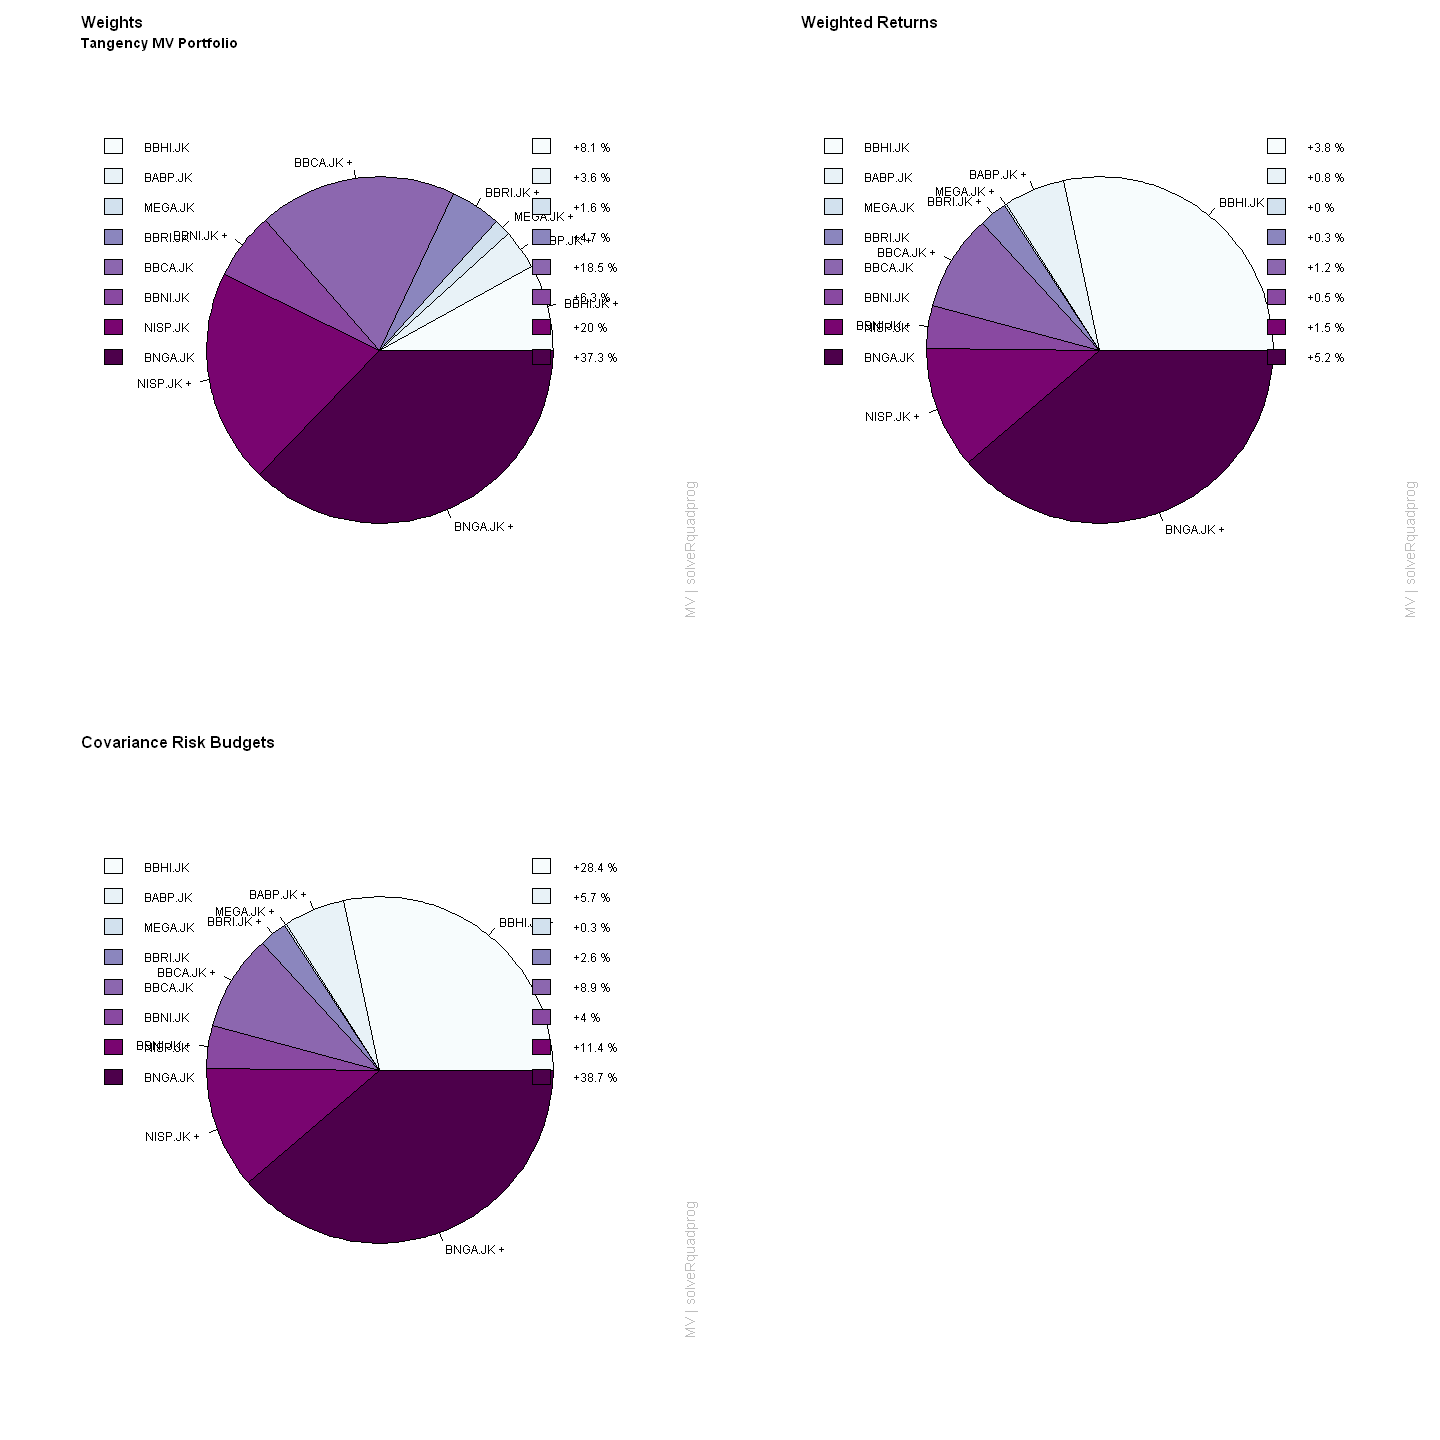

In [196]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(2,2))
col <- seqPalette(ncol(ts_returns), "BuPu")
weightsPie(tgPortfolio, box = FALSE, col = col)
mtext(text = "Tangency MV Portfolio", side = 3, line = 1.5,
      font = 2, cex = 0.7, adj = 0)
weightedReturnsPie(tgPortfolio, box = FALSE, col = col)
covRiskBudgetsPie(tgPortfolio, box = FALSE, col = col)

## 8.1.5 Comparing Weights

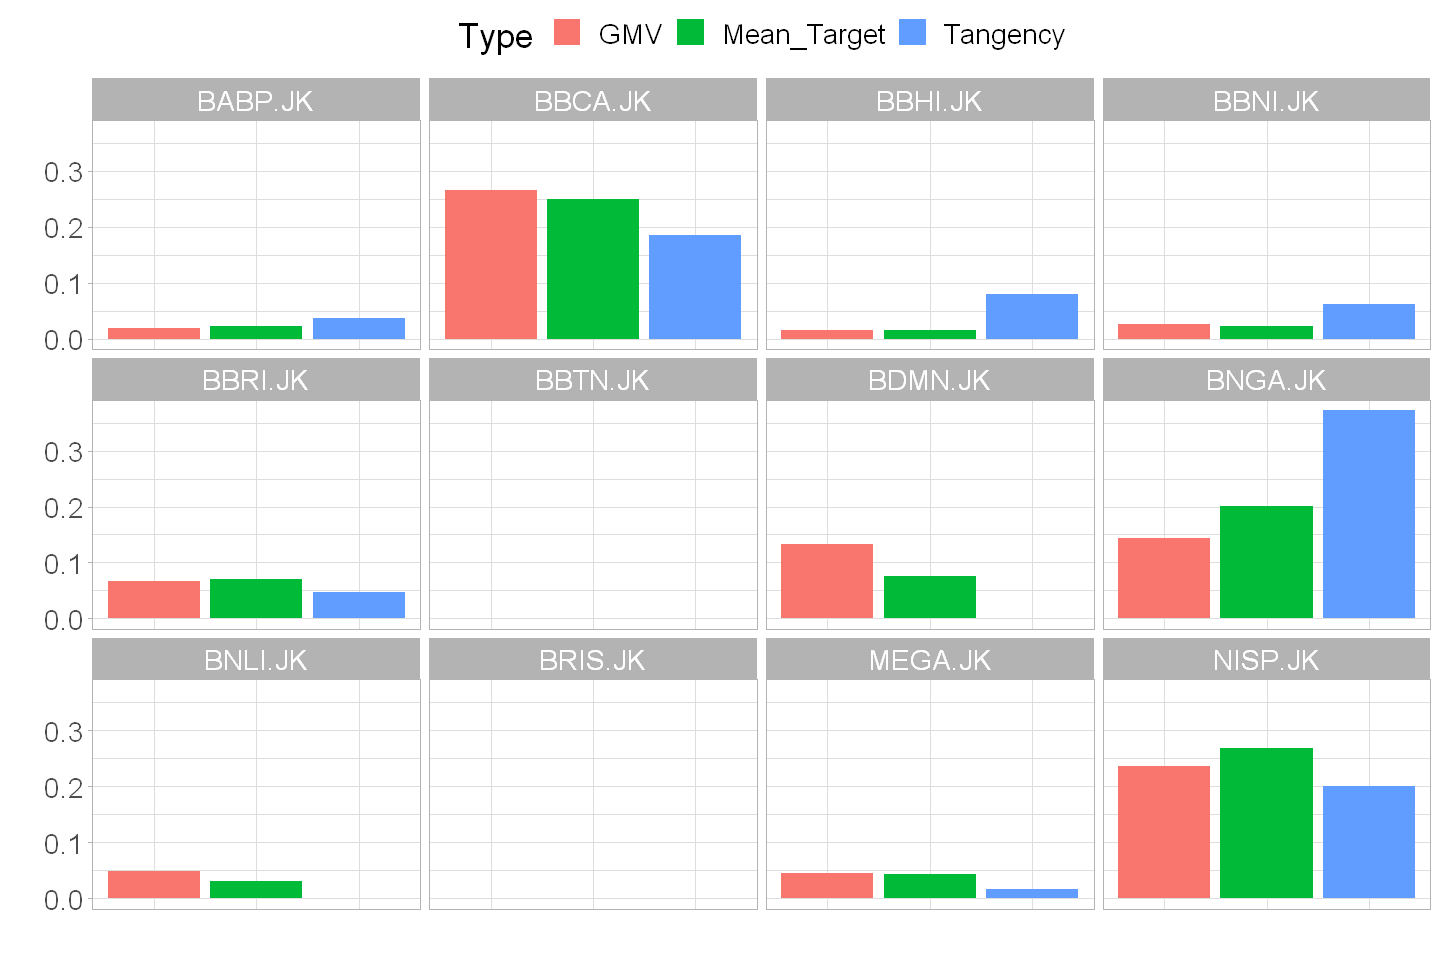

In [283]:
options(repr.plot.width=12, repr.plot.height=8)
MV_comp <-cbind(Tangency=getWeights(tgPortfolio), 
                GMV=getWeights(globminPortfolio), 
                Mean_Target=getWeights(minriskPortfolio))  %>% t()  %>% data.frame() 
MV_comp %>% mutate(Type=rownames(.))  %>% gather('var', 'val', -Type)  %>% ggplot(aes(x=factor(Type), y=val, fill=Type)) +
geom_col() + facet_wrap(~var)+ theme_light() + theme(text=element_text(size=21)) + labs(y='', x='') +
theme(legend.position = "top") +theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())

## 8.2 Mean-Variance Portfolio Frontiers

In [197]:
BankSpec <- portfolioSpec()
setNFrontierPoints(BankSpec) <- 5
longFrontier <- portfolioFrontier(ts_returns, BankSpec)

In [198]:
print(longFrontier)


Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 Portfolio Points:  4 of 4 

Portfolio Weights:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0695  0.0195  0.2061  0.0945  0.0495  0.2265  0.0000
2  0.1231  0.0498  0.0000  0.0000  0.0000  0.0000  0.0177  0.1172  0.0717
3  0.5122  0.1043  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
4  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
  BDMN.JK NISP.JK BNGA.JK
1  0.0866  0.2478  0.0000
2  0.0000  0.1282  0.4923
3  0.0000  0.0000  0.3835
4  0.0000  0.0000  0.0000

Covariance Risk Budgets:
  BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1  0.0000  0.0000  0.0663  0.0201  0.3005  0.1048  0.0397  0.1881  0.0000
2  0.4080  0.0673  0.0000  0.0000  0.0000  0.0000  0.0061  0.0318  0.0314
3  0.8976  0.0497  0.0000  0.0000  0.0000  

In [217]:
options(repr.plot.width=7, repr.plot.height=7)
setNFrontierPoints(BankSpec) <- 25
longFrontier <- portfolioFrontier(ts_returns, BankSpec)
longFrontier


Title:
 MV Portfolio Frontier 
 Estimator:         covEstimator 
 Solver:            solveRquadprog 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 Portfolio Points:  5 of 24 

Portfolio Weights:
   BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1   0.0000  0.0000  0.0000  0.0000  0.7814  0.2186  0.0000  0.0000  0.0000
6   0.0000  0.0000  0.0695  0.0195  0.2061  0.0945  0.0495  0.2265  0.0000
12  0.1231  0.0498  0.0000  0.0000  0.0000  0.0000  0.0177  0.1172  0.0717
18  0.5122  0.1043  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
24  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
   BDMN.JK NISP.JK BNGA.JK
1   0.0000  0.0000  0.0000
6   0.0866  0.2478  0.0000
12  0.0000  0.1282  0.4923
18  0.0000  0.0000  0.3835
24  0.0000  0.0000  0.0000

Covariance Risk Budgets:
   BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK
1   0.0000  0.0000  0.0000  0.0000  0.9311  0.0689  0.0000  0.0000  0.0000
6 

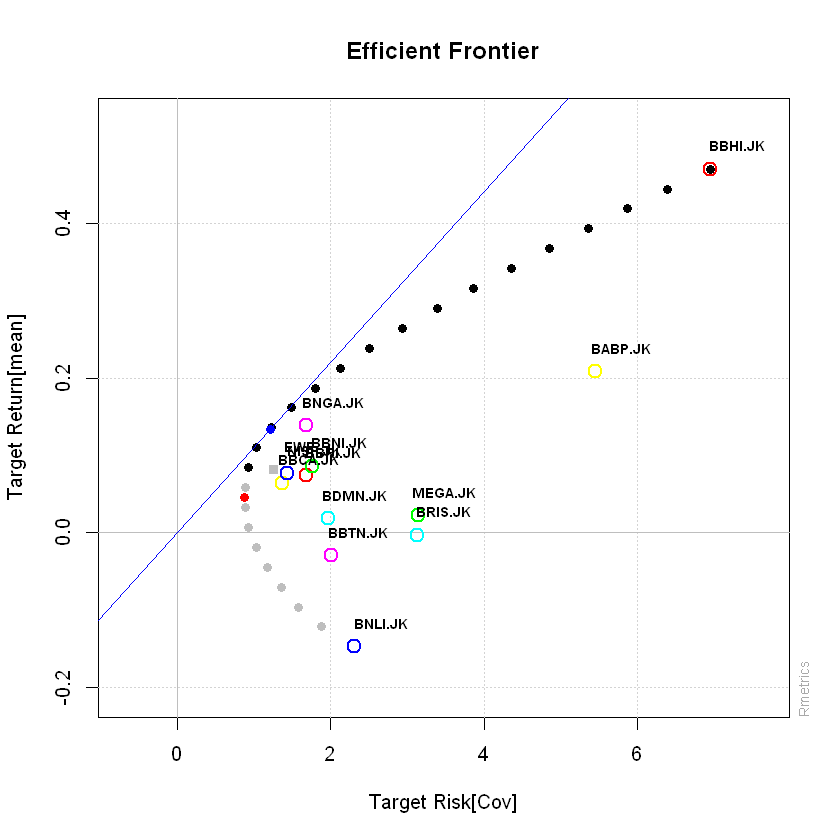

In [236]:
options(repr.plot.width=7, repr.plot.height=7)
tailoredFrontierPlot(object = longFrontier, mText = "MV Portfolio - LongOnly Constraints",risk = "Cov", sharpeRatio = FALSE)

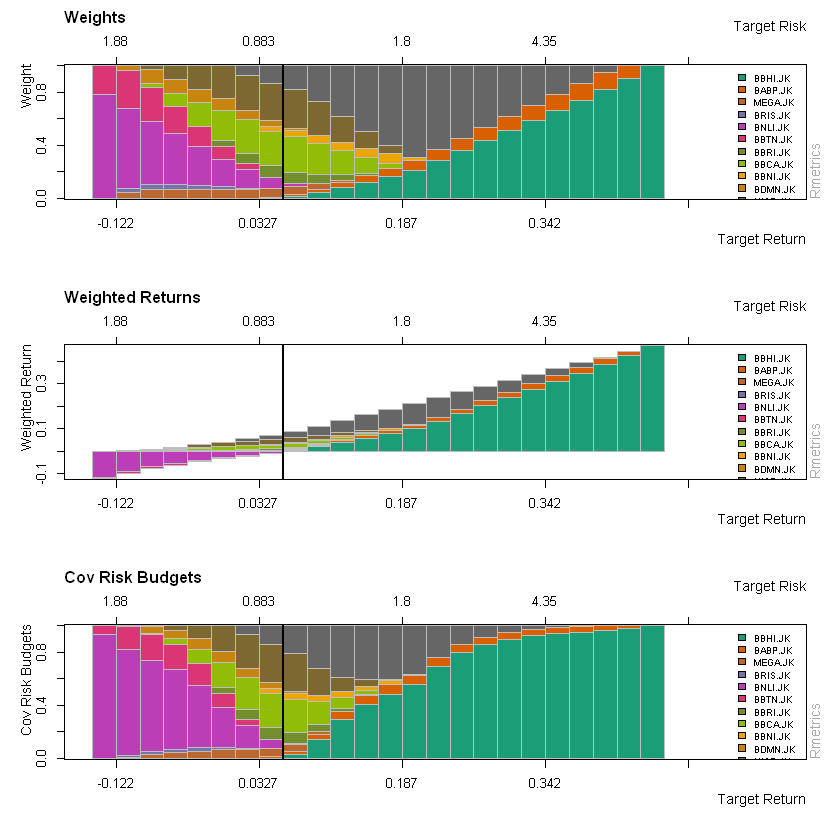

In [235]:
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow=c(3,1))
col <- qualiPalette(ncol(ts_returns), "Dark2")
weightsPlot(longFrontier, col=col)
weightedReturnsPlot(longFrontier, col=col)
covRiskBudgetsPlot(longFrontier, col=col)

# 9. Mean-CVaR  Portfolio

## 9.1 Mean-CVaR with the lowest risk for a give return

In [238]:
minriskSpec <- portfolioSpec()
setType(minriskSpec) <- "CVaR"
setAlpha(minriskSpec) <- 0.05
setSolver(minriskSpec) <- "solveRglpk.CVAR"
setTargetReturn(minriskSpec) <- getTargetReturn(BankPortfolio@portfolio)["mean"]
minriskPortfolio <- efficientPortfolio(data = ts_returns, spec = minriskSpec,constraints = "LongOnly")
print(minriskPortfolio)

Solver set to solveRquadprog

setSolver: solveRglpk




Title:
 CVaR Efficient Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 VaR Alpha:         0.05 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0155  0.0229  0.0428  0.0000  0.0302  0.0000  0.0703  0.2493  0.0234  0.0763 
NISP.JK BNGA.JK 
 0.2686  0.2008 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0321  0.0374  0.0255  0.0000  0.0143  0.0000  0.0644  0.2225  0.0223  0.0796 
NISP.JK BNGA.JK 
 0.2570  0.2449 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0816 0.9315 1.8384 1.3280 

Description:
 Tue Sep  5 22:17:13 2023 by user: Kevin 


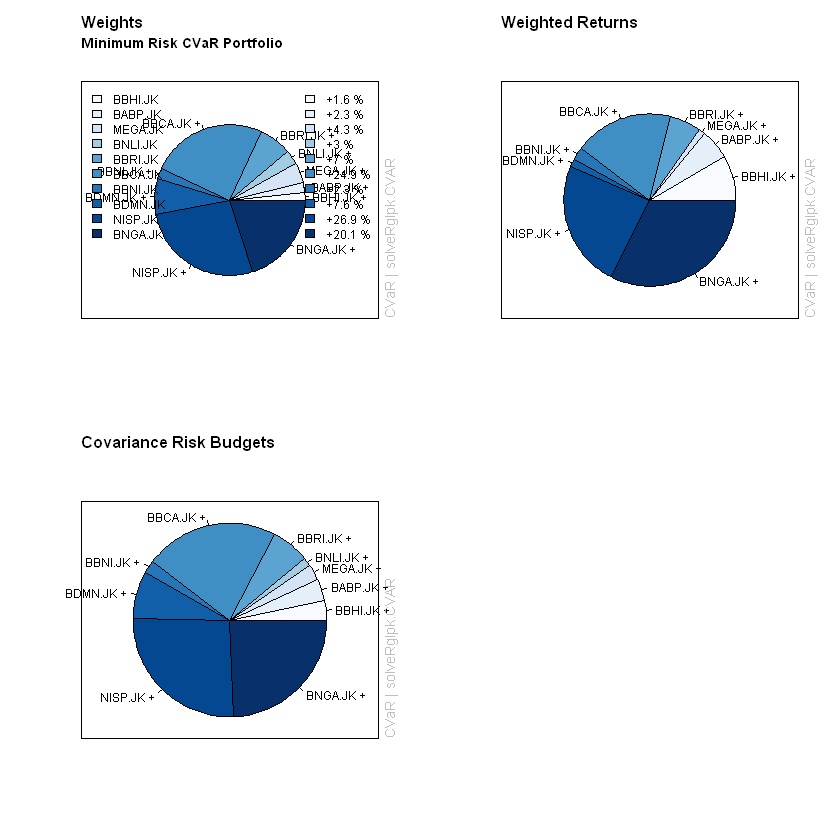

In [239]:
par(mfrow=c(2,2))
weightsPie(minriskPortfolio, radius = 0.7)
text <- "Minimum Risk CVaR Portfolio"
mtext(text, side = 3, line = 1.5, font = 2, cex = 0.7, adj = 0)

weightedReturnsPie(minriskPortfolio, radius = 0.8, legend = FALSE)
covRiskBudgetsPie(minriskPortfolio, radius = 0.9, legend = FALSE)

## 9.2 The Global Minimum Mean-CVAR 

In [240]:
globminSpec <- portfolioSpec()
setType(globminSpec) <- "CVaR"
setAlpha(globminSpec) <- 0.05
setSolver(globminSpec) <- "solveRglpk.CVAR"
setTargetReturn(globminSpec) <- getTargetReturn(BankPortfolio@portfolio)["mean"]
globminPortfolio <- minriskPortfolio(data = ts_returns, spec = globminSpec,constraints = "LongOnly")
print(globminPortfolio)

Solver set to solveRquadprog

setSolver: solveRglpk




Title:
 CVaR Minimum Risk Portfolio 
 Estimator:         covEstimator 
 Solver:            solveRglpk.CVAR 
 Optimize:          minRisk 
 Constraints:       LongOnly 
 VaR Alpha:         0.05 

Portfolio Weights:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0160  0.0182  0.0452  0.0000  0.0480  0.0000  0.0675  0.2661  0.0255  0.1336 
NISP.JK BNGA.JK 
 0.2354  0.1444 

Covariance Risk Budgets:
BBHI.JK BABP.JK MEGA.JK BRIS.JK BNLI.JK BBTN.JK BBRI.JK BBCA.JK BBNI.JK BDMN.JK 
 0.0326  0.0273  0.0296  0.0000  0.0283  0.0000  0.0642  0.2554  0.0260  0.1677 
NISP.JK BNGA.JK 
 0.2087  0.1602 

Target Returns and Risks:
  mean    Cov   CVaR    VaR 
0.0700 0.9216 1.8304 1.3743 

Description:
 Tue Sep  5 22:18:12 2023 by user: Kevin 


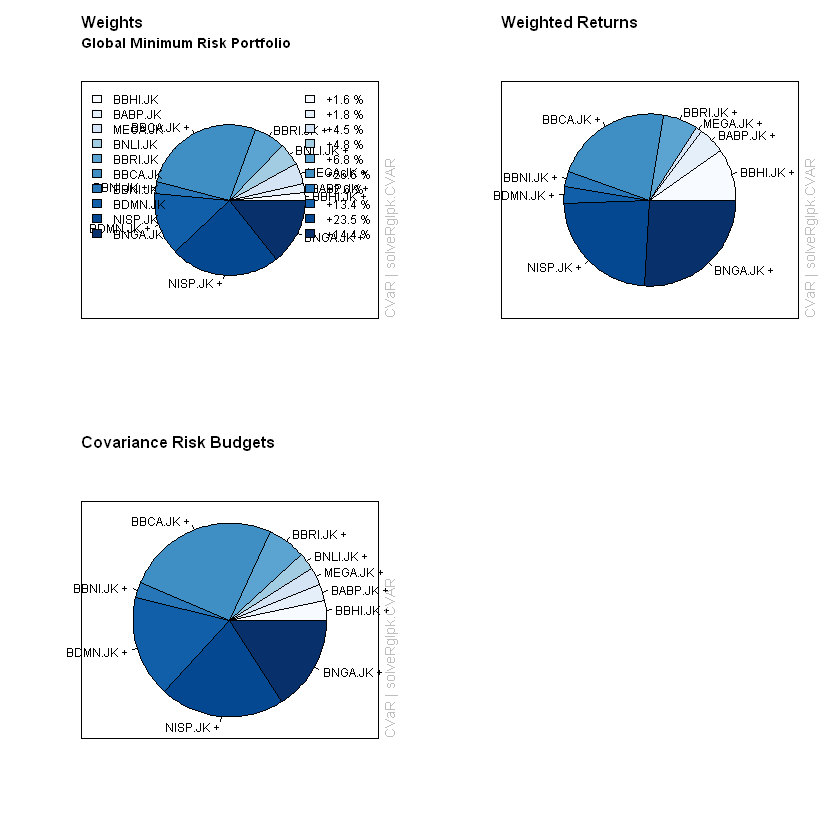

In [241]:
par(mfrow=c(2,2))
weightsPie(globminPortfolio, radius = 0.7)
text <- "Global Minimum Risk Portfolio"
mtext(text, side = 3, line = 1.5, font = 2, cex = 0.7, adj = 0)
weightedReturnsPie(globminPortfolio, radius = 0.8, legend = FALSE)
covRiskBudgetsPie(globminPortfolio, radius = 0.9, legend = FALSE)

# 10. Portfolio Backtesting 

## 10.1 Tangency vs Equal Mean Weight

In [242]:
ts_back <- cbind(ts_returns, rowMeans(ts_returns))
names(ts_back)[13] <- 'Avg'
head(ts_back)

GMT
              BBHI.JK   BABP.JK   MEGA.JK    BRIS.JK    BNLI.JK    BBTN.JK
2021-01-05  7.0707071  0.000000  0.000000 -0.4237222 -1.0000053 -0.5494509
2021-01-06  0.9433962  0.000000  0.000000  6.8085098 -2.3568982 -0.2762433
2021-01-07  0.9345794  0.000000  5.714281  7.9681217  2.4137888  0.2770085
2021-01-08 -2.3148148  2.000000 19.932422  5.5350516 -1.0100980  2.4861822
2021-01-11 -2.8436019 -1.960784 20.000007  6.2937127  1.3605430  2.9649614
2021-01-12 24.3902439  2.000000 19.953048 23.6842086  0.3355723 -0.2617736
              BBRI.JK   BBCA.JK    BBNI.JK    BDMN.JK    NISP.JK    BNGA.JK
2021-01-05 -0.9280736  3.730808  1.9607806  0.0000000 -0.6097573 -1.4705869
2021-01-06 -1.6393512 -2.045132 -1.5384539 -0.6250046 -0.6134981 -0.9950295
2021-01-07  1.9047542  0.287971  0.3906128  0.0000000  4.3209876  3.0150811
2021-01-08  2.5701066  1.220381  0.7782185  3.1446527 -3.5502947 -1.4634133
2021-01-11  5.9225506  4.184403  0.7722009  4.8780450  0.0000000 -0.4950518
2021-01-12  1.5

In [243]:
BankSpec <- portfolioSpec()
BankConstraints <- "LongOnly"
BankBacktest <- portfolioBacktest()
BankFormula <- Avg ~ BBHI.JK+BABP.JK+MEGA.JK+BRIS.JK+BNLI.JK+BBTN.JK+BBRI.JK+BBCA.JK+BBNI.JK+BDMN.JK+NISP.JK+BNGA.JK 

In [245]:
BankPortfolios <- portfolioBacktesting(formula = BankFormula,
                                      data = ts_back, spec = BankSpec, 
                                      constraints = BankConstraints,
                                      backtest = BankBacktest, trace = FALSE)

In [246]:
Weights <- round(100 * BankPortfolios$weights, 2)
setSmootherLambda(BankPortfolios$backtest) <- "3m"
BankSmoothPortfolios <- portfolioSmoothing(object = BankPortfolios,trace = FALSE)
smoothWeights <- round(100 * BankSmoothPortfolios$smoothWeights,2)

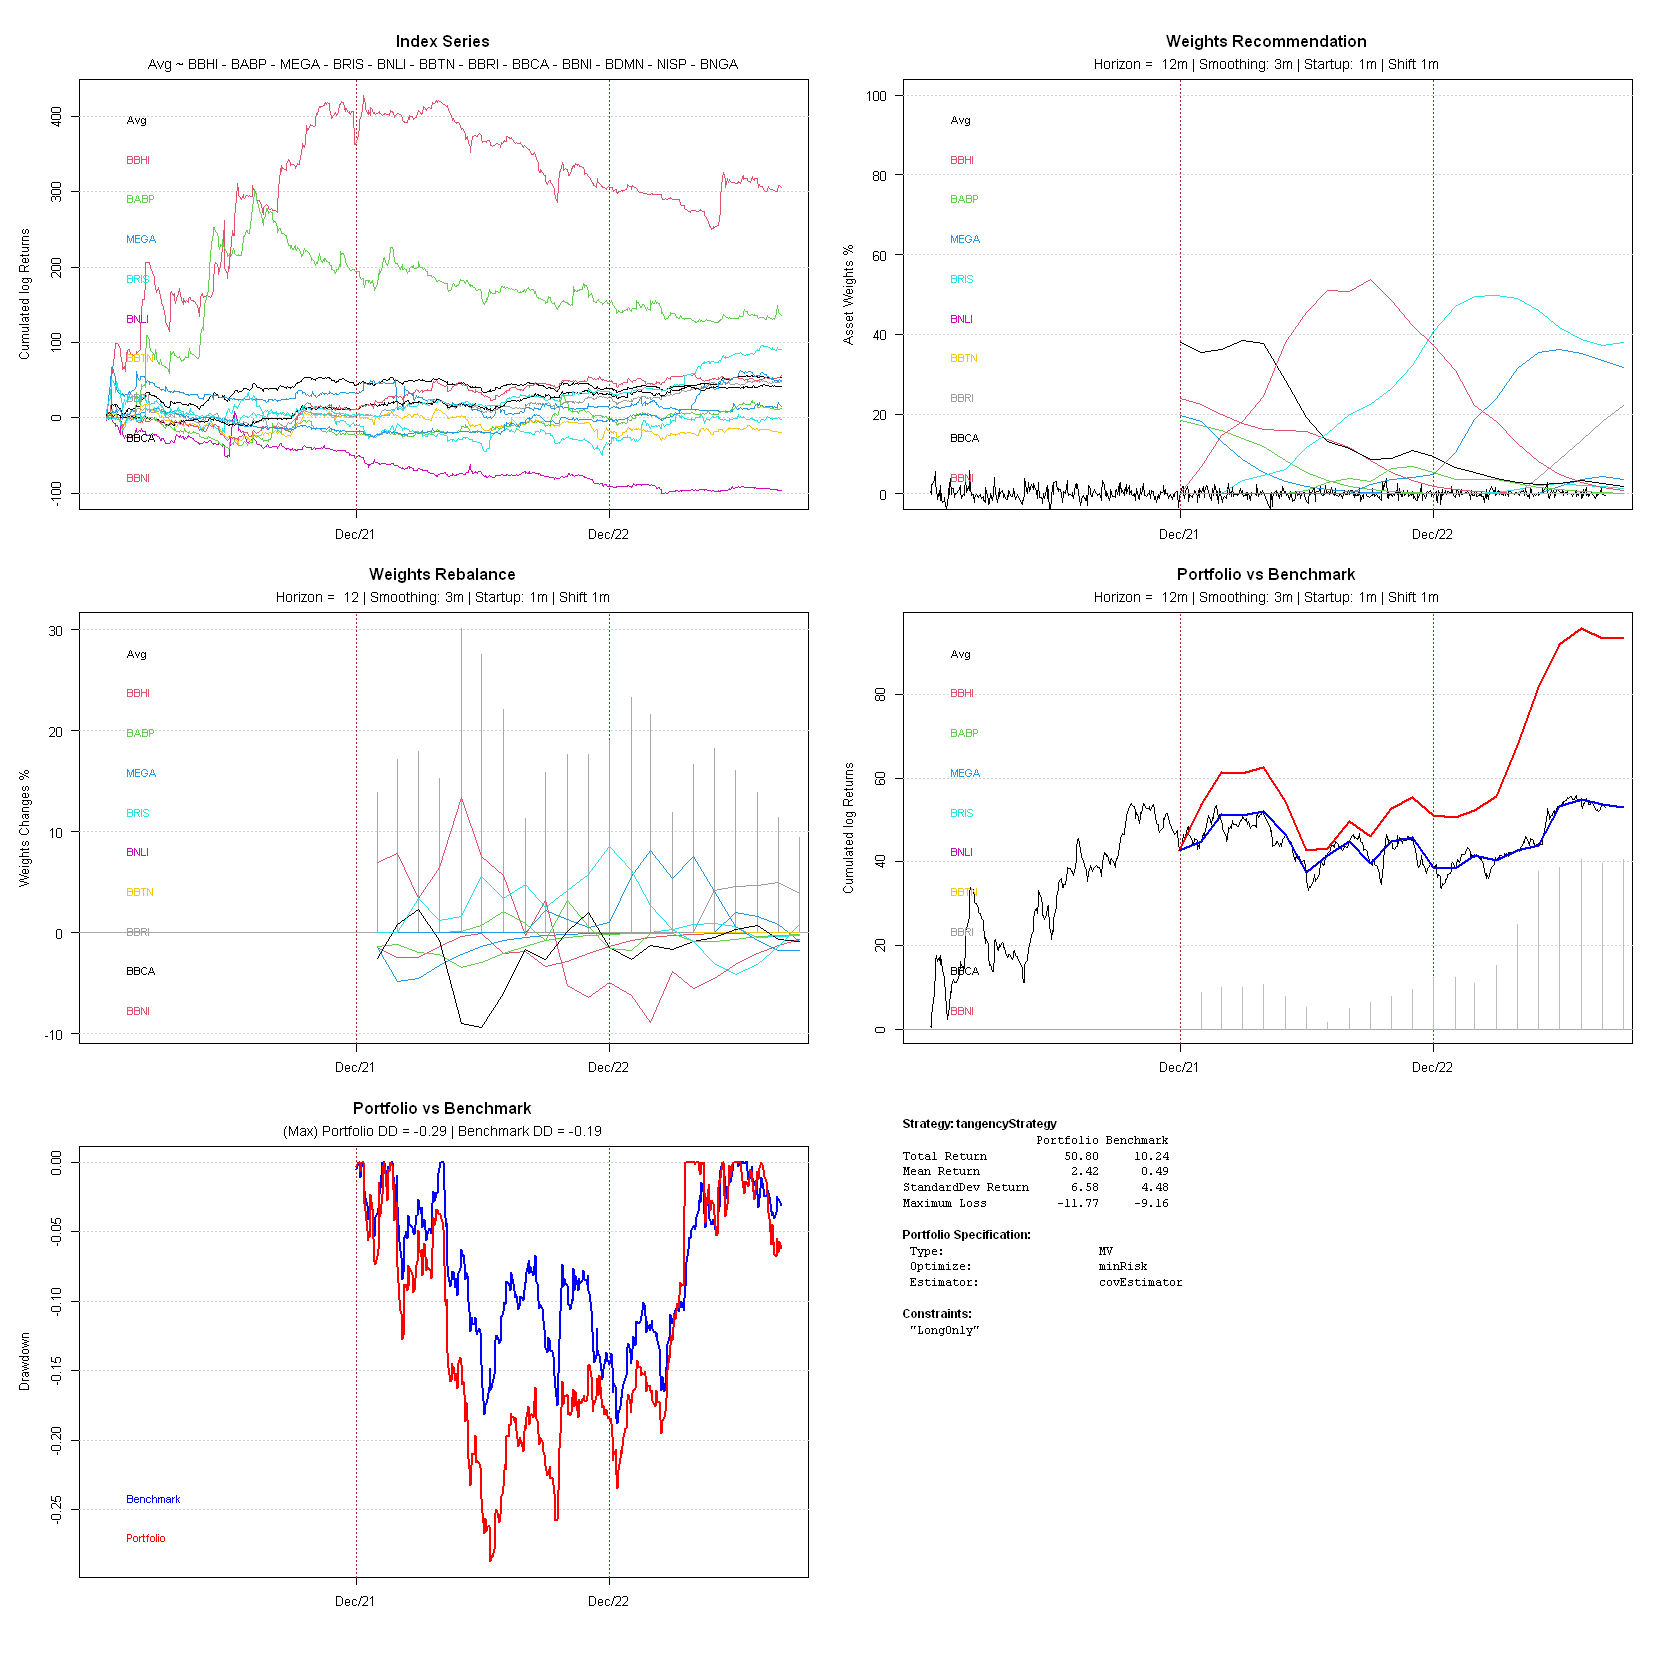

In [247]:
options(repr.plot.width=14, repr.plot.height=14)
backtestPlot(BankSmoothPortfolios, cex = 0.6, font = 1, family = "mono")


## 10.2 Tangency vs ^JKFINA

In [248]:
ticker <- c('^JKFINA')
benchmark <-getSymbols.yahoo(ticker, from='2021-01-01',periodicity='daily', auto.assign=FALSE)[, 6]
colSums(is.na(benchmark))

Warning message:
"^JKFINA contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


JKFINA.Adjusted 
              2

In [249]:
benchmark_returns<- returns(timeSeries(na.approx(benchmark)), method='simple')*100
tail(benchmark_returns)

GMT
           JKFINA.Adjusted
2023-08-25     -0.13085685
2023-08-28      0.15086196
2023-08-29      0.05657111
2023-08-30     -0.24172135
2023-08-31      0.61144996
2023-09-01     -0.26760341

In [250]:
ts_back2 <- na.omit(cbind(ts_returns, FINA= benchmark_returns))
tail(ts_back2)

GMT
              BBHI.JK   BABP.JK    MEGA.JK    BRIS.JK    BNLI.JK    BBTN.JK
2023-08-25 -0.3257329 -1.265823  1.9801980  0.2976190  0.0000000 -0.7843137
2023-08-28 -1.3071895  7.692308 -0.9708738  0.5934718  0.0000000  0.7905138
2023-08-29  0.0000000 10.714286  0.0000000 -0.5899705  0.0000000 -0.3921569
2023-08-30  0.0000000  0.000000  0.4901961  0.0000000 -0.5235602  0.0000000
2023-08-31  7.9470199 -9.677419  5.3658537  1.4836795 -1.0526316 -1.1811024
2023-09-01 -0.6134969 -1.190476 -2.7777778 -1.4619883  0.5319149 -0.3984064
              BBRI.JK    BBCA.JK    BBNI.JK    BDMN.JK    NISP.JK    BNGA.JK
2023-08-25  0.9009009  0.8152174 -0.2739726 -0.3401361 -2.5862069 -0.8823529
2023-08-28 -0.8928571 -0.8086253  0.0000000  0.0000000  0.4424779 -0.2967359
2023-08-29  0.9009009  0.5434783  0.5494505  0.0000000  0.0000000  3.2738095
2023-08-30 -1.3392857 -0.5405405  0.5464481  0.6825939 -0.8810573 -1.1527378
2023-08-31  0.4524887 -0.2717391 -0.2717391 -0.6779661 -0.4444444 -0.8746356
20

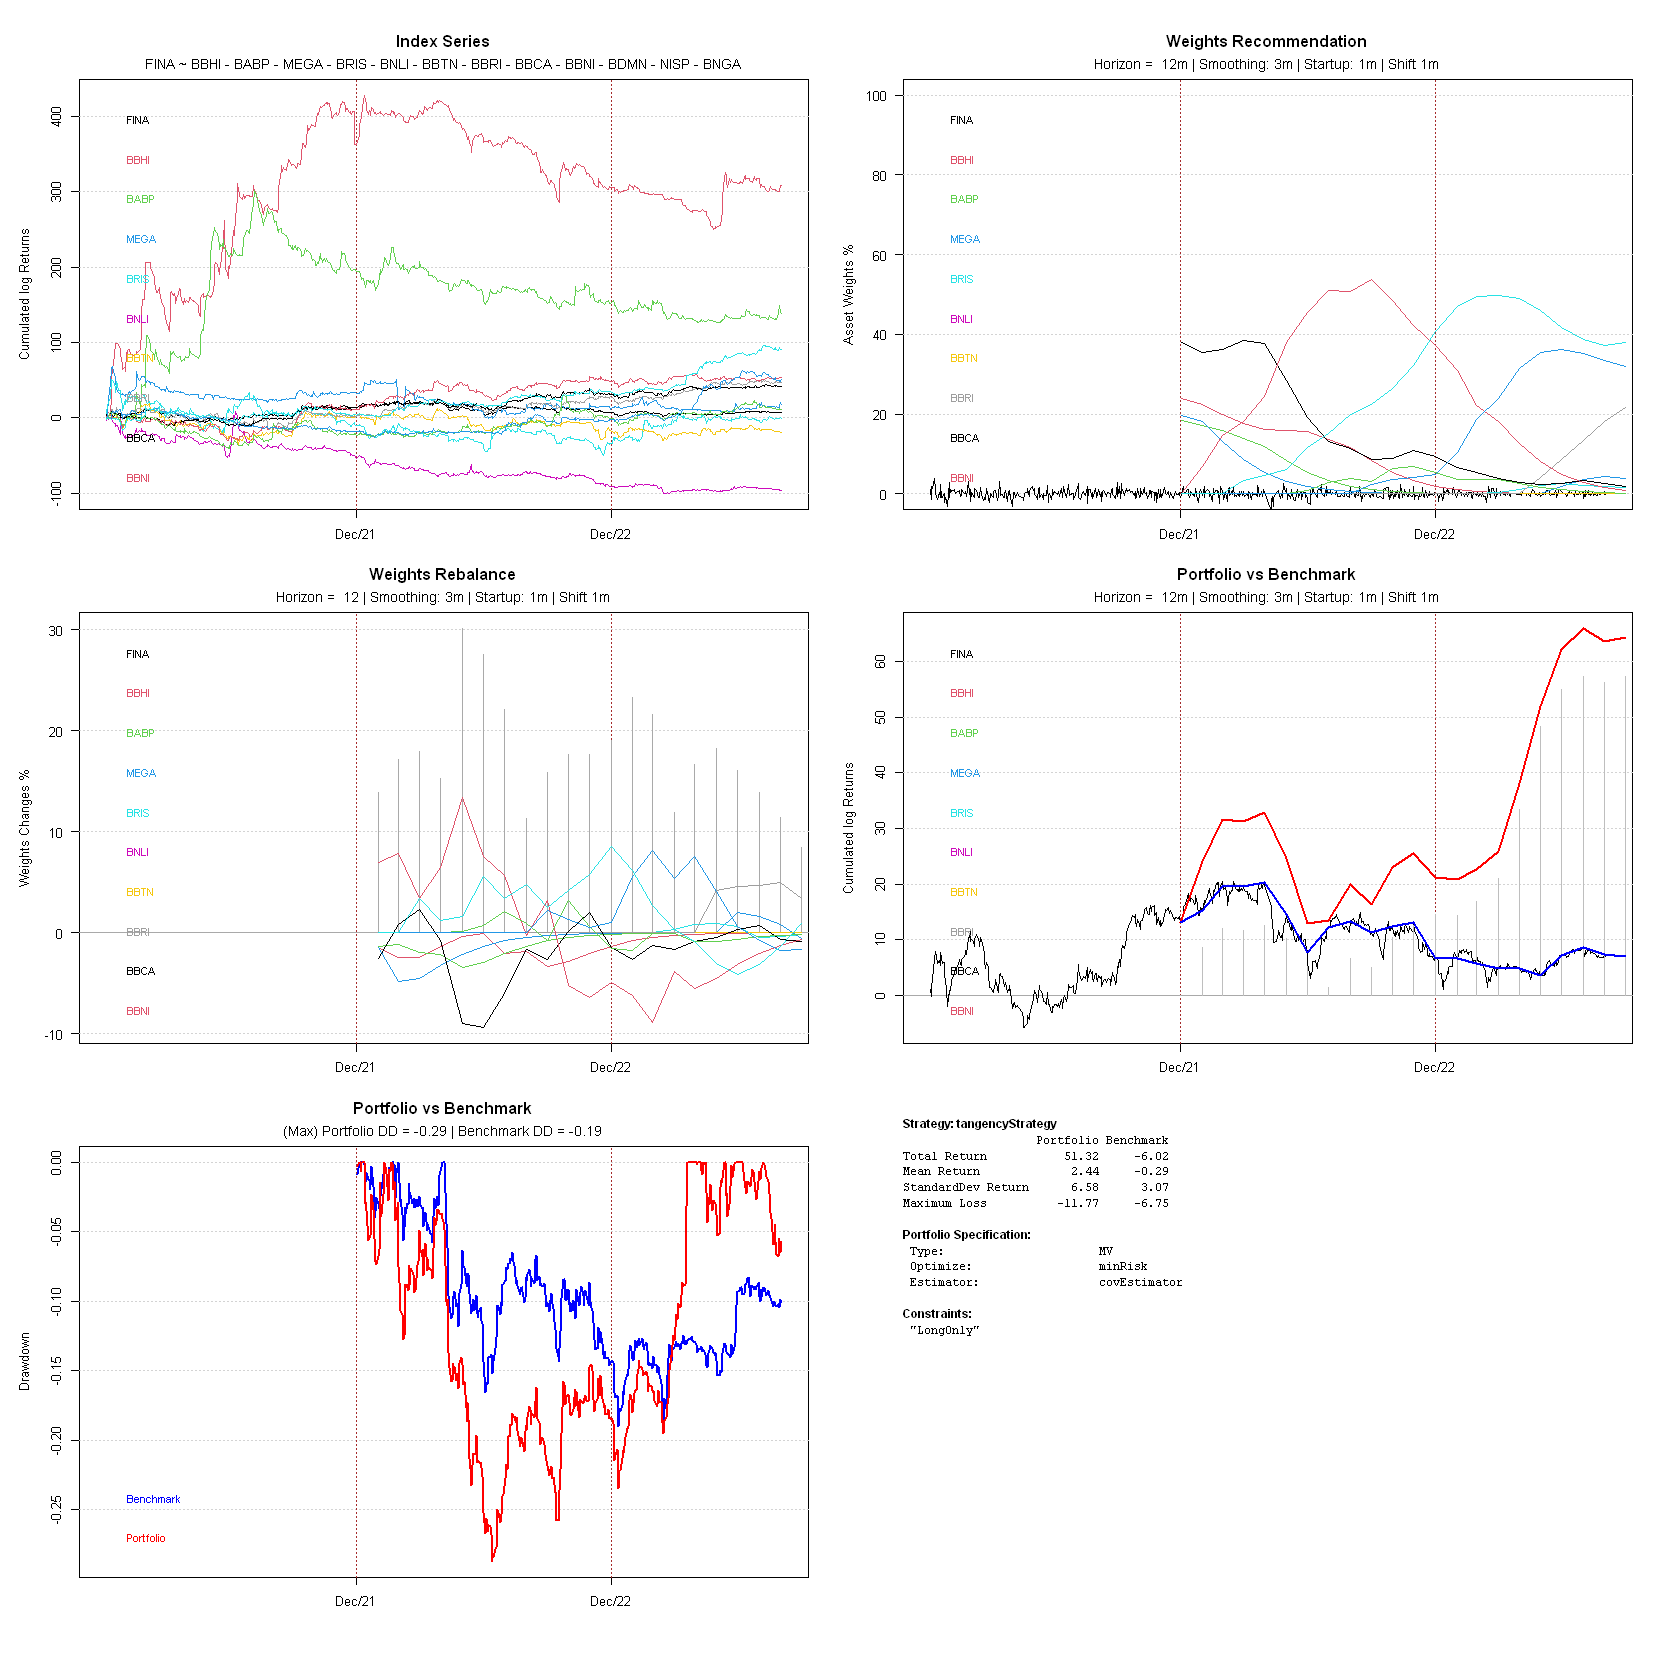

In [251]:
BankFormula <- FINA ~ BBHI.JK+BABP.JK+MEGA.JK+BRIS.JK+BNLI.JK+BBTN.JK+BBRI.JK+BBCA.JK+BBNI.JK+BDMN.JK+NISP.JK+BNGA.JK
BankPortfolios <- portfolioBacktesting(formula = BankFormula,
                                      data = ts_back2, spec = BankSpec, 
                                      constraints = BankConstraints,
                                      backtest = BankBacktest, trace = FALSE)
Weights <- round(100 * BankPortfolios$weights, 2)
setSmootherLambda(BankPortfolios$backtest) <- "3m"
BankSmoothPortfolios <- portfolioSmoothing(object = BankPortfolios,trace = FALSE)
smoothWeights <- round(100 * BankSmoothPortfolios$smoothWeights,2)
backtestPlot(BankSmoothPortfolios, cex = 0.6, font = 1, family = "mono")

## 10.3 Get Lucky! Testing on the unseen data

"... The traditional variance-based optimization is therefore preferable in most cases even for an investor with downside risk preferences" (Rigamoti, 2020)
https://www.mdpi.com/2227-9091/8/1/29

In [ ]:
tgSpec <- portfolioSpec()`
setRiskFreeRate(tgSpec) <- 0

In [293]:
static_dat <- window(ts_returns, '2022-05-05', '2023-05-05')
tgPortfolio_static<- tangencyPortfolio(data = static_dat,spec = tgSpec,constraints = "LongOnly")
getWeights(tgPortfolio_static)

BBHI.JK    BABP.JK    MEGA.JK    BRIS.JK    BNLI.JK    BBTN.JK    BBRI.JK 
0.00000000 0.00000000 0.00000000 0.03215455 0.00000000 0.00000000 0.00000000 
   BBCA.JK    BBNI.JK    BDMN.JK    NISP.JK    BNGA.JK 
0.00000000 0.00000000 0.00000000 0.52869179 0.43915366

In [294]:
globminSpec <- portfolioSpec()
globminPortfolio_static <- minvariancePortfolio(data = static_dat, spec = globminSpec,constraints = "LongOnly")
getWeights(globminPortfolio_static)

BBHI.JK     BABP.JK     MEGA.JK     BRIS.JK     BNLI.JK     BBTN.JK 
0.009482183 0.000000000 0.161301532 0.020352000 0.252275360 0.058150323 
    BBRI.JK     BBCA.JK     BBNI.JK     BDMN.JK     NISP.JK     BNGA.JK 
0.076994249 0.017726372 0.052378320 0.032116239 0.176400109 0.142823313

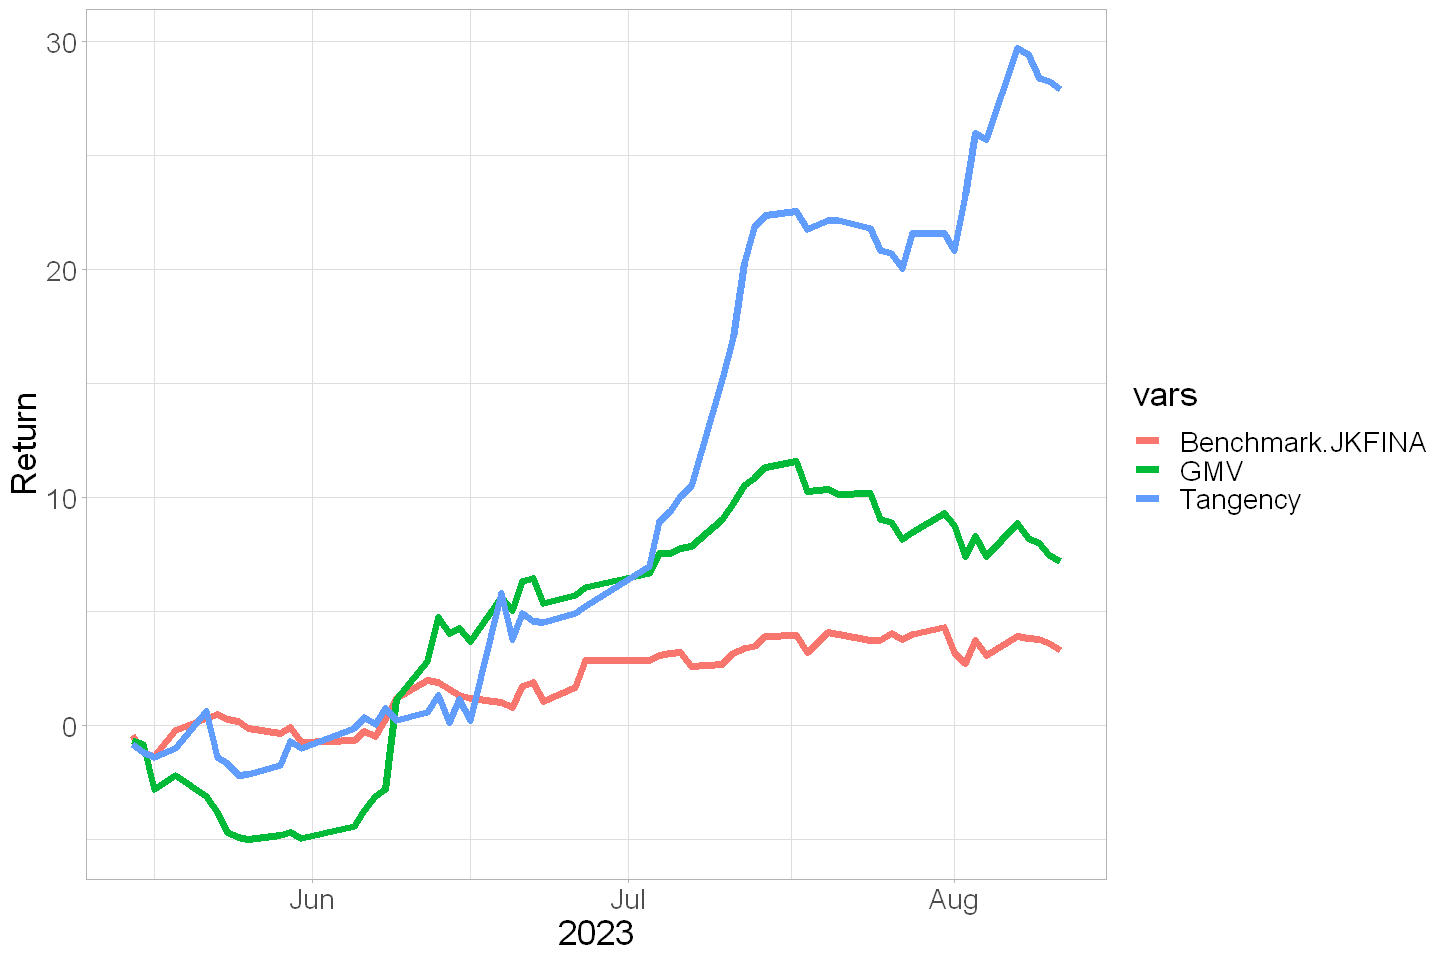

In [301]:
options(repr.plot.width=12, repr.plot.height=8)
test_dat <- window(ts_returns, '2023-05-13', '2023-08-13')
test_dat_tg <-rowSums(test_dat*getWeights(tgPortfolio_static))
test_dat_GMV <-rowSums(test_dat*getWeights(globminPortfolio_static))
bench_result<-window(benchmark_returns, '2023-05-13', '2023-08-13')
cbind(Tangency=(cumprod(test_dat_tg/100 +1)-1)*100, 
      GMV=(cumprod(test_dat_GMV/100 +1)-1)*100,
      'Benchmark-JKFINA' = (cumprod(bench_result/100 +1)-1)*100)  %>% data.frame()  %>% mutate(Date=as.Date(rownames(.)))  %>% gather('vars','val', -Date)  %>% 
ggplot(aes(Date, val, group=vars, color=vars)) + geom_line(lwd=2)  + theme_light() + theme(text=element_text(size=21)) + labs(y='Return',x='2023')

# 11.  Monthly CAPM 

For the purpose of demonstration, I assume the risk free rate is 6.8%

## 11.1 Gettingn the data

In [302]:
rfrate<- 6.8/100/12
rfrate

[1] 0.005666667

In [314]:
tickers <- c('BBCA.JK','BBRI.JK', 'BRIS.JK', 'MEGA.JK', 'BBTN.JK', 'BBHI.JK',
             'BABP.JK', 'BBNI.JK', 'NISP.JK', 'BDMN.JK', 'BNGA.JK', 'BNLI.JK')
portfolioPrices <- NULL
for(ticker in tickers){
    portfolioPrices <- cbind(portfolioPrices,getSymbols.yahoo(ticker, from='2021-01-01',
                                            periodicity='monthly', auto.assign=FALSE)[, 6])
}
ts <- timeSeries(na.approx(portfolioPrices),units= tickers)
ts_returns<- returns(ts, method='simple')
tail(ts_returns)

GMT
                BBCA.JK     BBRI.JK     BRIS.JK      MEGA.JK      BBTN.JK
2023-03-31  0.054959266  0.13162313  0.02976191  0.020396711  0.052577153
2023-04-30  0.000000000  0.09313725  0.00000000 -0.016032064  0.028112450
2023-05-31  0.011049724 -0.02690583 -0.01790878  0.099796334  0.031250000
2023-06-30 -0.002732240  0.04147465 -0.02071006 -0.009259259 -0.003787879
2023-07-31  0.005479452 -0.01769912  0.03323263  0.009345794 -0.045627376
2023-08-31  0.005449591  0.01351351 -0.02339181 -0.050925926  0.000000000
               BBHI.JK     BABP.JK     BBNI.JK     NISP.JK      BDMN.JK
2023-03-31 -0.14950166 -0.07058824  0.05149575  0.08496737 -0.017421648
2023-04-30 -0.20312500 -0.03797468 -0.03978780  0.32005835  0.020482018
2023-05-31  0.70588235  0.03947368  0.01104972  0.16176471  0.061594203
2023-06-30  0.04022989  0.03797468 -0.03005464  0.02109705  0.044368601
2023-07-31 -0.09944751  0.02439024  0.03380282 -0.07438017 -0.042483660
2023-08-31 -0.02453988 -0.03571429  0.02997275

In [315]:
ticker <- c('^JKSE')
jkse <-getSymbols.yahoo(ticker, from='2021-01-01',periodicity='monthly', auto.assign=FALSE)[, 6]
jkse<- returns(timeSeries(na.approx(jkse)), method='simple')
tail(jkse)

GMT
           JKSE.Adjusted
2023-03-31   0.016228431
2023-04-30  -0.040842423
2023-05-31   0.004314269
2023-06-30   0.040451048
2023-07-31   0.003159680
2023-08-31   0.006254654

In [316]:
summary(jkse)

Start Record: 2021-01-31 
End Record:   2023-08-31 
Observations: 32 
Format:       %Y-%m-%d 
FinCenter:    GMT 

 JKSE.Adjusted      
 Min.   :-0.041058  
 1st Qu.:-0.006168  
 Median : 0.005988  
 Mean   : 0.005830  
 3rd Qu.: 0.017726  
 Max.   : 0.064726

## 11.2 Calculating distribution of beta and alpha

In [318]:
estimate_capm_beta<- function(data) {
    data <- data.frame(data)
    fit <- lm(ret_excess ~ mkt_excess, data = data)
    beta <- as.numeric(coefficients(fit)[2])
    beta
}

In [319]:
estimate_capm_alpha<- function(data) {
    data <- data.frame(data)
    fit <- lm(ret_excess ~ mkt_excess, data = data)
    alpha <- as.numeric(coefficients(fit)[1])
    alpha
}

In [320]:
by <- periods(time(ts_returns), "7m","2m")
by

$from
GMT
 [1] [2021-01-01] [2021-03-01] [2021-05-01] [2021-07-01] [2021-09-01]
 [6] [2021-11-01] [2022-01-01] [2022-03-01] [2022-05-01] [2022-07-01]
[11] [2022-09-01] [2022-11-01] [2023-01-01]

$to
GMT
 [1] [2021-07-31] [2021-09-30] [2021-11-30] [2022-01-31] [2022-03-31]
 [6] [2022-05-31] [2022-07-31] [2022-09-30] [2022-11-30] [2023-01-31]
[11] [2023-03-31] [2023-05-31] [2023-07-31]

attr(,"control")
GMT
       start          end 
[2021-01-31] [2023-08-31] 

In [321]:
dist_beta<-sapply(1:length(tickers), function(tick){
    data <- cbind(ts_returns[,tick]-rfrate , jkse-rfrate)  %>% data.frame()
    names(data) <- c('ret_excess', 'mkt_excess')
    dat_s <- as.timeSeries(data)
    sapply(1:length(by$from), function(x) estimate_capm_beta(window(dat_s,by$from[x],by$to[x] )))
})%>% data.frame()

**Beta**

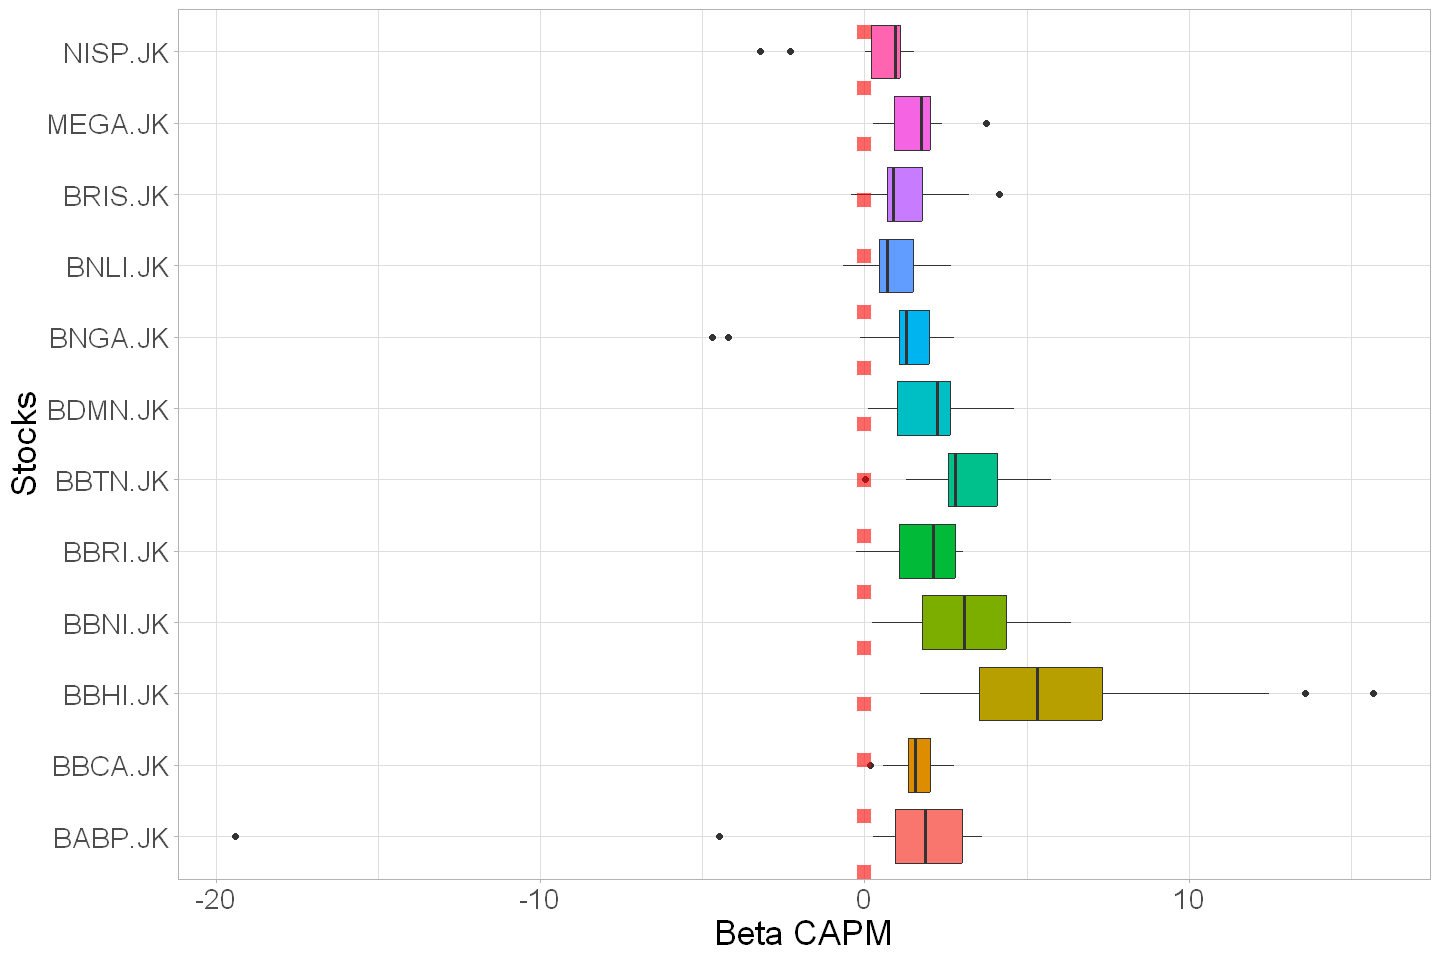

In [333]:
names(dist_beta) <-names(ts_returns)
dist_beta  %>%  gather('var', 'val')  %>% ggplot(aes(val, y=var, group=var, fill=var)) + geom_boxplot()+
theme_light() + theme(text=element_text(size=21)) +  theme(legend.position = "none") + labs(x='Beta CAPM', y='Stocks')+
geom_vline(xintercept = 0, color = "red",linetype="dotted", lwd=4, alpha=0.6)

**Alpha**

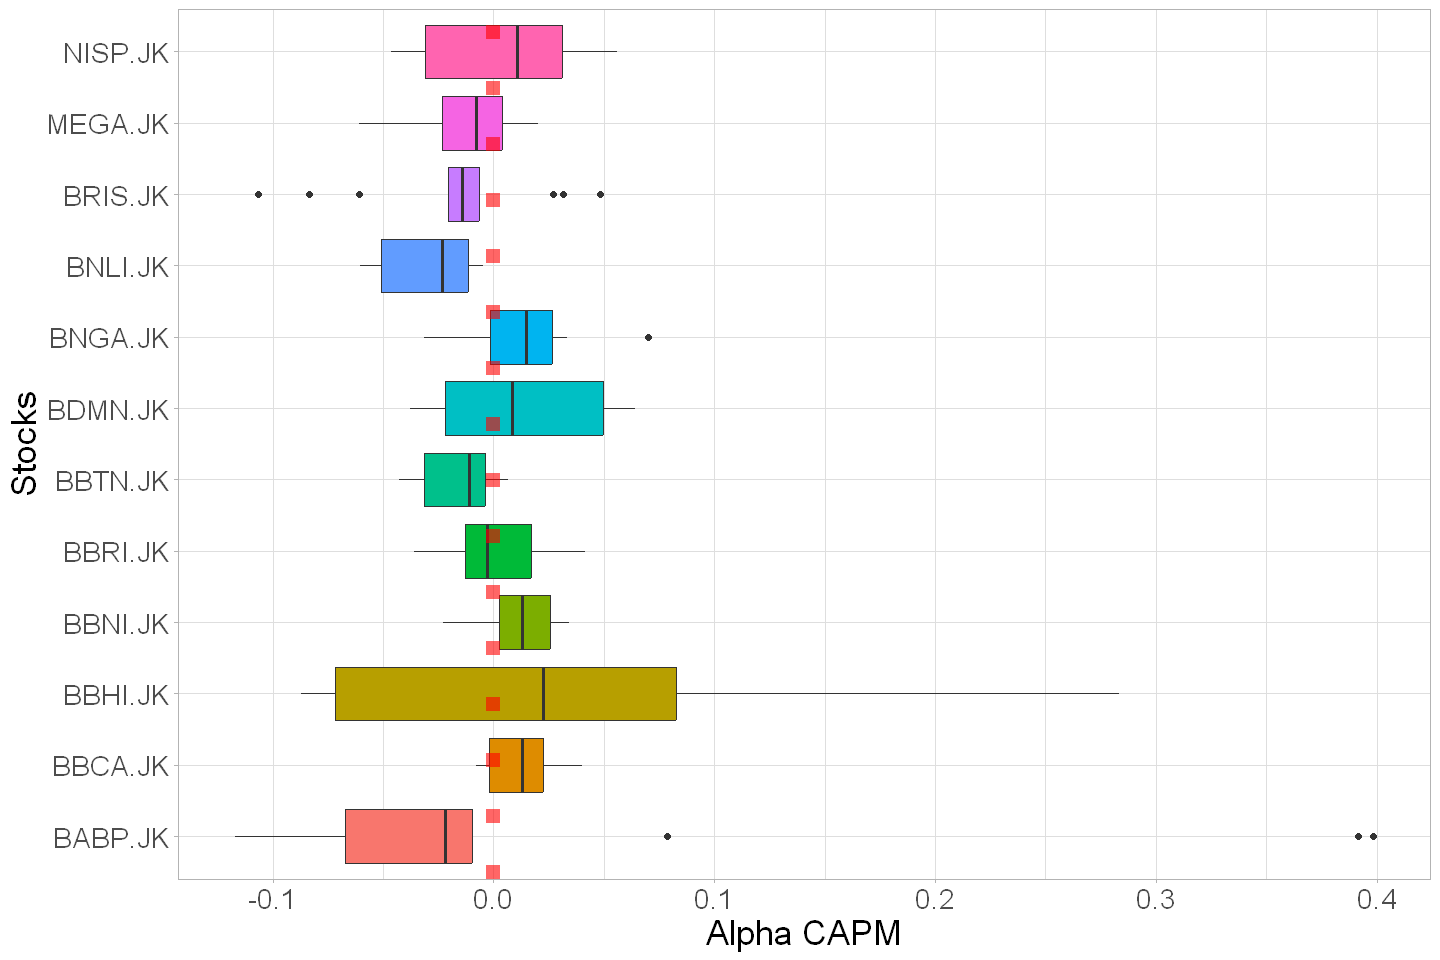

In [334]:
dist_alpha<-sapply(1:length(tickers), function(tick){
    data <- cbind((ts_returns[,tick])-rfrate , jkse-rfrate)  %>% data.frame()
    names(data) <- c('ret_excess', 'mkt_excess')
    dat_s <- as.timeSeries(data)
    sapply(1:length(by$from), function(x) estimate_capm_alpha(window(dat_s,by$from[x],by$to[x] )))
})%>% data.frame()
names(dist_alpha) <-names(ts_returns)
dist_alpha  %>%  gather('var', 'val')  %>% ggplot(aes(val, y=var, group=var, fill=var)) + geom_boxplot()+
theme_light() + theme(text=element_text(size=21)) +  theme(legend.position = "none") + labs(x='Alpha CAPM', y='Stocks')+
geom_vline(xintercept = 0, color = "red",linetype="dotted", lwd=4, alpha=0.6)

## 11.3 Fama french emerging market (just getting the data)

In [312]:
emerging_ff <- download_french_data("Fama/French Emerging 5 Factors")
emerging_ff <- emerging_ff$subsets$data[[1]] %>% 
mutate(month = floor_date(ymd(str_c(date, "01")), "month"))  %>% 
data.frame() %>% dplyr::filter(month <= ymd("2023-8-31") & month >= ymd("1960-01-01"))
tail(emerging_ff)

New names:
• `` -> `...1`
New names:
• `` -> `...1`


date   Mkt.RF SMB   HML   RMW   CMA   RF   month     
404 202302 -5.67   2.21  0.97  0.73  1.70 0.34 2023-02-01
405 202303  2.26  -2.17 -1.27  0.88 -1.15 0.36 2023-03-01
406 202304 -0.73   1.52  5.05 -1.50  3.32 0.35 2023-04-01
407 202305 -1.45   0.72  0.87 -0.06  1.05 0.36 2023-05-01
408 202306  3.71   0.06  1.56 -0.61  0.34 0.40 2023-06-01
409 202307  5.36  -1.81  1.48 -1.03  0.97 0.45 2023-07-01

# 12. Other Projects

## 12.1 Price movement after EPS date

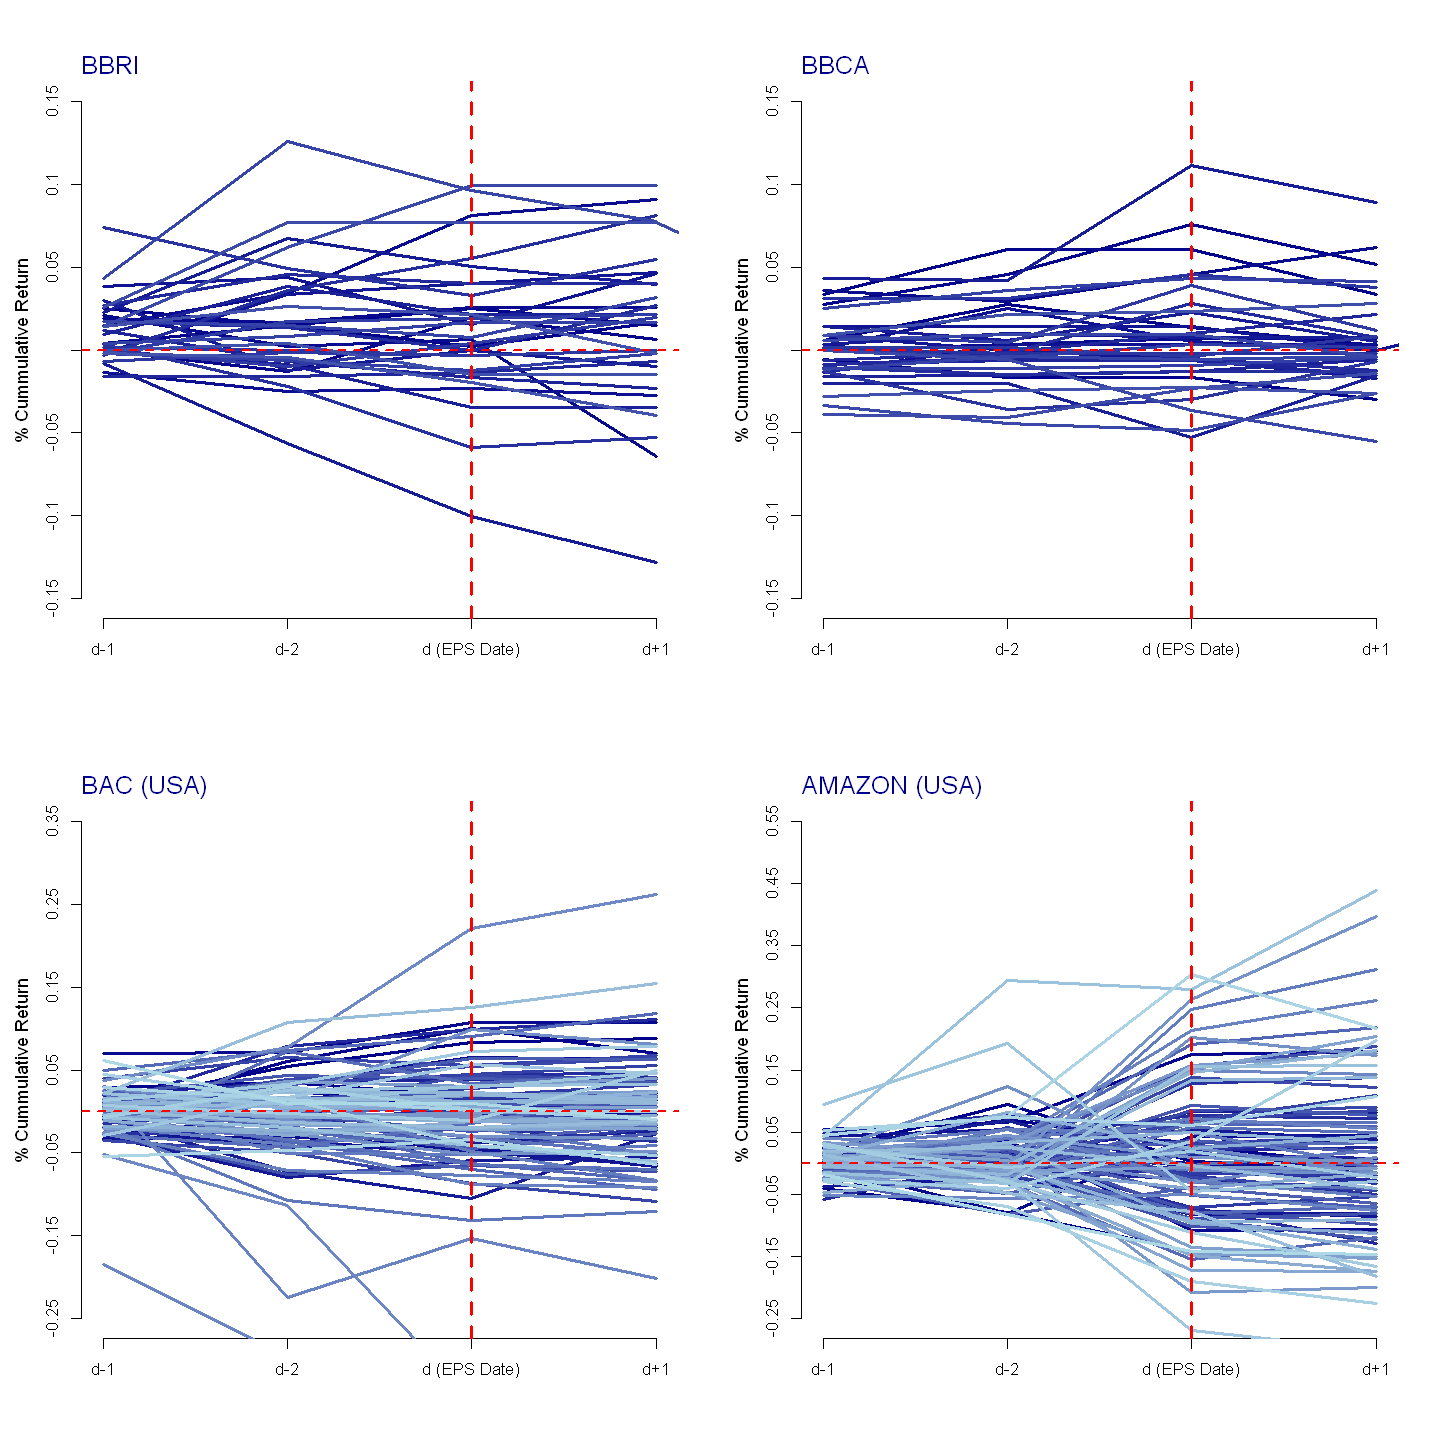

## 12.2 The dangers of EXTRAPOLATION on unseen data: Overfitting? Should we keep predicting? Are ensemble methods promising?

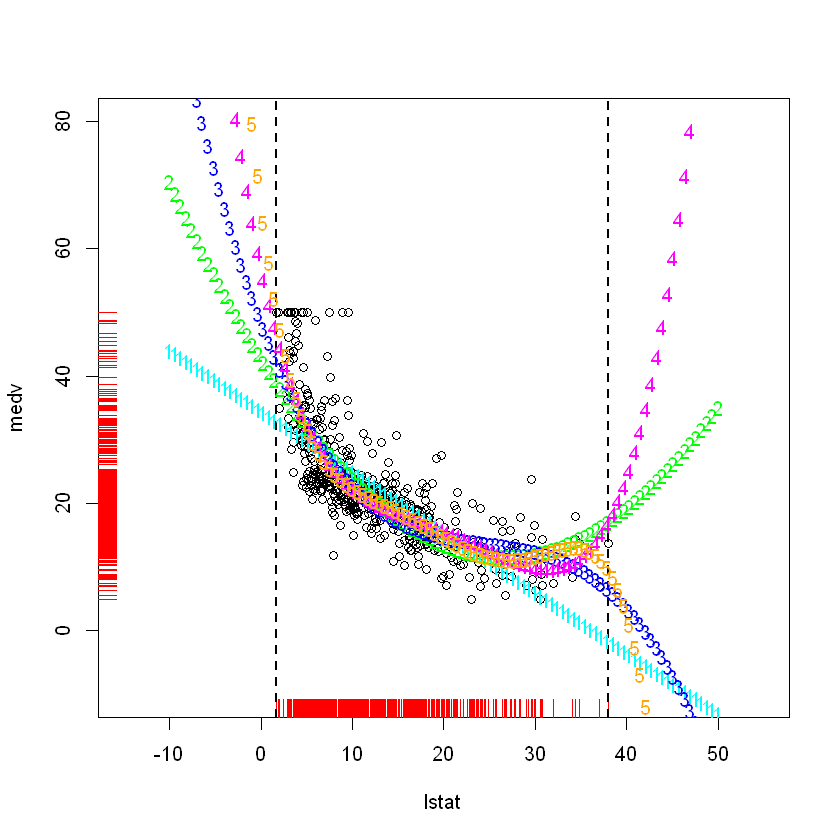

## 12.3 Exploring Free API (Yahoo Query)

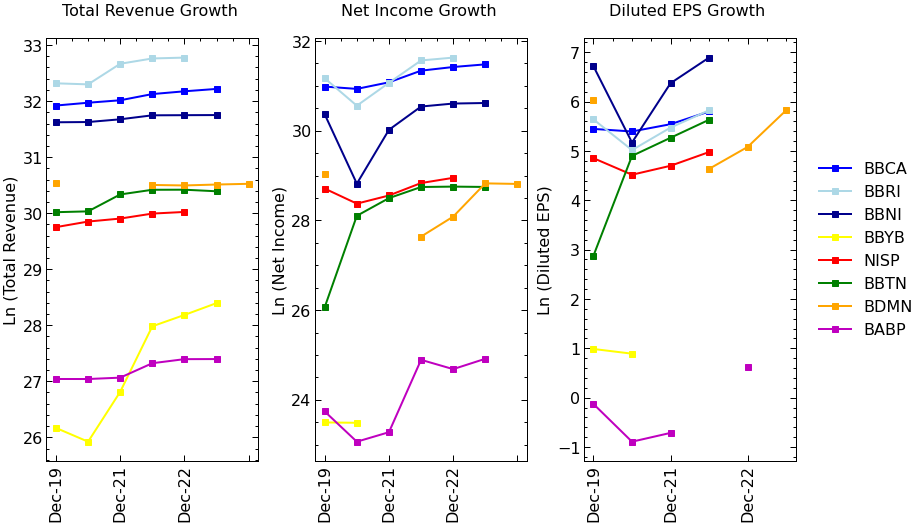

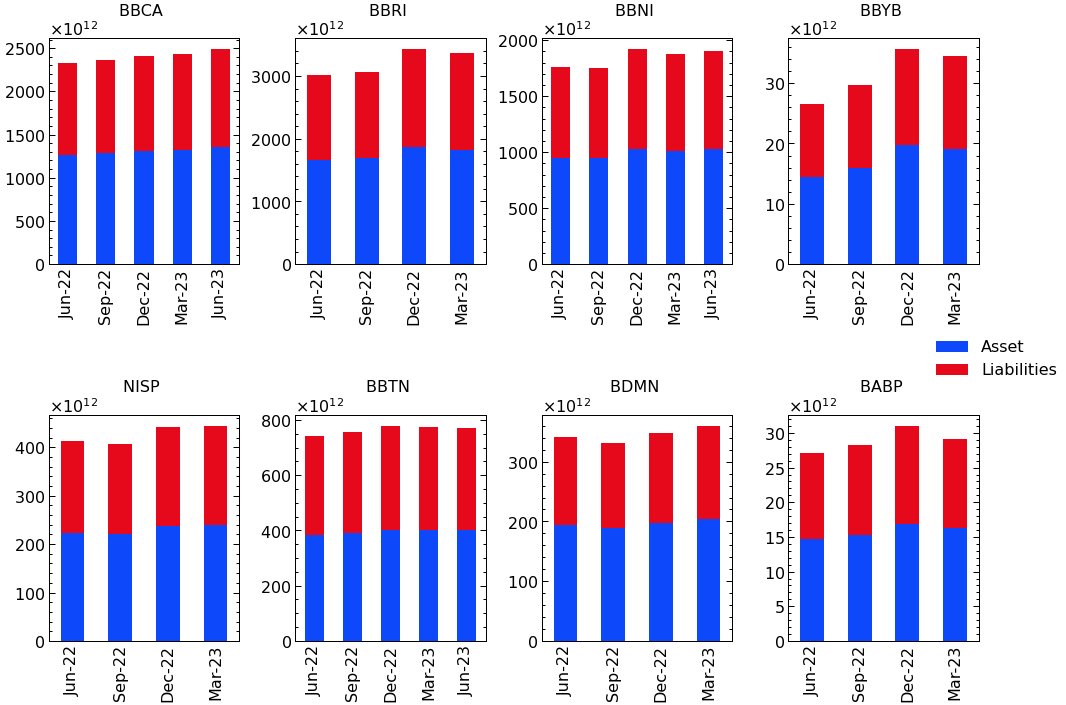